# **Term Deposit Marketing Project**
#### Project Author: Alvin Siphosenkosi Moyo

## 📌 Project Overview & Objective

This project aims to optimize customer targeting for term deposit subscriptions using a two-phase modeling strategy:
- **Pre-Call Phase** – Identify customers unlikely to subscribe before any contact is made.
- **Post-Call Phase** – Predict likelihood of subscription based on call interaction metadata.

---
#### **Background**:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

#### **Data Description**:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

#### **Attributes:**

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

#### **Download Data**:

https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7

#### **Goal(s):**

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

#### **Success Metric(s):**

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

#### **Current Challenges:**

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

## 📚 Table of Contents

- 📌 [Project Overview & Objective](#project-overview--objective)
- 📚 [Table of Contents](#table-of-contents)
- 🧰 [Initial Setup & Dataset Description](#initial-setup--dataset-description)
- 📊 [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- 🛠️ [Feature Engineering & Cleaning](#feature-engineering--cleaning)
- 🧪 [Pre-Call Modeling Workflow](#pre-call-modeling-workflow)
  - 🏁 [Classifier Benchmarking](#pre-call-classifier-benchmarking)
  - 🎯 [Cross-Validation Evaluation](#pre-call-cross-validation-evaluation)
  - 🎯 [Threshold Search & Tuning](#pre-call-threshold-search--tuning)
  - 🎯 [Validation Confusion Matrix Analysis](#pre-call-validation-confusion-matrix-analysis)
  - 🎯 [Test Set Confusion Matrix Analysis](#pre-call-test-set-confusion-matrix-analysis)
  - ⏱️ [Time Efficiency Analysis](#pre-call-time-efficiency-analysis-of-final-model)
  - 🧠 [Traditional Segment Analysis](#pre-call-traditional-segment-analysis)
  - 🔍 [Segment Profiling & Clustering Insights](#pre-call-segment-profiling--clustering-insights-optional)
  - 📝 [Final Round-Up](#pre-call-final-round-up)
- 📞 [Post-Call Modeling Workflow](#post-call-modeling-workflow)
  - 🛠️ [Feature Set Definition & Preprocessing](#post-call-feature-set-definition--preprocessing)
  - 🏁 [Initial Model Benchmarking](#post-call-initial-model-benchmarking)
  - 🔧 [Hyperparameter Tuning](#post-call-hyperparameter-tuning-of-selected-models)
  - 🎯 [Threshold Search & Tuning](#post-call-threshold-search--tuning)
  - 🎯 [Test Set Evaluation & Confusion Matrix](#post-call-test-set-evaluation--confusion-matrix)
  - ⏱️ [Time Efficiency Analysis](#post-call-time-efficiency-analysis)
  - 🔥 [Feature Importance Analysis](#post-call-feature-importance-analysis)
  - 📋 [Post-Call Clustering & Segment Summary](#post-call-clustering--segment-summary)
- 🚀 [DuckDB Optimization (Bonus)](#duckdb-optimization-bonus)
- 📋 [Cluster Visualization Findings (PCA, t-SNE, UMAP)](#cluster-visualization-findings-pca-t-sne-umap)
- 📌 [Post-Call Phase Summary](#post-call-phase-summary)
- 💼 [Final Project Conclusion & Business Recommendations](#final-project-conclusion--business-recommendations)

---

## 🧰 Initial Setup & Dataset Description

- Load the dataset and establish a reproducible random seed (`1208`).
- Perform basic inspection of structure and schema.
- Prepare environment by installing required libraries.

In [1]:
# Installing libraries with specified versions
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 imbalanced-learn==0.10.1 statsmodels==0.14.1 eli5 duckdb umap-learn -q --user

In [2]:
#        --- Libraries to be used throughout ---

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
import duckdb
import umap

# To tune models, get different metric scores and displays
from sklearn.metrics import (
    make_scorer,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_fscore_support,
    average_precision_score
)
from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    auc,
    classification_report,
    ConfusionMatrixDisplay
)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# To get different performance metrics
from sklearn.inspection import permutation_importance

# To be used for data scaling and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import (
    Pipeline,
    Pipeline as ImbPipeline
)
# To transform columns
from sklearn.compose import ColumnTransformer

# To impute missing values
from sklearn.impute import SimpleImputer, KNNImputer

# To sample data
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN

# To split data, model selection and tuning
from sklearn.model_selection import (
     RandomizedSearchCV,
     train_test_split,
     StratifiedKFold,
     cross_val_score,
     cross_validate,
     GridSearchCV
)

# Classifiers to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

# to get random seed
import random

# to save models
import joblib
from joblib import dump, load

In [3]:
# Loading the DataSet
term_deposit = pd.read_csv('term-deposit-marketing-2020.csv')

- `seed = random.randint(1000, 9999)`
- `print(seed)`
  - `Output=1208`

In [4]:
#    --- Fixing Random Seed ---

# define the seed
seed = 1208
random.seed(seed) #set seed for random module
np.random.seed(seed) # set seed for NumPy

print(f'Random Seed: {seed}')

Random Seed: 1208


In [5]:
# Copying data to another varaible to avoid changes to original data
data = term_deposit.copy()

In [6]:
# checking shape of the data
def get_num_rows(data): return data.shape[0]
def get_num_cols(data): return data.shape[1]
print(f'There are {get_num_rows(data)} rows and {get_num_cols(data)} columns in the dataset.')

There are 40000 rows and 14 columns in the dataset.


---
## 📊 Exploratory Data Analysis (EDA)

- Preview dataset structure and first records.
- Understand basic attribute types, and initial patterns.
- Understand customer demographics, product preferences, and campaign behavior.
- Detect class imbalance and identify early signal patterns.

In [7]:
# View the first five rows of the data
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no

At 1st glance, the data loaded correctly. It shows different attributes of data collected in a marketing campaign to a customers for them to subscribe to term deposit banking products.

In [8]:
# Viewing a random sample of the dataset
data.sample(n=7, random_state=seed)

age         job  marital  education default  balance housing loan  \
27372   43  management  married   tertiary      no     2083      no   no   
30133   56  management  married   tertiary      no     -762     yes  yes   
22397   57  technician  married  secondary      no       20      no   no   
27708   42    services   single    unknown      no      410      no   no   
7880    44       admin   single  secondary      no      946     yes   no   
25556   37    services   single  secondary      no       50      no   no   
21974   31  technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign   y  
27372  cellular   21   nov       120         2  no  
30133  cellular    4   feb        19        10  no  
22397  cellular   22   aug       119         2  no  
27708  cellular   21   nov        34         2  no  
7880    unknown   30   may       181         4  no  
25556  cellular   19   nov       244         1  no  
21974  cellular   20   aug       102         2  no

In [9]:
# Checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


- The dependent variable `y` is of object type.
- There is a total of 9 object type columns all categorical, including the predictable variable.
- There are 5 integer type numeric columns.
- All 14 columns in the dataset have a full compliment of 40,000 values.

### 📈 Statistical Analysis

In [10]:
# Statistical Summary of Numerical Data
data.describe().T

count     mean      std       min     25%     50%      75%  \
age      40000.000   40.545    9.642    19.000  33.000  39.000   48.000   
balance  40000.000 1274.278 2903.770 -8019.000  54.000 407.000 1319.000   
day      40000.000   16.017    8.278     1.000   8.000  17.000   21.000   
duration 40000.000  254.824  259.366     0.000 100.000 175.000  313.000   
campaign 40000.000    2.882    3.239     1.000   1.000   2.000    3.000   

                max  
age          95.000  
balance  102127.000  
day          31.000  
duration   4918.000  
campaign     63.000

In [11]:
# Statistical summary of object columns
data.describe(include='object').T

count unique          top   freq
job        40000     12  blue-collar   9383
marital    40000      3      married  24386
education  40000      4    secondary  20993
default    40000      2           no  39191
housing    40000      2          yes  24031
loan       40000      2           no  33070
contact    40000      3     cellular  24914
month      40000     11          may  13532
y          40000      2           no  37104

### 🧾 Descriptive Statistical Summary

A snapshot of key statistics from the dataset:

- **Customer Age Range:** 19 to 95 years.
- **Average Account Balance:** ~€2,904. However, 75% of customers have balances **below this mean**, suggesting the presence of **extreme positive outliers**.
- **Longest Call Duration:** ~82 minutes — a significant outlier among call durations.
- **Most Intensive Campaign:** Up to **63 contacts** were made to a single customer.
- **Dominant Job Category:** **Blue-collar** workers make up the largest job group in the dataset.
- **Binary Variables:** The features `default`, `housing`, `loan`, and `y` all contain **binary values** (`yes` or `no`).
- **Primary Contact Method:** **Cellular phones** are the most common, used to reach **24,914 out of 40,000** customers.
- **Subscription Outcome:** A striking **37,104 out of 40,000** customers said **"no"** to subscribing — emphasizing the dataset’s **imbalance** and the challenge of predicting "yes" responses.

---

In [12]:
# making a list of all catrgorical variables
data.select_dtypes(include='object').columns

# printing number of count of each unique value in each column
for col in data.select_dtypes(include='object').columns:
    print(data[col].value_counts())
    print('~' *45)

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
no     39191
yes      809
Name: default, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
yes    24031
no     15969
Name: housing, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
no     33070
yes     6930
Name: loan, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64
~~~~

In [13]:
#       --- Funtion to create boxplots and histograms on same scale ---
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    '''
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='violet'
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )  # Add median to the histogram

In [14]:
#     --- Function to create labeled barplots ---
def labeled_barplot(data, feature, perc=False, n=None):
    '''
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    '''

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
#      --- Function to plot barplot wrt target ---
def stacked_barplot(data, predictor, target):
    '''
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    '''
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc='lower left', frameon=False,
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


In [16]:
#      --- Function to plot distributions wrt target ---
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target=' + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density',
    )

    axs[0, 1].set_title('Distribution of target for target=' + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density',
    )

    axs[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette='gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='gist_rainbow',
    )

    plt.tight_layout()
    plt.show()

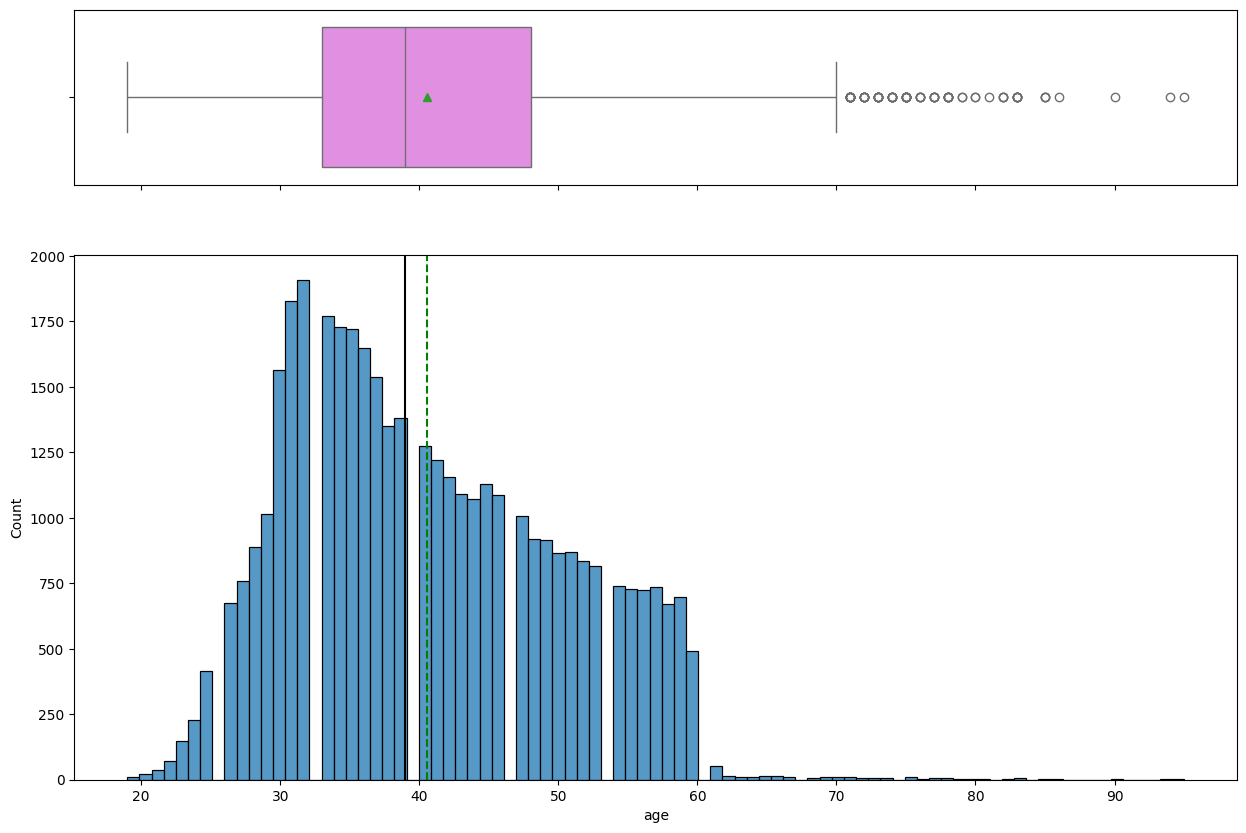

In [17]:
# The distribution of age of customer
histogram_boxplot(data, 'age')

Age of Customer - `age`
- Age is right skewed (unlike the general popultion which is normally distributed), due to the fact that the youngest customer is 19 and the oldest 95. We see a couple of outliers on the upper-end.

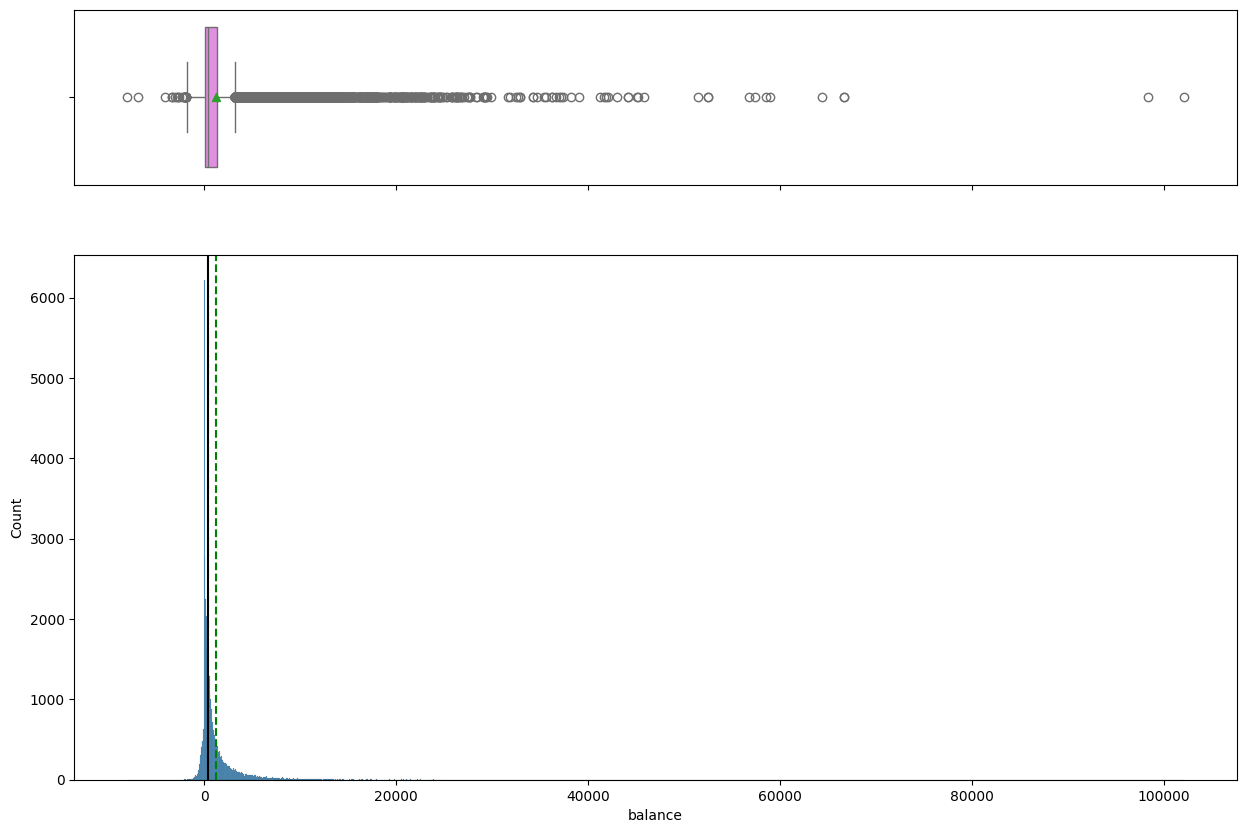

In [18]:
# The distribution of average annual balance
histogram_boxplot(data, 'balance')

Average Annual Balance (Euros) - `balance`
- Right skewed with a couple of accounts in negative and outliers on either ends of the spectrum.

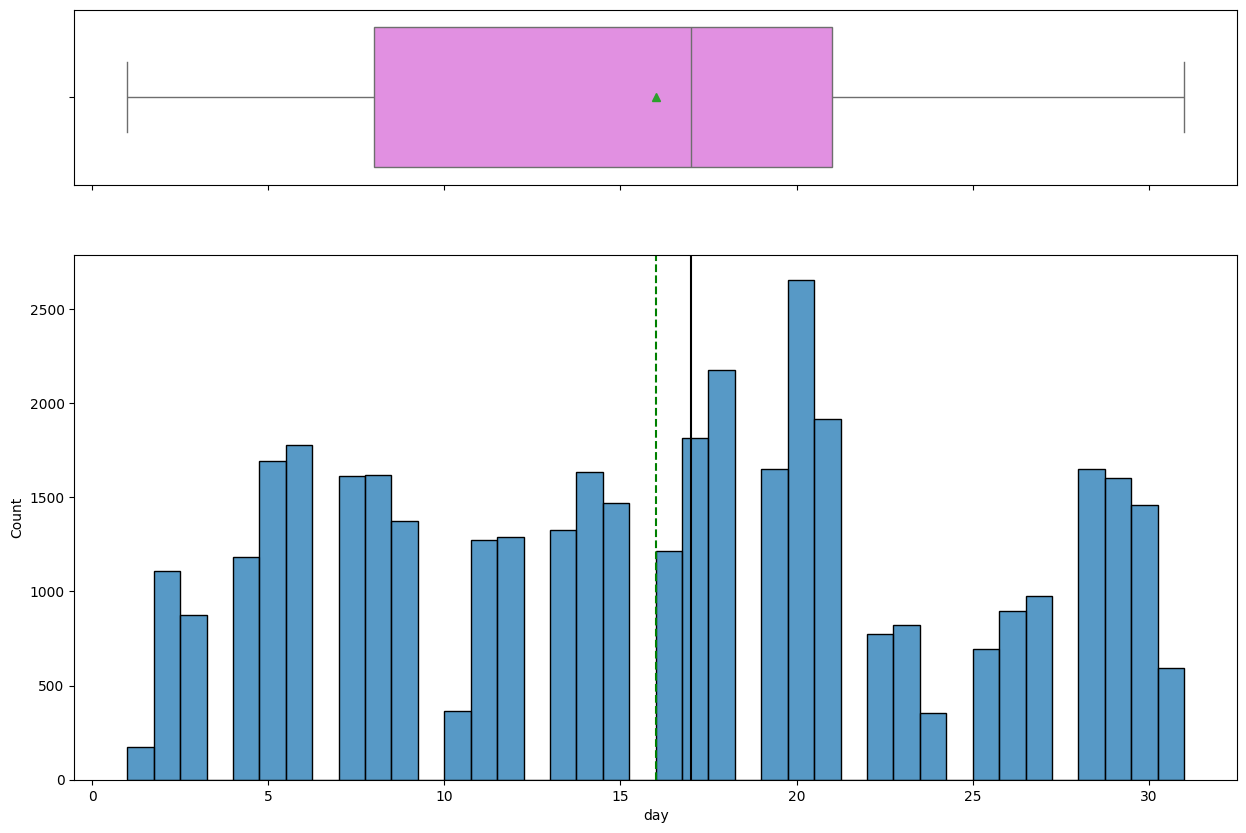

In [19]:
# the distribution of last contact day of month
histogram_boxplot(data, 'day')

Last Contact Day of Month - `day`
- Calls happen throughout the month most calls happen around the 20th, before slumping around the 23rd and going up towards monthend.

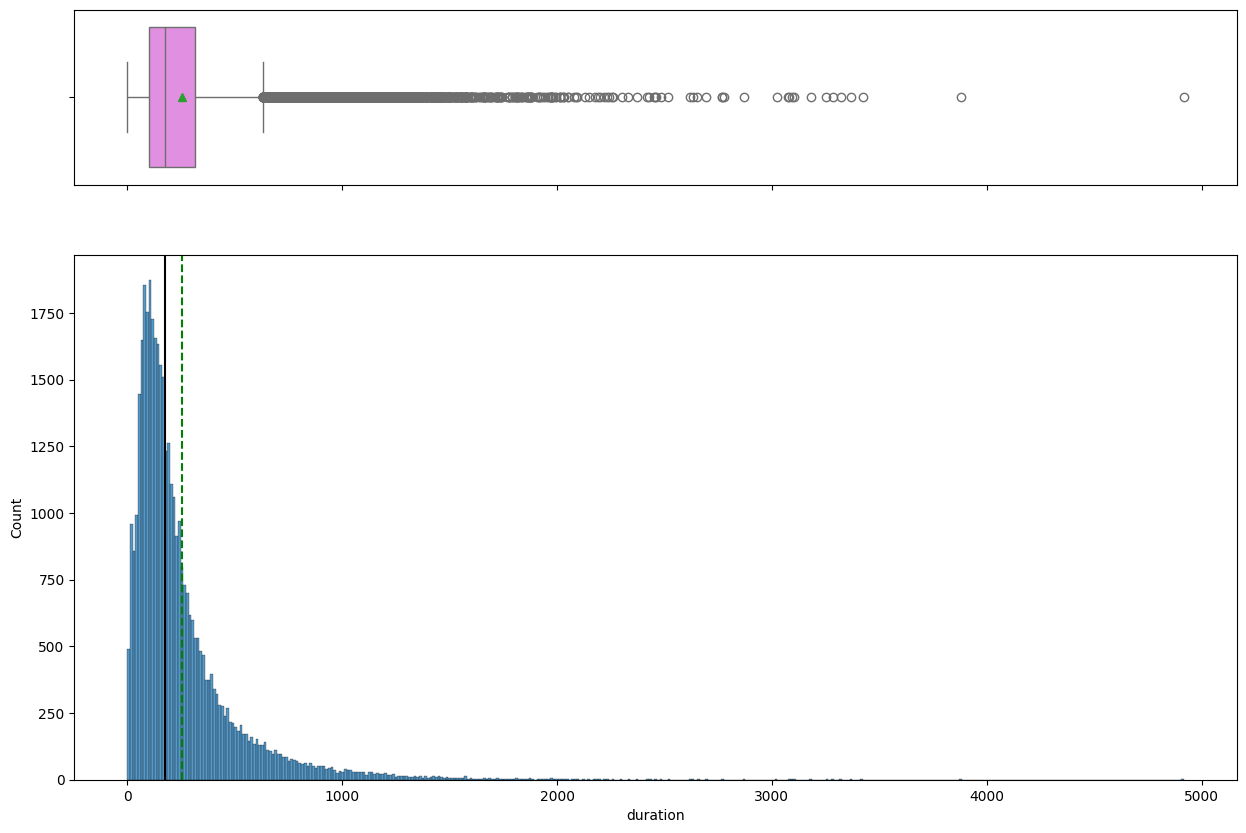

In [20]:
# the distribution of last contact call duration
histogram_boxplot(data, 'duration')

Last Contact Duration (Sec) - `duration`
- The average call lasts 255 seconds (just above 4 minutes), but calls can last up to 82 minutes so there are many outliers on the upper tail.

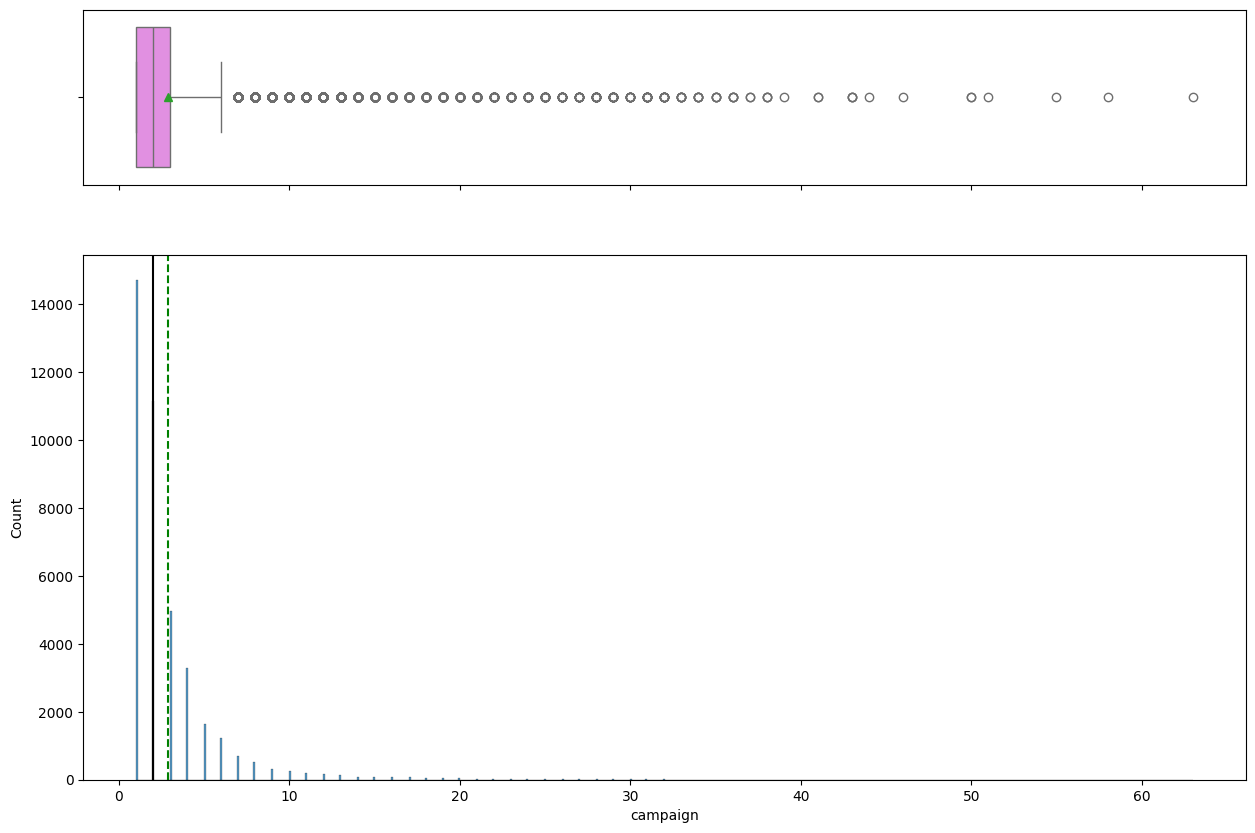

In [21]:
# the distribution of number of contacts in this campaign
histogram_boxplot(data, 'campaign')

Frequency of Contacts made in Current Campaign - `campaign`
- The distribution is right skewed with almost 3 contacts being made on average there were a couple of longer contacts made in this campain with 63 being the a glaring outlier.

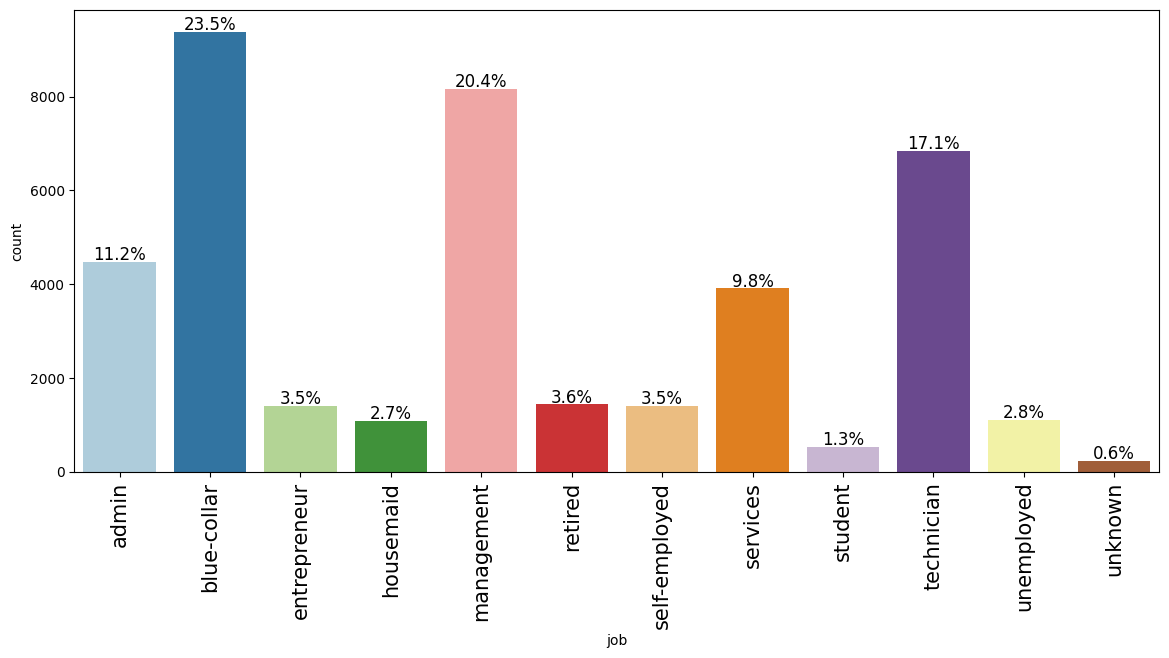

In [22]:
# the distribution of type of job
labeled_barplot(data, 'job', perc=True )

Type of Job - `job`
- Most clients have blue-coller workers with 23.5%, then mananagemnt 20.4%, and technicians at 17.1%. Students are the fewest at 1.3% but we have 0.6% is unknown.

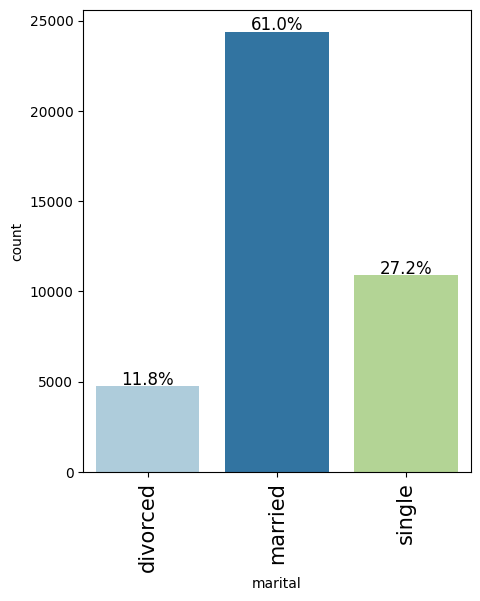

In [23]:
# the distribution of marital status
labeled_barplot(data, 'marital', perc=True)


Marital Status - `marital`
- 61% of the customers are married, followed by single at 27.2% then divorced at 11.8%

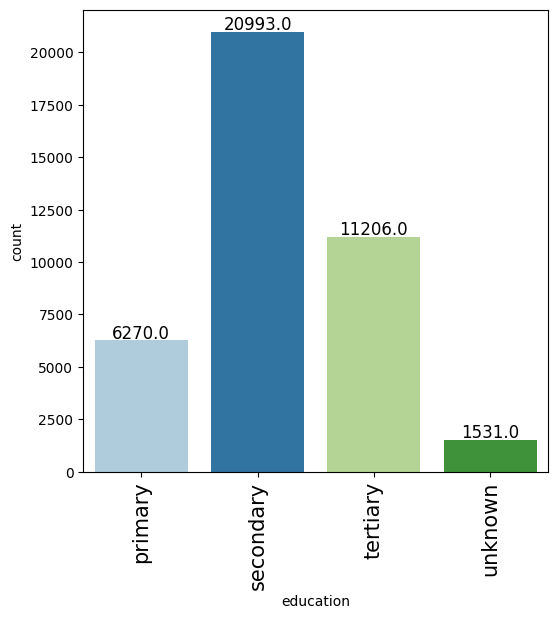

In [24]:
# the distribution of level of education
labeled_barplot(data, 'education')

Level of Education - `education`
- 20,993 customers have secondary education, with 11,206 obtaining tertiary education - 1531 did not disclose their status or it missing.

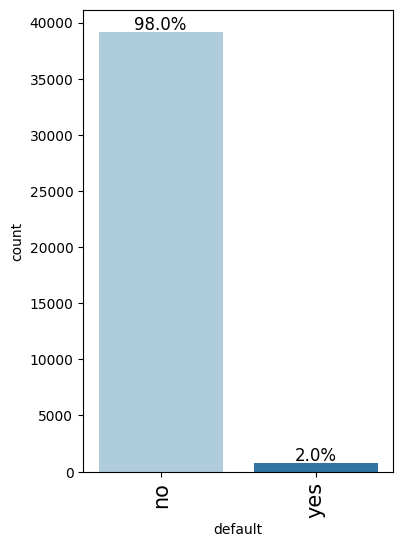

In [25]:
# the distribution of credit default
labeled_barplot(data, 'default', perc=True)

Customer has Credit in Default - `default`
- Only 2% of 40,000 clients have defaulted on their credit.

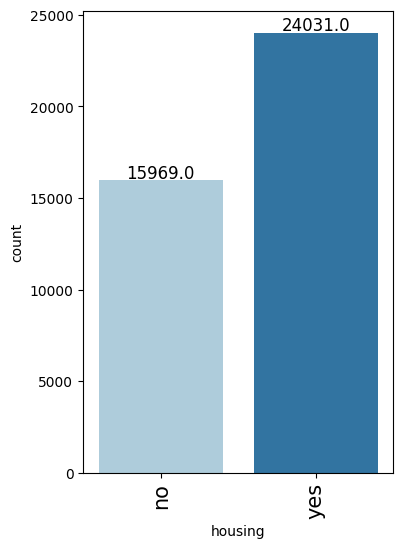

In [26]:
# the distribution of housing loan
labeled_barplot(data, 'housing')

Client has Mortgage or Housing Loan - `housing`
- The margority of the clients have a housing loan.

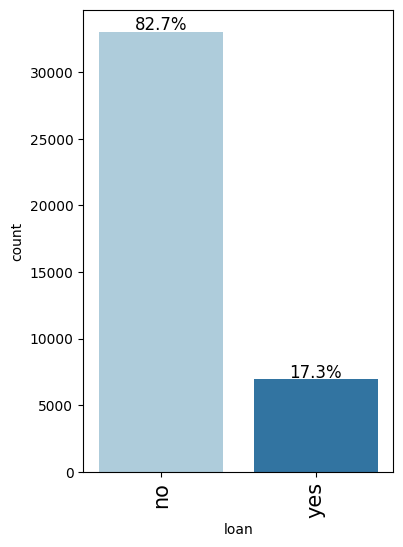

In [27]:
# the distribution of personal loan
labeled_barplot(data, 'loan', perc=True)

Client has Personal Loan - `loan`
- Almost 83% of term deposit customers or potential clients have no personal loan.

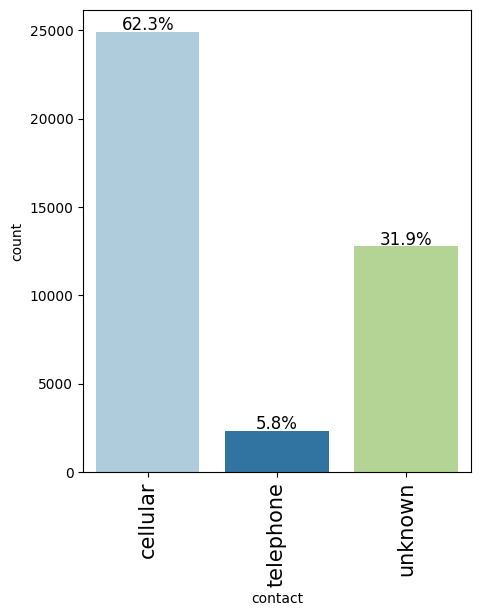

In [28]:
# the distribution of contact communication type
labeled_barplot(data, 'contact', perc=True)

Contact Communication Type - `contact`
- 62.3% of the target market are reachable through cellular, but a staggering 31.9% is unknown which is worrisome.

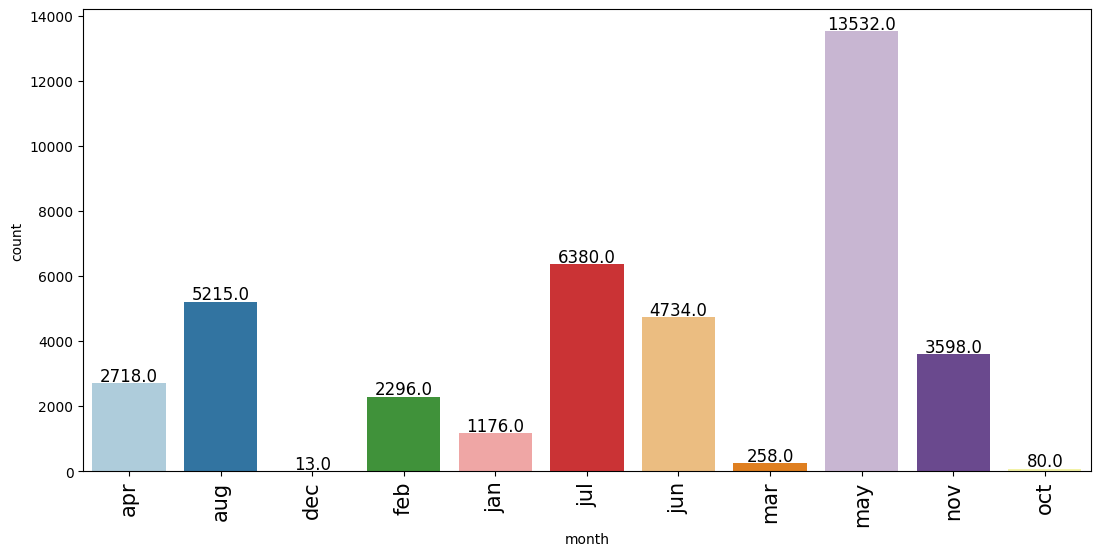

In [29]:
# the distribution of last contact month
labeled_barplot(data, 'month')

Last Contact Month of the Year - `month`
- The least last contacts are made in December and October, while May is by far the busiest month.

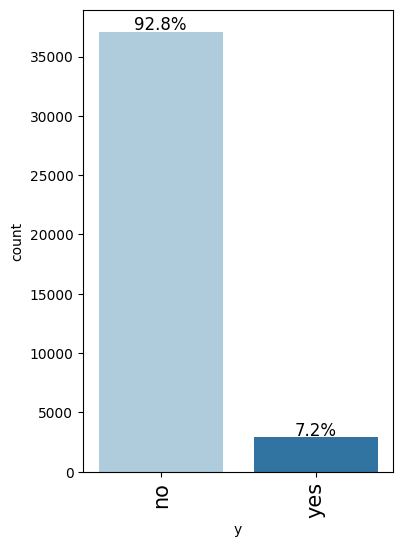

In [30]:
# the distribution of target y- subscribed or not
labeled_barplot(data, 'y', perc=True)

Has Client Subscribed to a Term Depost? - `y`
- Only 7.2% of the target population has subsribed to term deposit. This is our predictable variable where No is 0 and Yes is 1.

Biviriate & Univariate Analysis

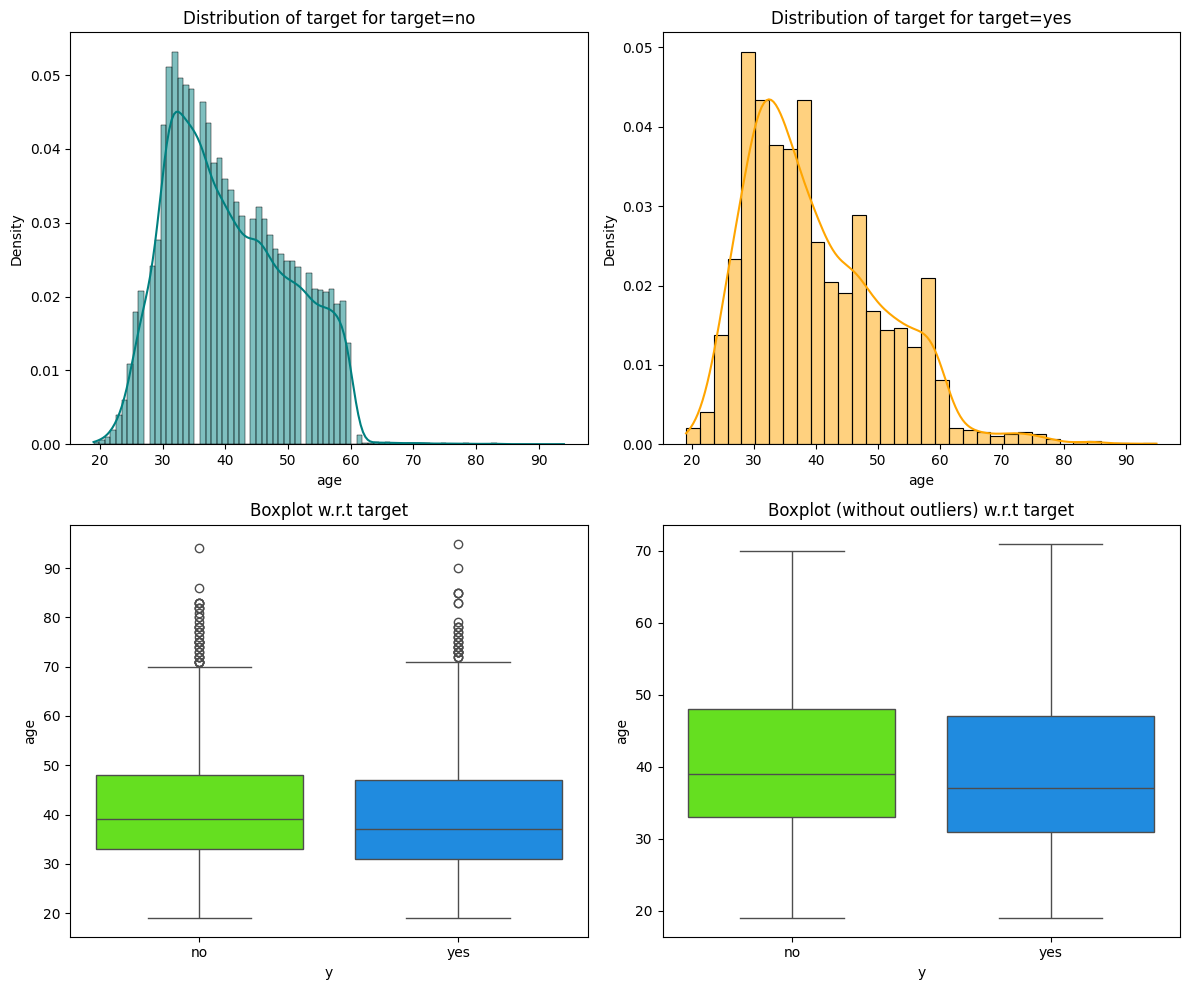

In [31]:
# target variable y vs age of customer
distribution_plot_wrt_target(data, 'age', 'y')

The age distribution for customers who subsricbed to term loans mirrors that of those who has not.

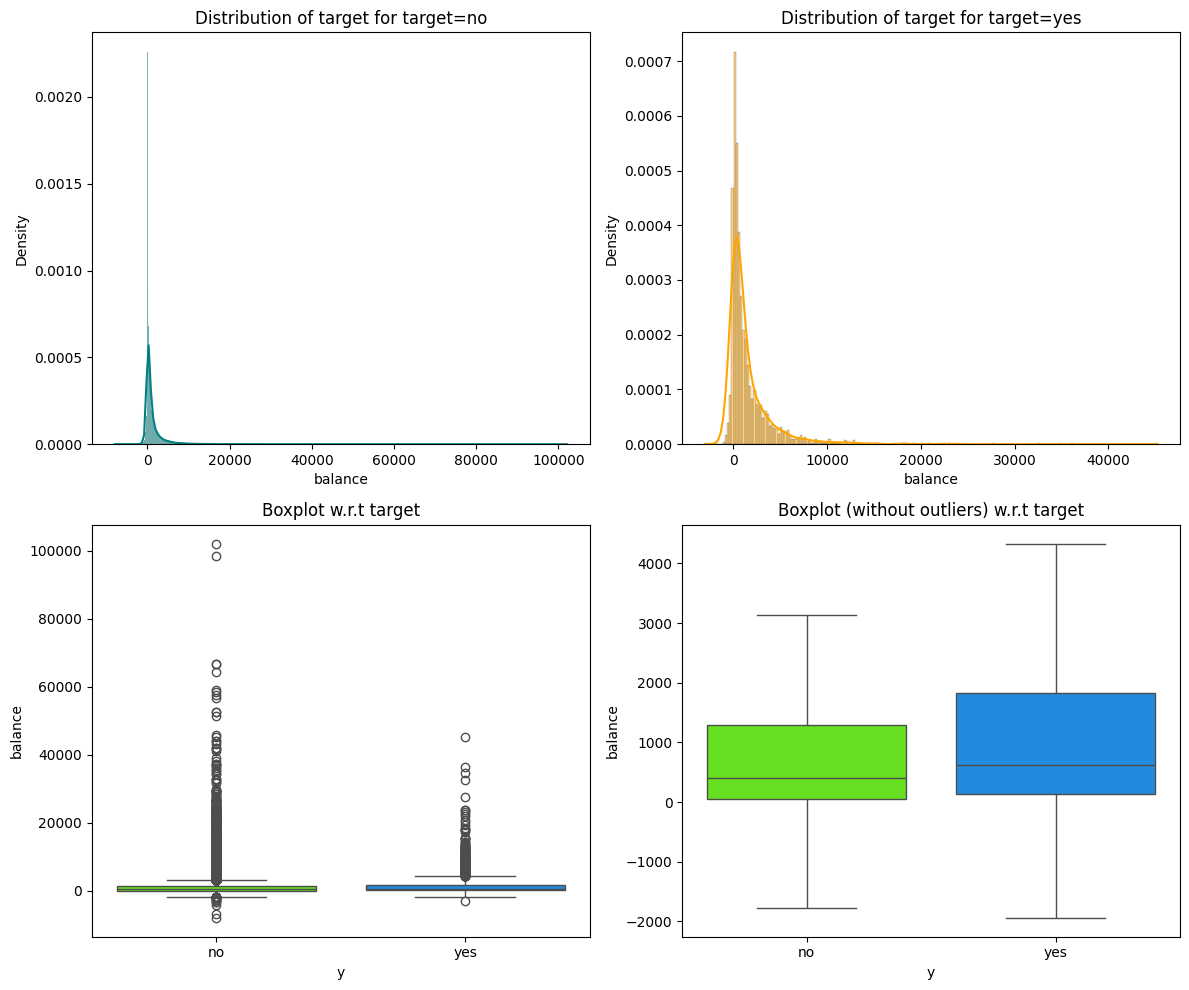

In [32]:
# target variable y vs average annual balance
distribution_plot_wrt_target(data, 'balance', 'y')

We also see the yeses mirroring the nos for balance, even though yeses are a smaller sample.

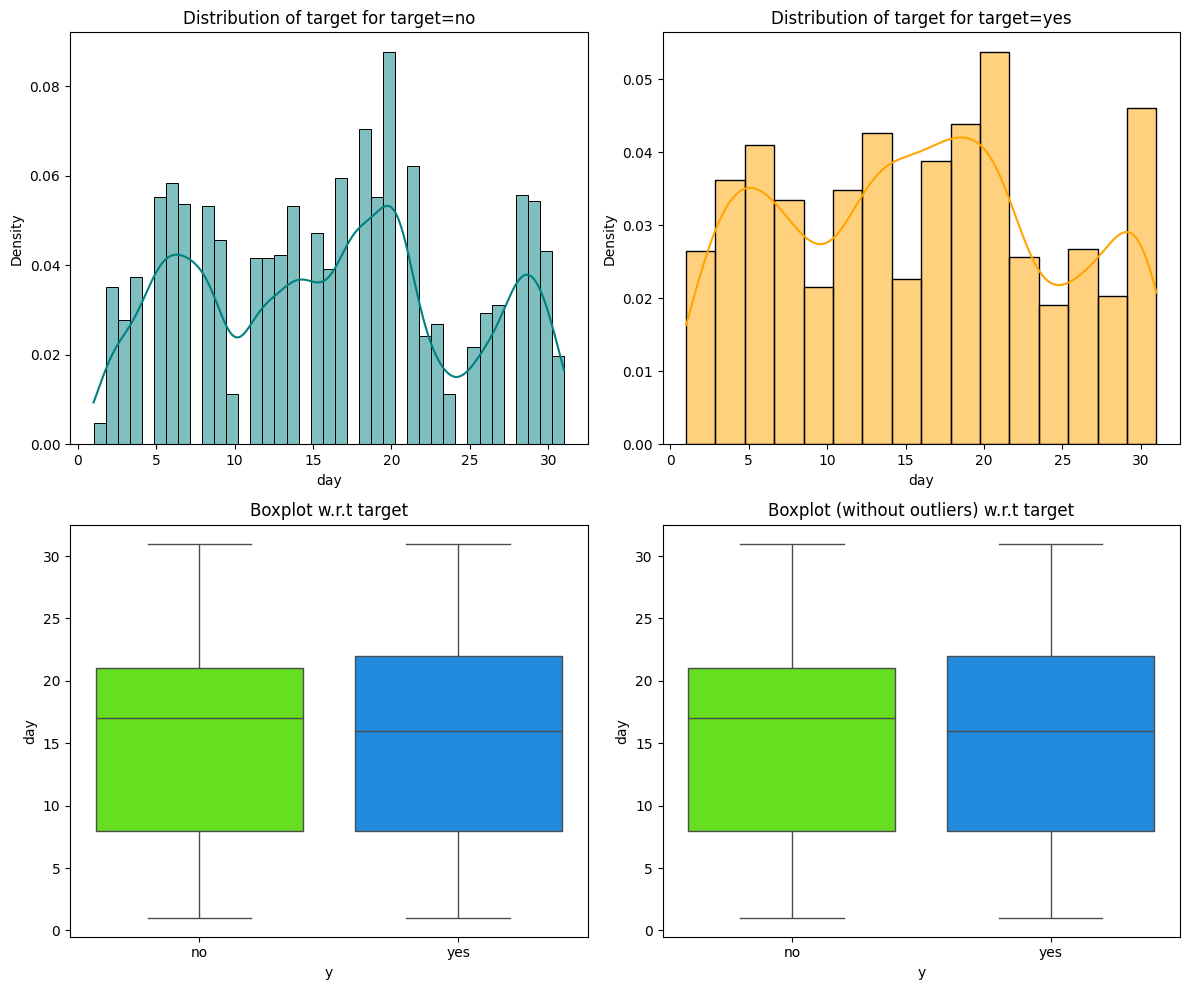

In [33]:
# target variable y vs last contact day
distribution_plot_wrt_target(data, 'day', 'y')

Day shows a multimodal distribution, even when outliers are removed.

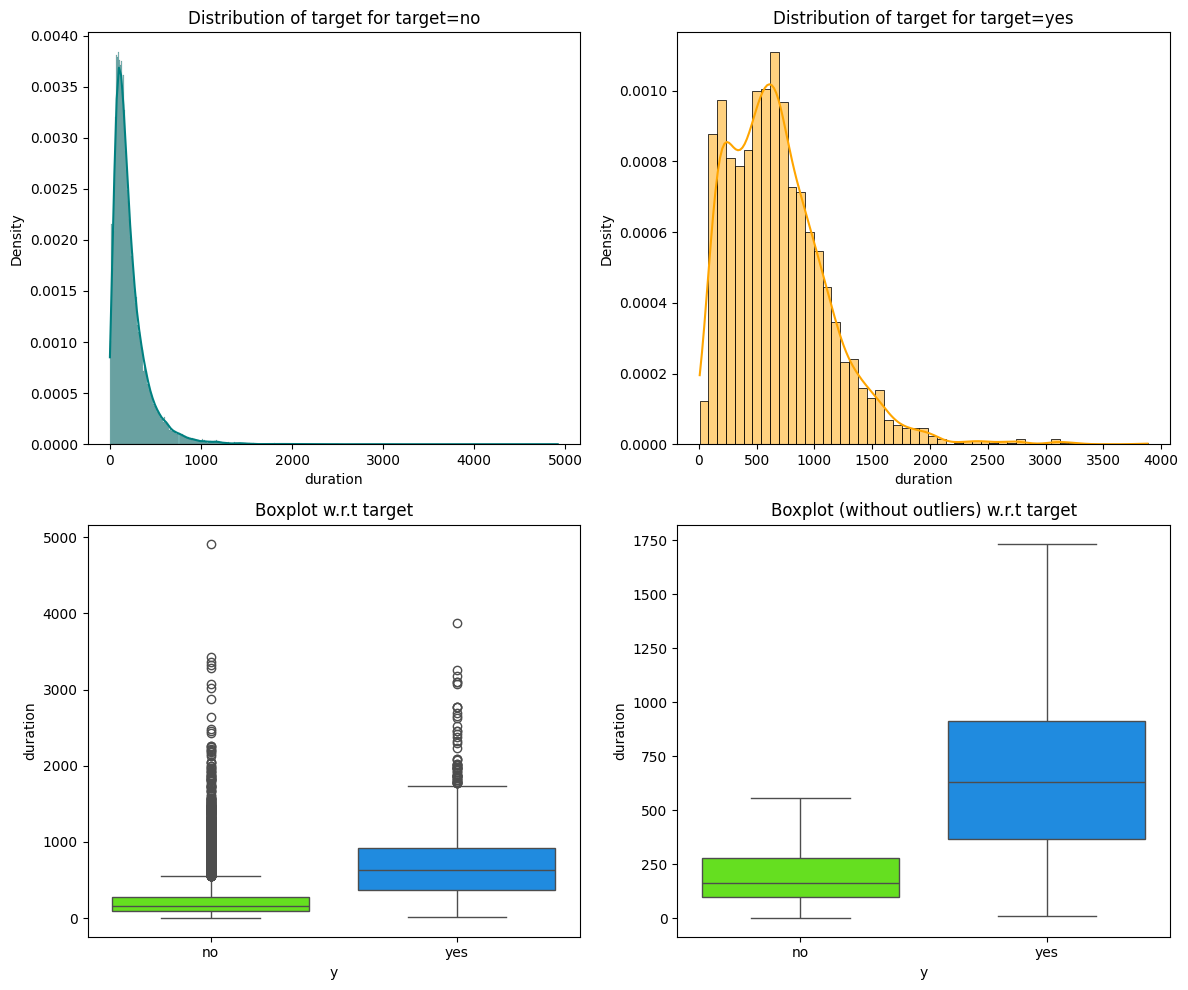

In [34]:
# target variable y vs last call duration
distribution_plot_wrt_target(data, 'duration', 'y')

The removal of outliers show that nos have a much tighter distributionand the calls are much shorter.

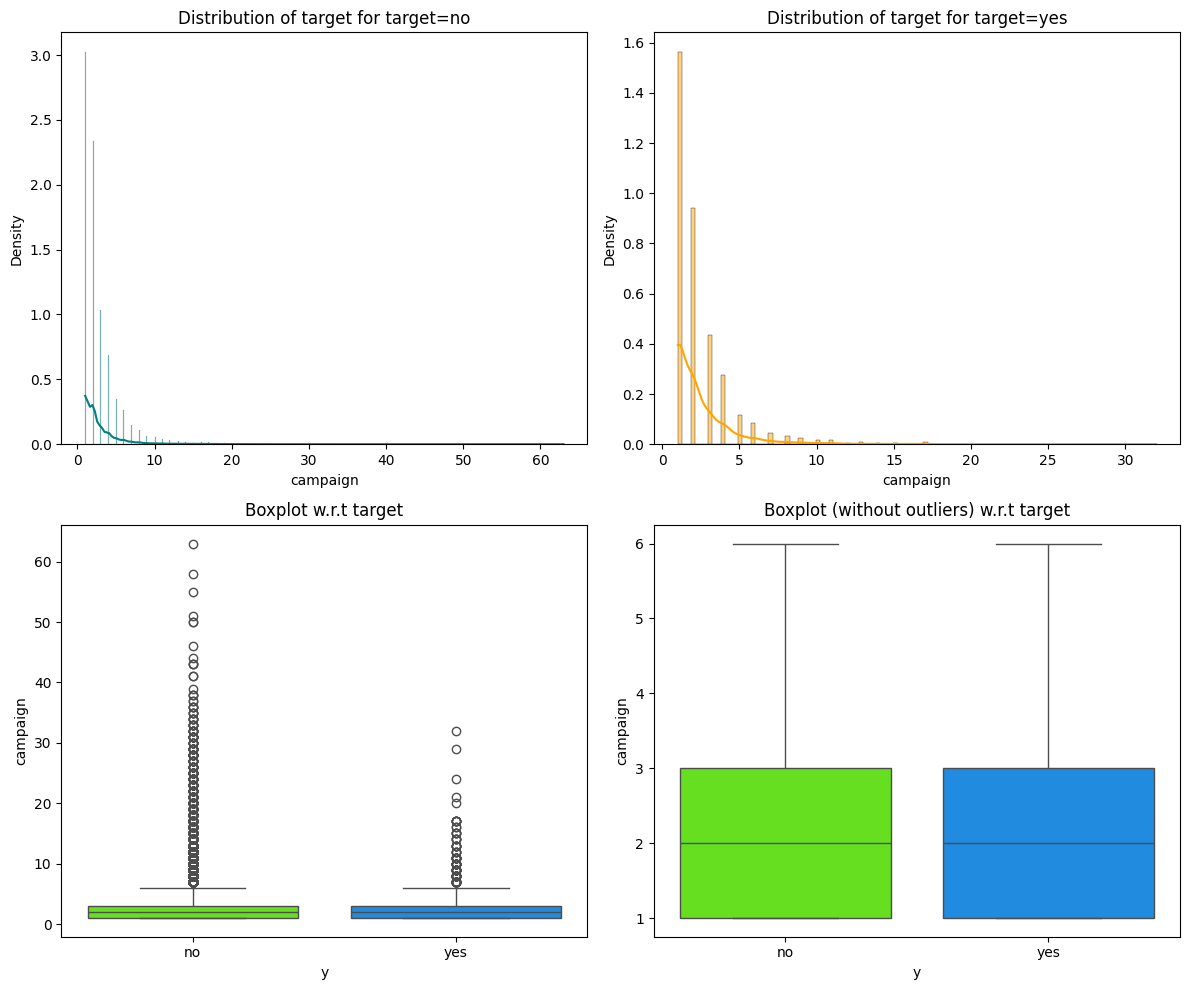

In [35]:
# target variable y vs contacts in campaign
distribution_plot_wrt_target(data, 'campaign', 'y')

The distribution for nos is similar to that of yeses, even without outliers.

y                 no   yes    All
job                              
All            37104  2896  40000
management      7490   676   8166
blue-collar     8848   535   9383
technician      6355   497   6852
admin           4132   351   4483
services        3672   238   3910
retired         1286   151   1437
self-employed   1302   112   1414
unemployed      1008    96   1104
entrepreneur    1317    88   1405
student          442    82    524
housemaid       1034    53   1087
unknown          218    17    235
------------------------------------------------------------------------------------------------------------------------


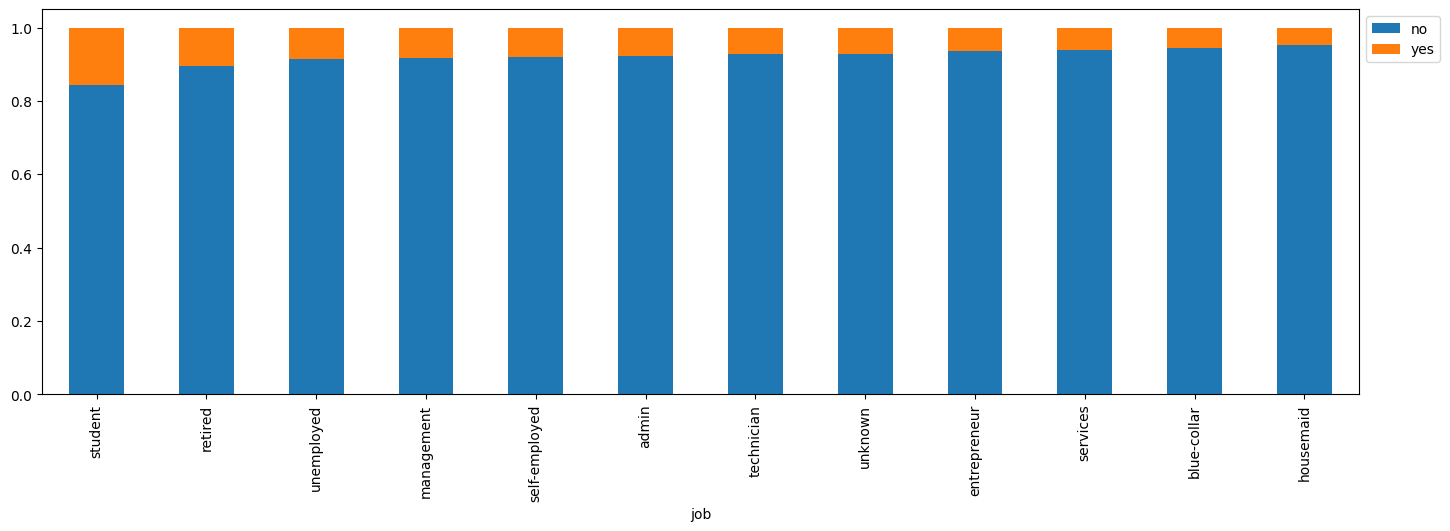

In [36]:
# target variable y vs type of job
stacked_barplot(data, 'job', 'y')

Though being the smallest demographic, students have most yeses relative to their population.

y            no   yes    All
marital                     
All       37104  2896  40000
married   22908  1478  24386
single     9862  1027  10889
divorced   4334   391   4725
------------------------------------------------------------------------------------------------------------------------


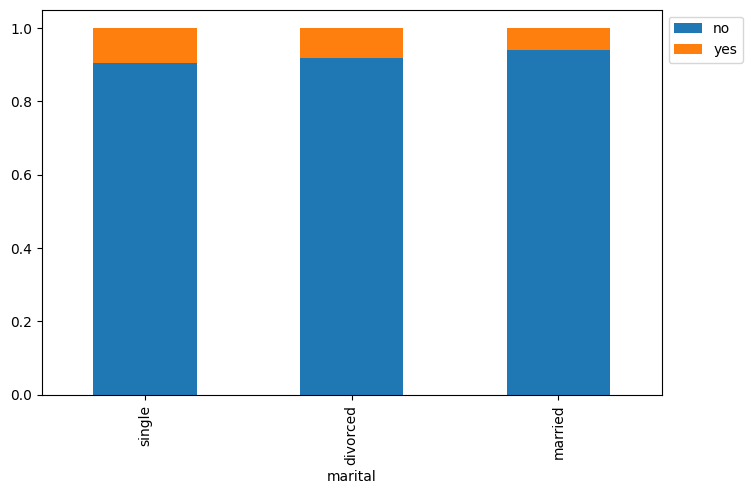

In [37]:
# target variable y vs marital status
stacked_barplot(data, 'marital', 'y')

Proportionally, single people say yes to term deposit products. In actual volumes however 1478 married said yes, vs 1027 single people on a base that favours married 11 to 9.

y             no   yes    All
education                    
All        37104  2896  40000
secondary  19575  1418  20993
tertiary   10177  1029  11206
primary     5917   353   6270
unknown     1435    96   1531
------------------------------------------------------------------------------------------------------------------------


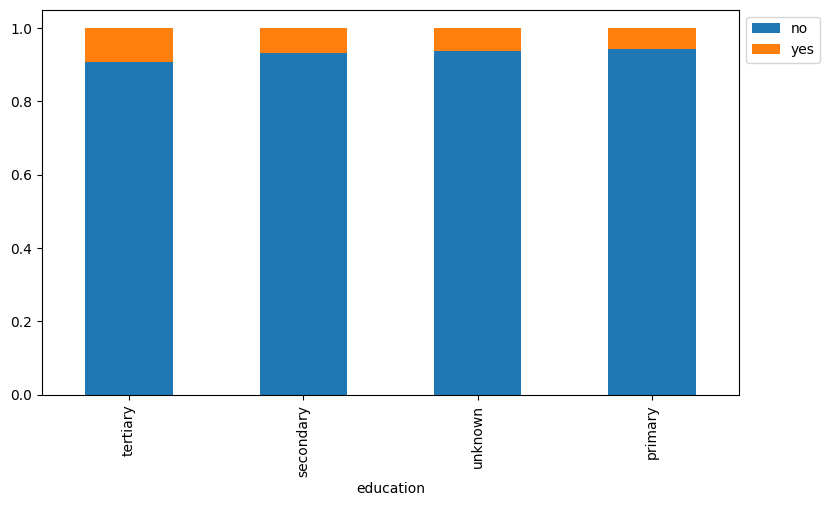

In [38]:
# target variable y vs level of education
stacked_barplot(data, 'education', 'y')

About 9% among people with tertiary education said yes, close to 7% said yes on the secondary category, and a 6% success rate for the primary population.

y           no   yes    All
default                    
All      37104  2896  40000
no       36344  2847  39191
yes        760    49    809
------------------------------------------------------------------------------------------------------------------------


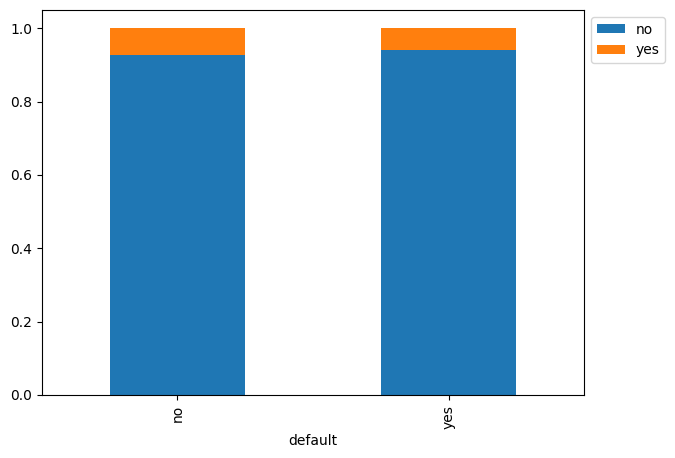

In [39]:
# target variable y vs credit default
stacked_barplot(data, 'default', 'y')

About 93% of non-defaulters have not subscribed, while ~6% of the very small population of defaulters have subscribed.

y           no   yes    All
housing                    
All      37104  2896  40000
yes      22567  1464  24031
no       14537  1432  15969
------------------------------------------------------------------------------------------------------------------------


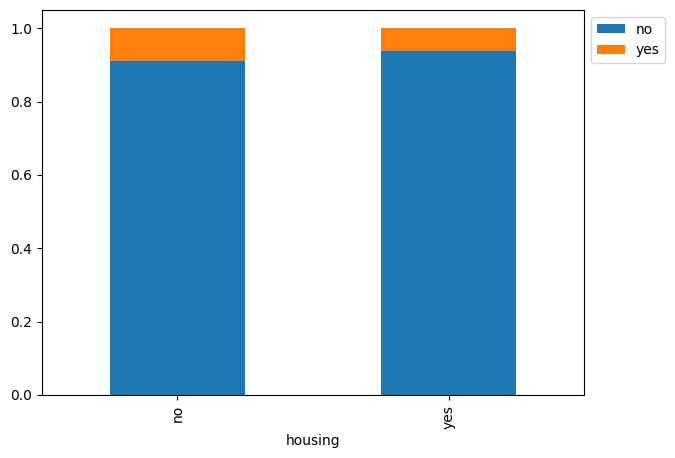

In [40]:
# target variable y vs has housing loan
stacked_barplot(data, 'housing', 'y')

The number of yeses for people with no mortage of 1432 is close to 1464 for those paying mortgages. A closer examination however shows 8.97% of the no mortgage population said yes versus 6.1% among those with mortgages.

y        no   yes    All
loan                    
All   37104  2896  40000
no    30554  2516  33070
yes    6550   380   6930
------------------------------------------------------------------------------------------------------------------------


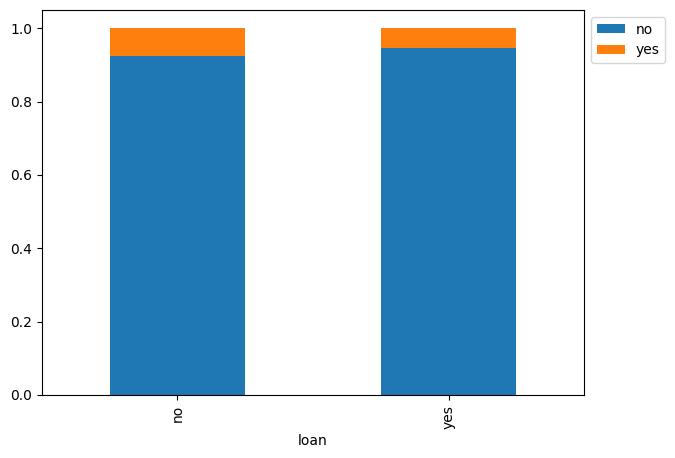

In [41]:
# target variable y vs has personal loan
stacked_barplot(data, 'loan', 'y')

People with personal loans tend to say no at a higher rate compered to people without.

y             no   yes    All
contact                      
All        37104  2896  40000
cellular   22681  2233  24914
unknown    12268   497  12765
telephone   2155   166   2321
------------------------------------------------------------------------------------------------------------------------


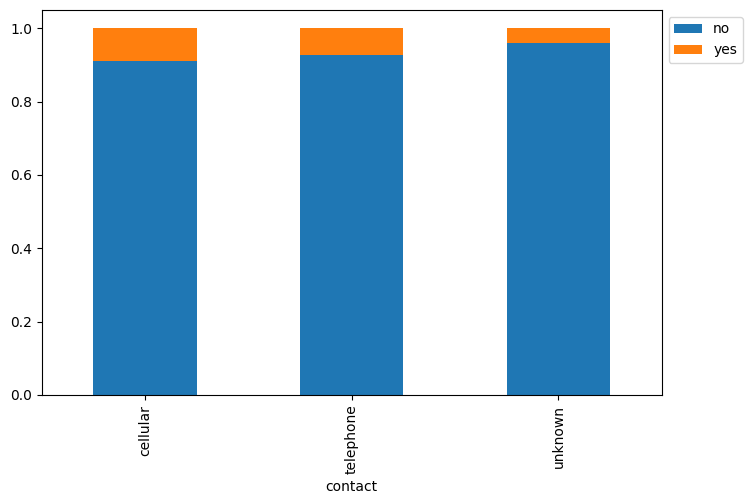

In [42]:
# target variable y vs contact type
stacked_barplot(data, 'contact', 'y')

A larger proportion of contacts with cellular contact said yes than telephone both in actual quantity and in proportion ralative to sample size.

y         no   yes    All
month                    
All    37104  2896  40000
may    12741   791  13532
apr     2267   451   2718
jul     5996   384   6380
jun     4440   294   4734
aug     4927   288   5215
feb     2041   255   2296
nov     3378   220   3598
mar      133   125    258
oct       31    49     80
jan     1138    38   1176
dec       12     1     13
------------------------------------------------------------------------------------------------------------------------


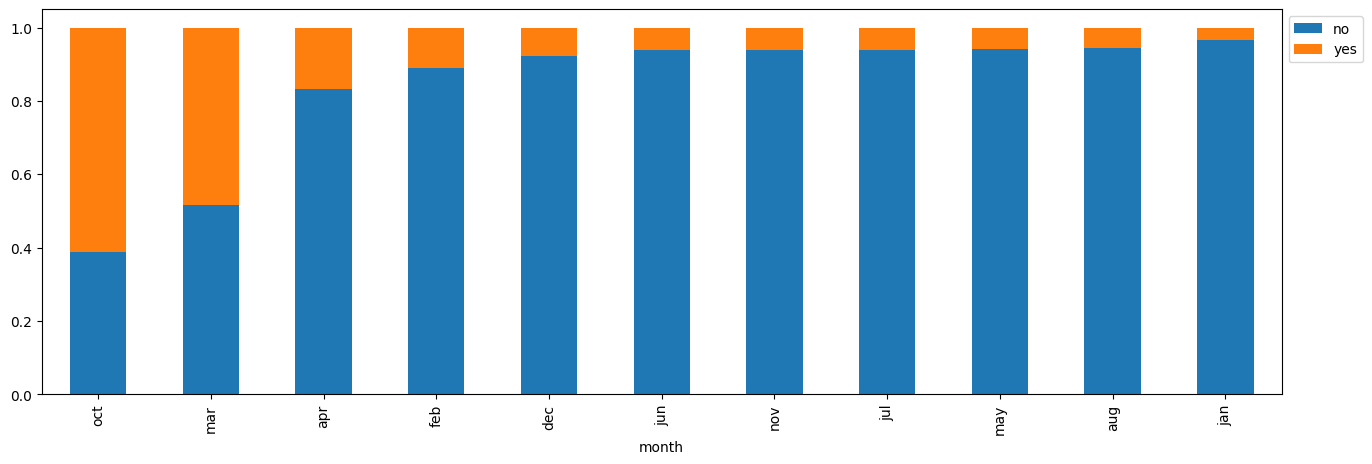

In [43]:
# target variable y vs last contact month
stacked_barplot(data, 'month', 'y')

For calls made in October, 49 of 80 (63%) said yes, in March 125 of 258 (48%) said yes. With 791, May has the most yeses though this makes up about 6% success rate for May calls.

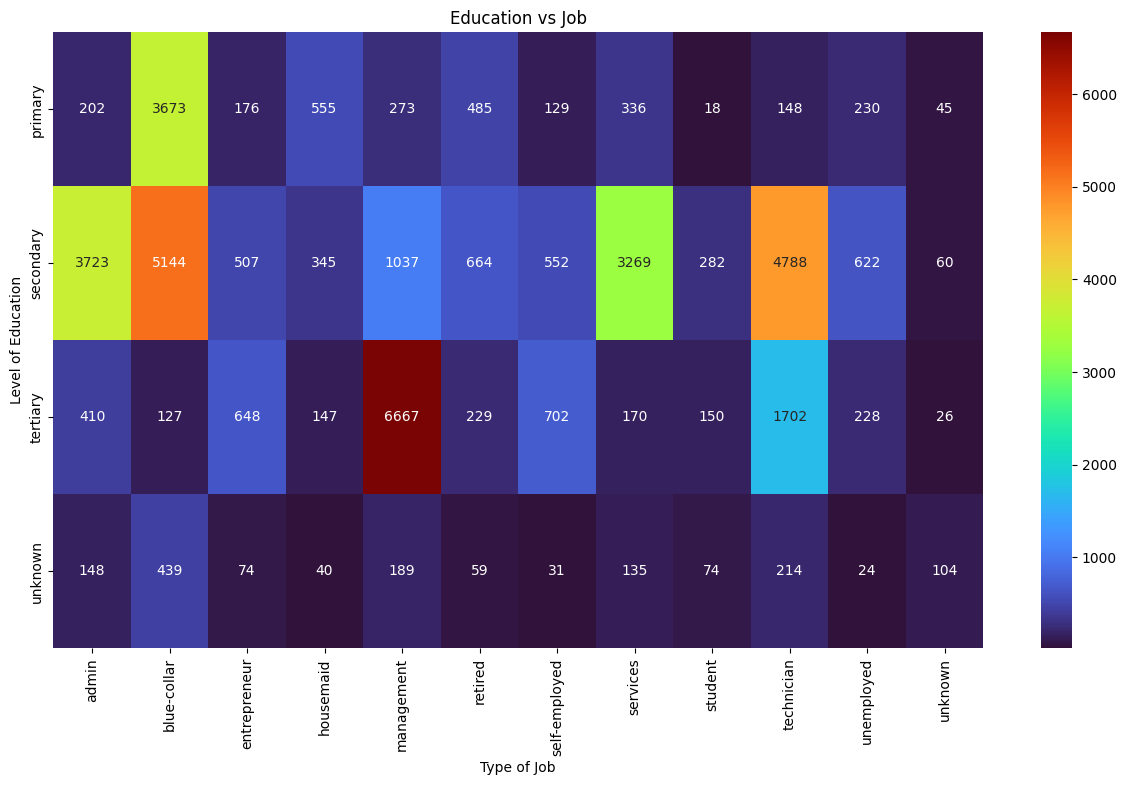

In [44]:
# crosstab table to analyse education level vs job type
plt.figure(figsize=(15, 8))
sns.heatmap(pd.crosstab(data['education'], data['job']), annot=True, fmt='g', cmap='turbo',)
plt.title('Education vs Job')
plt.ylabel('Level of Education')
plt.xlabel('Type of Job')
plt.show()

The management job category is dominated by people with tertiary education (6667) the most visible combination. People with secondary education tend to land jobs in the blue collar sector (5144), then technician (4788), then admin (3723).

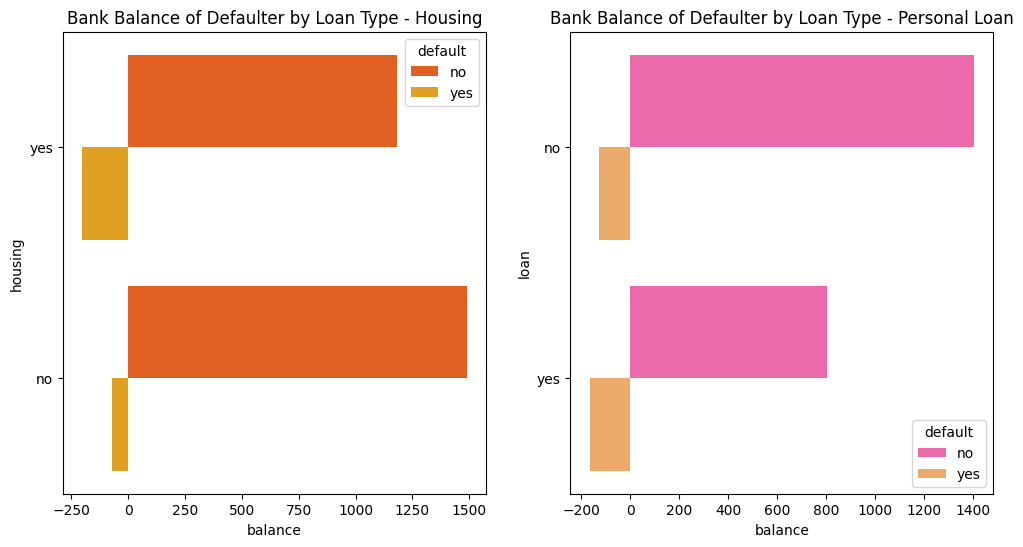

In [45]:
# Compering credit default for House loans to Personal Loans by account balance

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=data, y='housing', x='balance', hue='default', palette= 'autumn', ci=None)
plt.title('Bank Balance of Defaulter by Loan Type - Housing')

plt.subplot(1, 2, 2)
sns.barplot(data=data, y='loan', x='balance', hue='default', palette='spring', ci=None)
plt.title('Bank Balance of Defaulter by Loan Type - Personal Loan')
plt.show()

In all segments, people in the red (negative balances) have also defaulted on their credit. In the housing category, clients with no mortgages to pay have bigger account balances. In the category for personal loans, larger account balances also belong to the group with no loan.

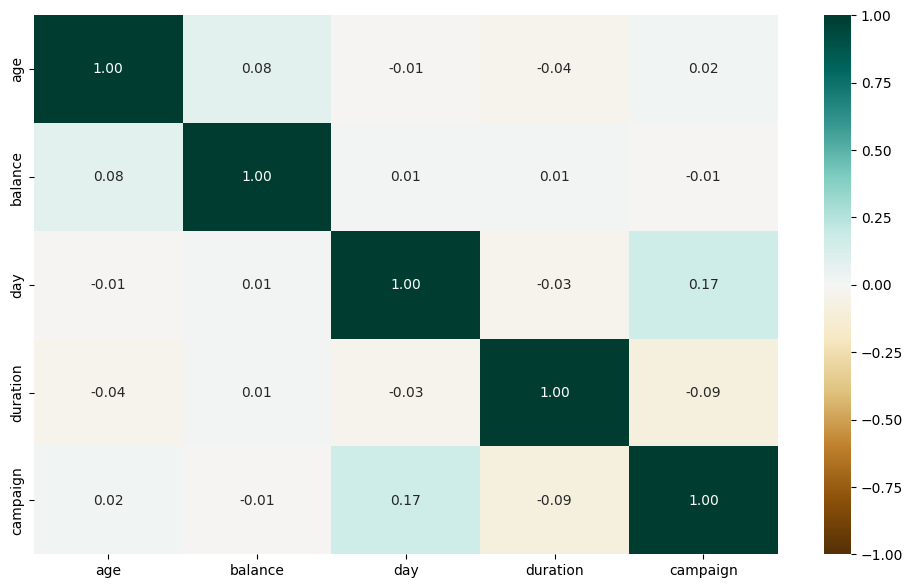

In [46]:
# heatmap showing correlation between numerical variables
plt.figure(figsize=(12,7))
sns.heatmap(data[['age', 'balance', 'day', 'duration', 'campaign']].corr(), annot= True, vmin= -1, vmax= 1,fmt='.2f', cmap='BrBG')
plt.show()

There is no strong correlation amoung numerical categories, which is a good thing for model building as the risk of multicollinearity is reduced.

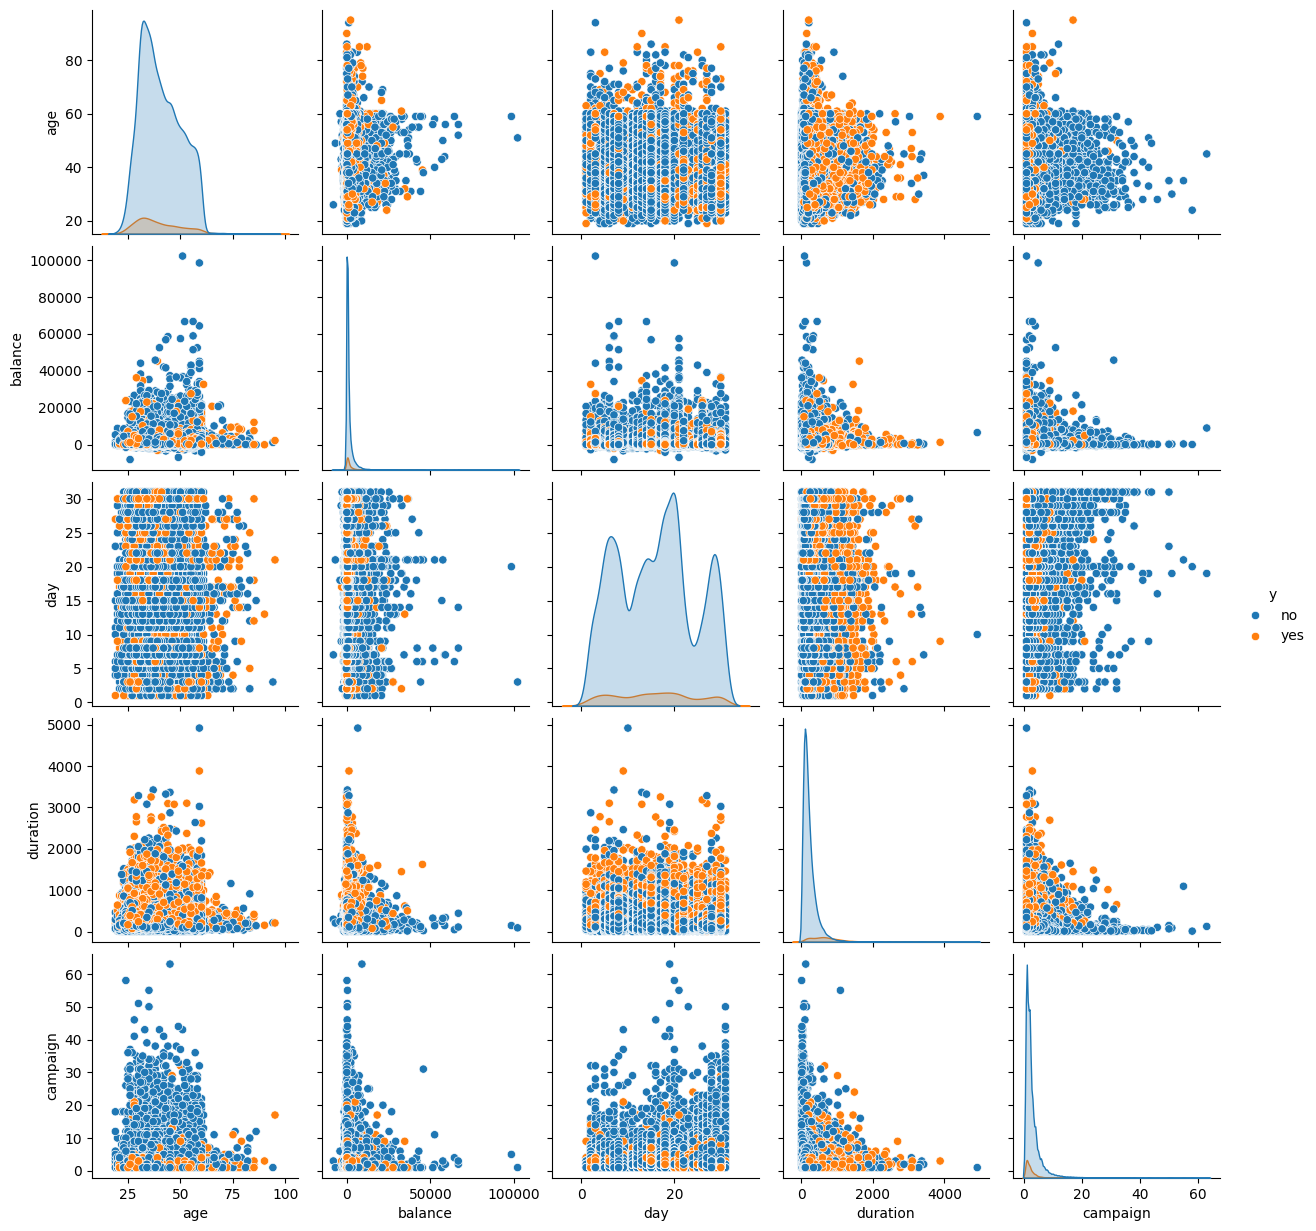

In [47]:
# correlation between target variable and numerical variables
sns.pairplot(data[['age', 'balance', 'day', 'duration', 'campaign', 'y']], hue= 'y')
plt.show()

A few categories like `balance`, `duration` and `campaign` are showing linear relationships. The results show a similar pattern and distribution between `duration` and `campaign`. However, it would appear that duration has more yeses as time increases, while the increase in campaigns does not seem to necessarily increase yeses.

## 🛠️ Feature Engineering & Cleaning

- Create derived features to enhance model learning:
  - `age_group` based on customer age.
  - `call_duration_category` based on call duration length.
  - `contact_frequency` to measure prior customer interaction history.
- Handle missing values, duplicates, outliers, and encode categorical variables.

Transforming our predictable variable to a numeric binary variable

In [48]:
# encode y-"has client subscribed to term deposit" where certifid; yes is 1, no is 0
data['y'] = data['y'].map({'yes': 1, 'no': 0})

Checking for Duplicates, Missing Values & Outliers

In [49]:
# Checking for duplicate values
print(f'There are {data.duplicated().sum()} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


In [50]:
# Checking for missing values in the data
print(f'There are {data.isna().sum().sum()} missing values in the dataset.')

There are 0 missing values in the dataset.


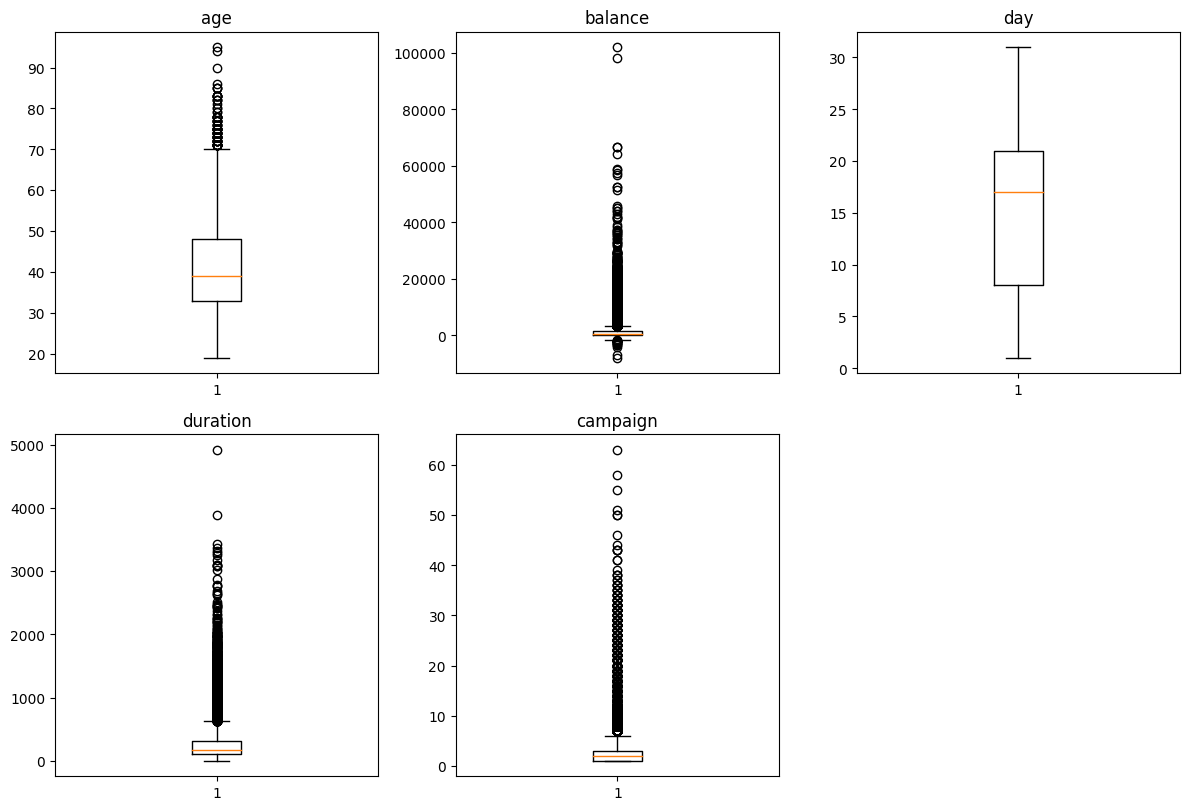

In [51]:
# Outlier detection using boxplot
original_num_cols = ['age', 'balance', 'day', 'duration', 'campaign']

plt.figure(figsize=(12, 12))

for i, variable in enumerate(original_num_cols):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- There are multiple outliers in the data.
- Outliers caused by extreem values randomly appearing in the data can throw models off-balance, whether they are there as real values or due to errors in data collection and collation.
- We will treat for some outliers.


In [52]:
#    --- Treating Outliers ---

# Cap duration at 25 mins
data['duration'] = data['duration'].clip(upper=1500)

# Cap age between 18 and 75
data['age'] = data['age'].clip(lower=18, upper=75)

# Cap campaign at 15
data['campaign'] = data['campaign'].clip(upper=15)

# Winsorize balance ~  -3000 and 40000 range
lower, upper = np.percentile(data['balance'], [1, 99])
data['balance'] = data['balance'].clip(lower, upper)

 **Feature Engineering**
- Adding some extra columns with new categories can help unlock value and enrich our current data for effective outputs.

In [53]:
#      --- Creating new columns ---

# Put 'age' into age group bins (18-30, 31-40, ..., 60+)
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, float('inf')], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Create 'financial_burden' flag (1 if any of default/housing/loan is 'yes')
data['financial_burden'] = ((data['default'] == 'yes') | (data['housing'] == 'yes') | (data['loan'] == 'yes')).astype(int)

# Categorize 'balance' into negative/low/high positive
data['balance_category'] = pd.cut(data['balance'],bins=[-float('inf'), 0, 1000, float('inf')],labels=['negative', 'low_positive', 'high_positive'])

# Bin 'duration' into call duration categories (short/medium/long)
data['call_duration_category'] = pd.cut(data['duration'],bins=[0, 60, 180, float('inf')],labels=['short', 'medium', 'long'],include_lowest=True)

# Combine 'housing' and 'loan' into 'total_loans' (0/1/2)
data['total_loans'] = data['housing'].map({'yes': 1, 'no': 0}) + data['loan'].map({'yes': 1, 'no': 0})

# Create 'age_financial_burden' interaction (concatenates age_group and financial_burden)
data['age_financial_burden'] = (data['age_group'].astype(str) + '_' +
                                data['financial_burden'].map({0: 'no_burden', 1: 'has_burden'})).astype('category')

# Create 'contact_frequency' flag (1 if contacted multiple times, 0 if once)
data['contact_frequency'] = (data.get('campaign', 1) > 1).astype(int)

### 📊**EDA**
After some changes, it is only appropriate that we do some EDA again.

In [54]:
# Analysing new columns
new_columns = ['age_group', 'financial_burden', 'balance_category', 'call_duration_category',
               'total_loans', 'age_financial_burden', 'contact_frequency' ]
for col in new_columns:
    print(data[col].value_counts())
    print('~' * 45)

31-40    16146
41-50    10463
51-60     7318
18-30     5839
60+        234
Name: age_group, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1    26975
0    13025
Name: financial_burden, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
low_positive     20847
high_positive    12213
negative          6940
Name: balance_category, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
long      19405
medium    16075
short      4520
Name: call_duration_category, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1    22571
0    13234
2     4195
Name: total_loans, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
31-40_has_burden    11608
41-50_has_burden     6955
31-40_no_burden      4538
18-30_has_burden     4328
51-60_has_burden     4052
41-50_no_burden      3508
51-60_no_burden      3266
18-30_no_burden      1511
60+_no_burden         202
60+_has_burden         32
Name: age_financial_burden, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [55]:
# Display the first few rows of the updated dataset
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no 2143.000     yes   no   
1   44    technician   single  secondary      no   29.000     yes   no   
2   33  entrepreneur  married  secondary      no    2.000     yes  yes   
3   47   blue-collar  married    unknown      no 1506.000     yes   no   
4   33       unknown   single    unknown      no    1.000      no   no   

   contact  day  ... duration  campaign  y  age_group financial_burden  \
0  unknown    5  ...      261         1  0      51-60                1   
1  unknown    5  ...      151         1  0      41-50                1   
2  unknown    5  ...       76         1  0      31-40                1   
3  unknown    5  ...       92         1  0      41-50                1   
4  unknown    5  ...      198         1  0      31-40                0   

   balance_category call_duration_category total_loans  age_financial_burden  \
0     high_positive           

In [56]:
# Show data types after transformations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     40000 non-null  int64   
 1   job                     40000 non-null  object  
 2   marital                 40000 non-null  object  
 3   education               40000 non-null  object  
 4   default                 40000 non-null  object  
 5   balance                 40000 non-null  float64 
 6   housing                 40000 non-null  object  
 7   loan                    40000 non-null  object  
 8   contact                 40000 non-null  object  
 9   day                     40000 non-null  int64   
 10  month                   40000 non-null  object  
 11  duration                40000 non-null  int64   
 12  campaign                40000 non-null  int64   
 13  y                       40000 non-null  int64   
 14  age_group             

In [57]:
# Define categorical & numerical columns

categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing','loan', 'contact','month', 'age_group',
    'balance_category', 'call_duration_category', 'age_financial_burden', 'job_education_level'
]

numerical_cols = [
    'age', 'balance', 'day', 'duration', 'campaign',
    'total_loans', 'financial_burden', 'contact_frequency'
]

y                      0     1    All
contact_frequency                    
All                37104  2896  40000
1                  23650  1632  25282
0                  13454  1264  14718
------------------------------------------------------------------------------------------------------------------------


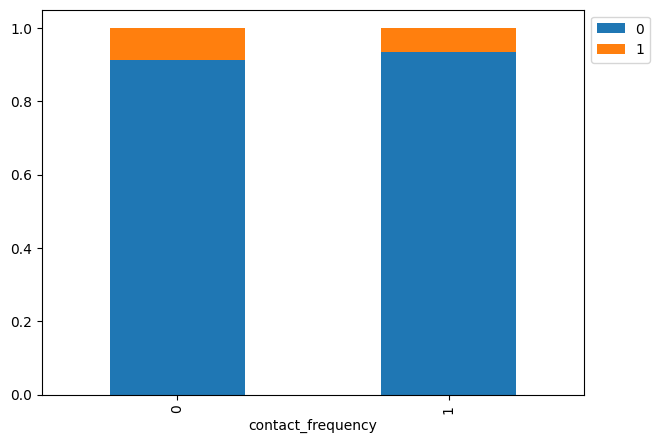

In [58]:
# target variable vs contact frequency
stacked_barplot(data, 'contact_frequency', 'y')

- Customers who have been contacted once (0) have a slightly better chance of subscribing than those contacted more then once (1). ~8% for once vs ~6% for more than once.

y                           0     1    All
call_duration_category                    
All                     37104  2896  40000
long                    16791  2614  19405
medium                  15797   278  16075
short                    4516     4   4520
------------------------------------------------------------------------------------------------------------------------


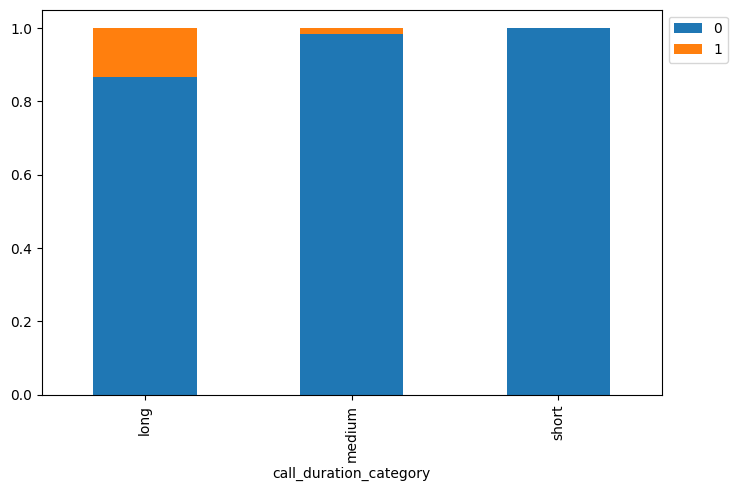

In [59]:
# target variable y vs call duration
stacked_barplot(data, 'call_duration_category', 'y')

- This graphic comfirms the earlier deduction that the longer the call, the higher the chance of yes. But what is the most effective call length?

y              0     1    All
age_group                    
All        37104  2896  40000
31-40      15017  1129  16146
41-50       9829   634  10463
18-30       5240   599   5839
51-60       6875   443   7318
60+          143    91    234
------------------------------------------------------------------------------------------------------------------------


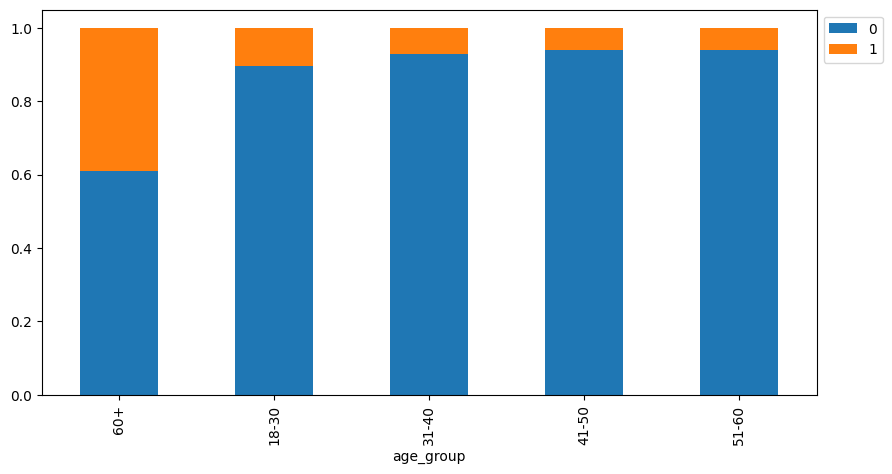

In [60]:
# target variable y vs age group
stacked_barplot(data, 'age_group', 'y')


- Though its has the least people, the 60+ age group is the most willing group with almost 40% 'yes' conversion. The 18-30age group has just above 10% 'yes' rate. The least successful groups for yes are 41-50 and 51-60 groups with 6%.

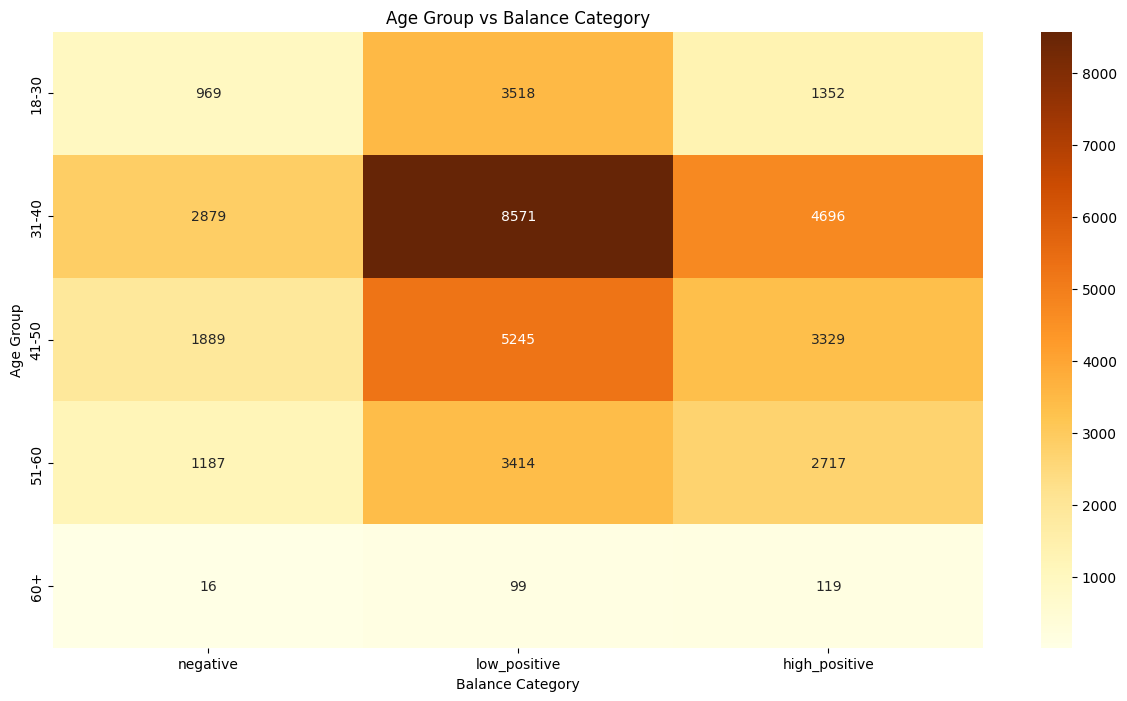

In [61]:
# crosstab table to analyse age group vs balance category
plt.figure(figsize=(15, 8))
sns.heatmap(pd.crosstab(data['age_group'], data['balance_category']), annot=True, fmt='g', cmap='YlOrBr',)
plt.title('Age Group vs Balance Category')
plt.ylabel('Age Group')
plt.xlabel('Balance Category')
plt.show()

- Most people are in the low balance category which is consistant with the original mean for balance, this bracket is dominated by the 31 to 40 age group.
- The 60+ group has the least people across the balance categories.

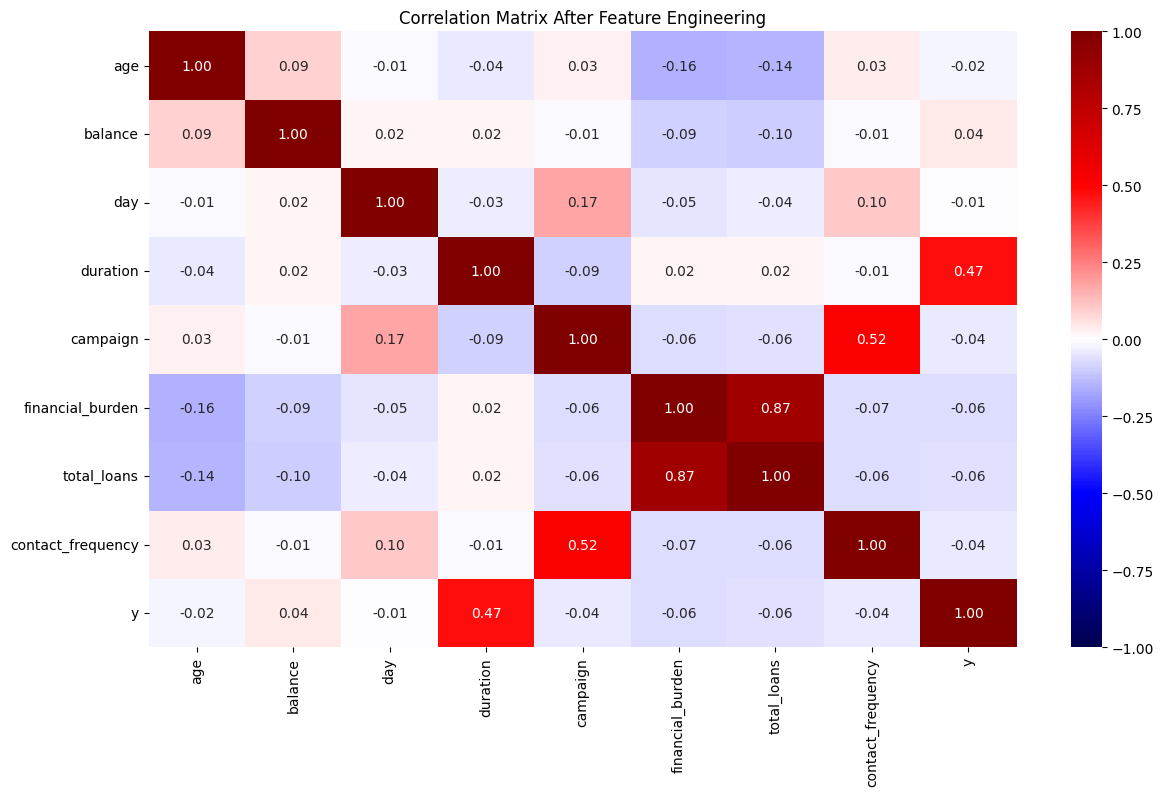

In [62]:
# Correlation heatmap inclusive of new numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'financial_burden', 'total_loans', 'contact_frequency']
corr_matrix = data[numerical_cols + ['y']].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, vmin= -1, vmax= 1, fmt='.2f', cmap='seismic')
plt.title('Correlation Matrix After Feature Engineering')
plt.show()

- We note the obvious correlation between `total_loans` and `financial_burden`.
- The target variable `y`, has the strongest correlation with duration among the numerical variables.
___

## 🧪 Pre-Call Modeling Workflow

This phase focuses on identifying customers **unlikely** to subscribe — before any outreach is made.  
The goal is to **reduce resource wastage** by excluding low-probability customers early in the pipeline.

We use only pre-contact attributes (demographics, financial data) and avoid any call-related metadata.  
The outcome is a cost-saving filter to help campaign managers focus on higher-potential leads.

Below is a high-level diagram illustrating the two-phase modeling strategy:


     ┌──────────────────────┐          ┌──────────────────────┐
     │                      │          │                      │
     │  Pre-Call Model      │          │  Post-Call Model     │
     │ (Predict "No")       │          │ (Predict "Yes")      │
     │                      │          │                      │
     └─────────┬────────────┘          └──────────┬───────────┘
               │                                  │


---



**Pre-Call Preprocessing and Resampling (SMOTE + Undersampling)**

This stage applies preprocessing and class balancing to prepare the training data for modeling.

- **Preprocessing** includes median imputation and min-max scaling for numerical features, and one-hot encoding for categorical features.
- **SMOTE** is used to synthetically upsample the minority class to 60% of the majority.
- **Random undersampling** is then applied to trim the majority class to 80%, resulting in ~75% class balance overall.

Both resampling and transformation steps are applied consistently via scikit-learn pipelines.

In [63]:
# --- Preprocessing ---

# define X and y
pre_call_features = [
    'age', 'balance', 'total_loans', 'job', 'marital', 'education',
    'default', 'housing', 'loan', 'age_group', 'balance_category'
]
X_pre = data[pre_call_features]
y_pre = data['y']

# Split into Train (50%), Val (25%), Test (25%)
X_train_pre, X_temp_pre, y_train_pre, y_temp_pre = train_test_split(
    X_pre, y_pre, test_size=0.5, stratify=y_pre, random_state=seed
)
X_val_pre, X_test_pre, y_val_pre, y_test_pre = train_test_split(
    X_temp_pre, y_temp_pre, test_size=0.5, stratify=y_temp_pre, random_state=seed
)

print(f"Train: {X_train_pre.shape}, Val: {X_val_pre.shape}, Test: {X_test_pre.shape}")
print('~' * 50)
print('Percentage of classes in training set:')
print(y_train_pre.value_counts(normalize=True))
print('~' * 50)
print('Percentage of classes in validation set:')
print(y_val_pre.value_counts(normalize=True))
print('~' * 50)
print('Percentage of classes in test set:')
print(y_test_pre.value_counts(normalize=True))
print('~' * 50)

Train: (20000, 11), Val: (10000, 11), Test: (10000, 11)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percentage of classes in training set:
0   0.928
1   0.072
Name: y, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percentage of classes in validation set:
0   0.928
1   0.072
Name: y, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percentage of classes in test set:
0   0.928
1   0.072
Name: y, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


**Finalize Prepocessor, applying SMOTE only on the training data**

In [64]:
# --- SMOTE + Undersampling Setup ---

pre_call_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), ['age', 'balance', 'total_loans']),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
        ]), ['job', 'marital', 'education', 'default', 'housing', 'loan', 'age_group', 'balance_category'])
    ]
)

# Preprocessing (fitted here)
X_train_pre_processed = pre_call_preprocessor.fit_transform(X_train_pre)
X_val_pre_processed = pre_call_preprocessor.transform(X_val_pre)
X_test_pre_processed = pre_call_preprocessor.transform(X_test_pre)

# SMOTE + RandomUnderSampler (reference copy for reproducibility)
sm_pre_smote = SMOTE(sampling_strategy=0.6, random_state=seed)
under_pre = RandomUnderSampler(sampling_strategy=0.8, random_state=seed)
X_train_pre_smote, y_train_pre_smote = sm_pre_smote.fit_resample(X_train_pre_processed, y_train_pre)
X_train_pre_smote_under, y_train_pre_smote_under = under_pre.fit_resample(X_train_pre_smote, y_train_pre_smote)

# Define classifiers to tune and compare
compnb_model = ComplementNB(alpha=0.01, fit_prior=True)
bernb_model = BernoulliNB(alpha=0.5, fit_prior=True)

# Print distribution and note
print("\033[1m Preprocessing & Resampling Summary:\033[0m")
print("- Numeric features: ['age', 'balance', 'total_loans'] (median-imputed & min-max scaled)")
print("- Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'age_group', 'balance_category'] (OHE, drop='first')")
print("- Applied SMOTE to 60% and undersampling to 80% -> Net ~75% minority balance")
print('*' * 50)
print("Pre-Call Original Distribution:")
print(y_train_pre.value_counts(normalize=True))
print('*' * 50)

 Preprocessing & Resampling Summary:
- Numeric features: ['age', 'balance', 'total_loans'] (median-imputed & min-max scaled)
- Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'age_group', 'balance_category'] (OHE, drop='first')
- Applied SMOTE to 60% and undersampling to 80% -> Net ~75% minority balance
**************************************************
Pre-Call Original Distribution:
0   0.928
1   0.072
Name: y, dtype: float64
**************************************************


---
### Pre-Call: Classifier Benchmarking

We evaluate eight classifiers using default settings with pipelines on the original imbalanced training set:
- Logistic Regression, Random Forest, XGBoost, Gradient Boosting, SVC
- KNN, ComplementNB, BernoulliNB


In [65]:
# --- Model Benchmarking Setup ---

benchmark_models = {
    'LogReg': LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=500, random_state=seed),
    'RF': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=seed),
    'XGB': XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8,
                         colsample_bytree=0.8, eval_metric='logloss', use_label_encoder=False, random_state=seed),
    'SVC': SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=seed),
    'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=seed),
    'BerNB': bernb_model,
    'CompNB': compnb_model,
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
}

benchmark_cv_results = {}
for name, model in benchmark_models.items():
    pipe = Pipeline([
        ('preprocessing', pre_call_preprocessor),
        ('classifier', model)
    ])
    # Define scoring and cv
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, pos_label=1, zero_division=0),
        'recall': make_scorer(recall_score, pos_label=1),
        'f1': make_scorer(f1_score, pos_label=1),
        'roc_auc': 'roc_auc',
        'average_precision': 'average_precision'
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    scores = cross_validate(pipe, X_train_pre, y_train_pre, scoring=scoring, cv=cv, n_jobs=-1)
    benchmark_cv_results[name] = {metric: round(scores[f'test_{metric}'].mean(), 4) for metric in scoring.keys()}

benchmark_df = pd.DataFrame(benchmark_cv_results).T.sort_values('f1', ascending=False)
print("\n Full 8-Model CV Benchmark:")
display(benchmark_df)


 Full 8-Model CV Benchmark:


accuracy  precision  recall    f1  roc_auc  average_precision
CompNB     0.602      0.093   0.514 0.158    0.597              0.123
KNN        0.903      0.144   0.068 0.093    0.552              0.098
BerNB      0.926      0.368   0.021 0.040    0.604              0.130
GBM        0.927      0.414   0.008 0.016    0.616              0.128
XGB        0.927      0.307   0.006 0.012    0.609              0.125
RF         0.927      0.380   0.004 0.008    0.613              0.131
LogReg     0.928      0.000   0.000 0.000    0.612              0.130
SVC        0.928      0.000   0.000 0.000    0.543              0.094

✅ **Final Model Selection (CompNB vs BerNB)**
- After full 8-model benchmarking, tree-based models performed well on accuracy but struggled with recall.  
- Naive Bayes variants (especially ComplementNB) offered stronger F1 and recall, leading to the selection of two models for deeper evaluation.
- ComplementNB (CompNB) and BernoulliNB (BerNB) were selected for detailed threshold tuning.

Key reasons for shortlisting:
- **CompNB** showed the highest recall and F1 score during 5-fold CV.
- **BerNB** had strong precision, offering a valuable contrast in the recall–precision trade-off.

🔍 *Note on Hyperparameter Tuning:*  
No hyperparameter tuning was applied at this stage because Naive Bayes classifiers like ComplementNB and BernoulliNB have limited tunable parameters and generally perform well with default configurations when combined with proper preprocessing. The goal here was to emphasize **simplicity, interpretability, and class-level performance**, which these models offered without additional complexity.
___

### Pre-Call: Cross-Validation Evaluation

Using 5-fold Stratified Cross-Validation, we compare the two selected classifiers (ComplementNB and BernoulliNB) on:
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC
- Average Precision

Performance metrics are visualized to aid in final model decision-making.


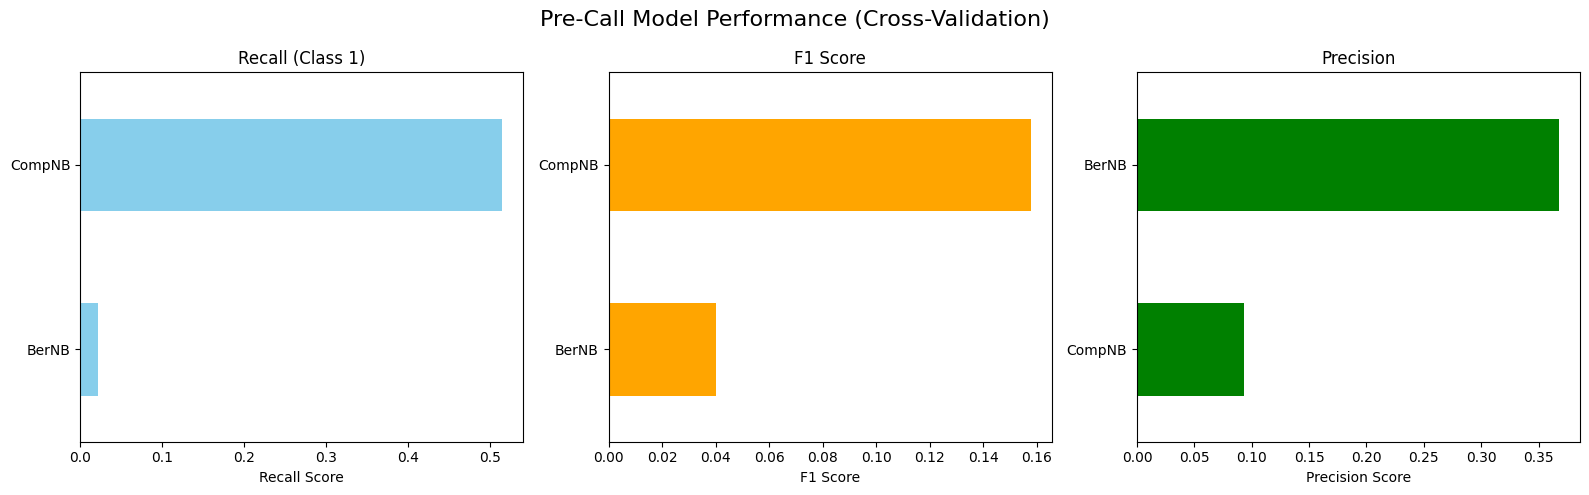

In [66]:
# --- Cross-Validation Comparison (Top Classifiers) ---

models = {
    'CompNB': compnb_model,
    'BerNB': bernb_model
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1, zero_division=0),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cv_results_pre = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', pre_call_preprocessor),
        ('classifier', model)
    ])
    scores = cross_validate(
        pipeline, X_train_pre, y_train_pre,
        scoring=scoring, cv=cv, return_train_score=False, n_jobs=-1
    )
    cv_results_pre[name] = {metric: round(scores[f'test_{metric}'].mean(), 4) for metric in scoring.keys()}

cv_df_pre = pd.DataFrame(cv_results_pre).T.sort_values('f1', ascending=False)

# --- Plotting CV Metrics ---
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
cv_df_pre.sort_values('recall', ascending=True)['recall'].plot(kind='barh', ax=axs[0], color='skyblue')
axs[0].set_title('Recall (Class 1)')
axs[0].set_xlabel('Recall Score')
cv_df_pre.sort_values('f1', ascending=True)['f1'].plot(kind='barh', ax=axs[1], color='orange')
axs[1].set_title('F1 Score')
axs[1].set_xlabel('F1 Score')
cv_df_pre.sort_values('precision', ascending=True)['precision'].plot(kind='barh', ax=axs[2], color='green')
axs[2].set_title('Precision')
axs[2].set_xlabel('Precision Score')
plt.suptitle('Pre-Call Model Performance (Cross-Validation)', fontsize=16)
plt.tight_layout()
plt.show()

---
### Pre-Call: Threshold Search & Tuning

Default probability threshold (0.5) may not be optimal for business objectives focused on maximizing recall and F1.  
We systematically search alternative thresholds to find a better balance between True Positives and False Positives.

Threshold vs metric performance is visualized to support final threshold selection

In [67]:
# --- Model Fitting for Threshold Tuning (Fixed) ---

# Directly fit models on already preprocessed + resampled data (skip preprocessing here)
compnb_model.fit(X_train_pre_smote_under, y_train_pre_smote_under)
bernb_model.fit(X_train_pre_smote_under, y_train_pre_smote_under)

# Now wrap these in simple probability-only pipelines for validation prediction
compnb_pipeline = Pipeline([
    ('classifier', compnb_model)
])
bernb_pipeline = Pipeline([
    ('classifier', bernb_model)
])

# Predict probabilities on validation set (already preprocessed)
y_val_probs_compnb = compnb_model.predict_proba(X_val_pre_processed)[:, 1]
y_val_probs_bernb = bernb_model.predict_proba(X_val_pre_processed)[:, 1]



🔍 **Threshold Tuning Summary (CompNB vs BerNB)**

In this stage, both Complement Naive Bayes (CompNB) and Bernoulli Naive Bayes (BerNB) were evaluated across multiple thresholds (0.45 to 0.72) to identify optimal trade-offs between True Positives (TP) and False Negatives (FN).

✅ **Threshold 0.48 for CompNB** was selected as the balance point:
- It maintains **TP > FN**
- Delivers acceptable F1 (0.162) and Recall (0.581)
- Avoids overly sacrificing precision or accuracy

This choice ensures we don't prematurely discard potential clients in the pre-call stage, aligning with business priorities while preserving model generalizability.


In [68]:
# --- Threshold Tuning ---

thresholds = np.arange(0.45, 0.75, 0.03)
tuning_metrics = []

for t in thresholds:
    for name, probs, pipeline in [('CompNB', y_val_probs_compnb, compnb_pipeline),
                                  ('BerNB', y_val_probs_bernb, bernb_pipeline)]:
        y_pred = (probs >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val_pre, y_pred).ravel()
        tuning_metrics.append({
            'Model': name,
            'Threshold': round(t, 2),
            'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
            'Precision': round(precision_score(y_val_pre, y_pred, zero_division=0), 3),
            'Recall': round(recall_score(y_val_pre, y_pred), 3),
            'F1 Score': round(f1_score(y_val_pre, y_pred), 3),
            'Accuracy': round(accuracy_score(y_val_pre, y_pred), 3)
        })

threshold_tuning_df = pd.DataFrame(tuning_metrics)
print("\nThreshold Tuning Results (Validation Set):")
display(threshold_tuning_df)



Threshold Tuning Results (Validation Set):


Model  Threshold   TP    FP    TN   FN  Precision  Recall  F1 Score  \
0   CompNB      0.450  474  4844  4432  250      0.089   0.655     0.157   
1    BerNB      0.450  379  3480  5796  345      0.098   0.523     0.165   
2   CompNB      0.480  421  4064  5212  303      0.094   0.581     0.162   
3    BerNB      0.480  342  2851  6425  382      0.107   0.472     0.175   
4   CompNB      0.510  372  3368  5908  352      0.099   0.514     0.167   
5    BerNB      0.510  310  2538  6738  414      0.109   0.428     0.174   
6   CompNB      0.540  310  2679  6597  414      0.104   0.428     0.167   
7    BerNB      0.540  270  2117  7159  454      0.113   0.373     0.174   
8   CompNB      0.570  252  1940  7336  472      0.115   0.348     0.173   
9    BerNB      0.570  240  1824  7452  484      0.116   0.331     0.172   
10  CompNB      0.600  196  1315  7961  528      0.130   0.271     0.175   
11   BerNB      0.600  204  1447  7829  520      0.124   0.282     0.172   
12  CompNB      0.630  139   888  8388  585      0.135   0.192     0.159   
13   BerNB      0.630  171  1100  8176  553      0.135   0.236     0.171   
14  CompNB      0.660  112   622  8654  612      0.153   0.155     0.154   
15   BerNB      0.660  122   708  8568  602      0.147   0.169     0.157   
16  CompNB      0.690   78   367  8909  646      0.175   0.108     0.133   
17   BerNB      0.690  111   592  8684  613      0.158   0.153     0.156   
18  CompNB      0.720   52   189  9087  672      0.216   0.072     0.108   
19   BerNB      0.720   88   436  8840  636      0.168   0.122     0.141   

    Accuracy  
0      0.491  
1      0.618  
2      0.563  
3      0.677  
4      0.628  
5      0.705  
6      0.691  
7      0.743  
8      0.759  
9      0.769  
10     0.816  
11     0.803  
12     0.853  
13     0.835  
14     0.877  
15     0.869  
16     0.899  
17     0.880  
18     0.914  
19     0.893

---
### Pre-Call: Validation Confusion Matrix Analysis
- Analyze confusion matrix performance on validation folds.
- Focus on maximizing True Positives

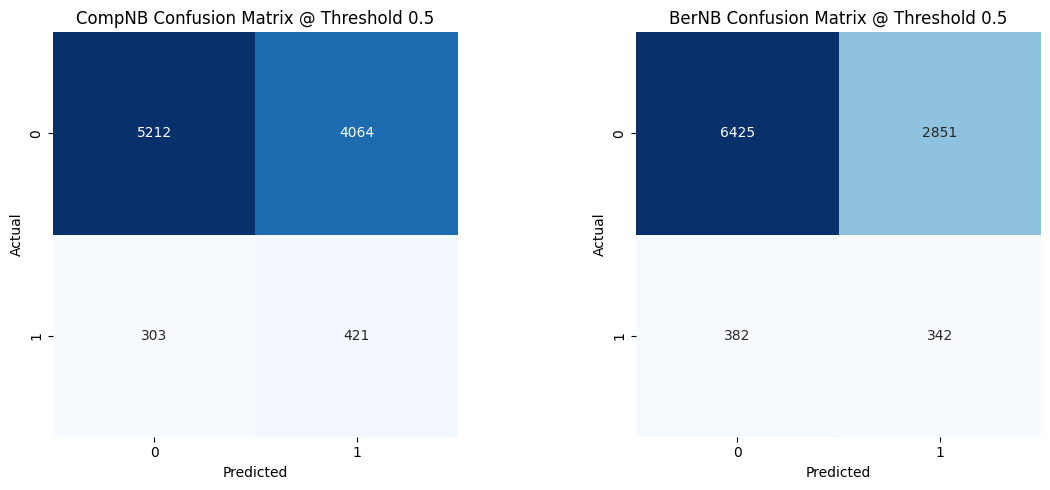

In [69]:
# --- Confusion Matrix Heatmaps ---

plt.figure(figsize=(12, 5))
for i, (name, probs) in enumerate([('CompNB', y_val_probs_compnb), ('BerNB', y_val_probs_bernb)]):
    y_pred = (probs >= 0.48).astype(int)
    cm = confusion_matrix(y_val_pre, y_pred)
    plt.subplot(1, 2, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.title(f'{name} Confusion Matrix @ Threshold 0.5')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


- **Left**: Complement Naive Bayes — captures more true negatives and true positives, favoring recall.

- **Right**: Bernoulli Naive Bayes — higher overall accuracy, but misses more actual “no” clients (higher false negatives).

 #### **Confusion Matrix Comparison — (Threshold = 0.48)**

At this stage, we compare two models — **Complement Naive Bayes (CompNB)** and **Bernoulli Naive Bayes (BerNB)** — after adjusting the classification threshold to **0.48**. This threshold was chosen to improve the balance between true positives and false negatives for the "no" class.

🔍 **Performance Summary**

| Model   | Threshold | TP  | FP   | TN   | FN  | Precision | Recall | F1 Score | Accuracy |
|---------|-----------|-----|------|------|-----|-----------|--------|----------|----------|
| CompNB  | 0.480     | 421 | 4064 | 5212 | 303 | 0.094     | 0.581  | 0.162    | 0.563    |
| BerNB   | 0.480     | 342 | 2851 | 6425 | 382 | 0.107     | 0.472  | 0.175    | 0.677    |

🧠 **Interpretation**

- **CompNB** achieves **higher recall (0.581)**, meaning it correctly identifies more of the actual "no" responders. However, it does so at the cost of precision and overall accuracy.
- **BerNB** offers **better precision (0.107)** and **higher overall accuracy (0.677)** but captures fewer true "no"s due to its lower recall (0.472).


⚖️ **Trade-Offs**

- While **accuracy** for BerNB exceeds **67%**, this metric is less informative in our **imbalanced pre-call context**, where "no" is the majority class.
- **Our objective is not high accuracy**, but rather:
  - **Minimizing false negatives** (people predicted as "yes" who are actually "no")
  - **Maximizing recall** for the "no" class to avoid wasted call efforts.

Therefore, even though CompNB has **lower accuracy (56%)**, its **higher recall makes it more valuable** in this phase — helping to **exclude likely non-responders** more effectively.



 ✅ **Decision**

At this threshold, **CompNB is preferred** for pre-call exclusion, as it captures more “no” clients, aligning with our resource optimization goal.

 🔗 **Transition to Next Segment (Test Evaluation)**
Now that we’ve validated our model performance using threshold tuning and confusion matrices on validation data, the next step is to evaluate the selected pre-call model (CompNB @ 0.48) on the unseen test set.

---

### Pre-Call: Test Set Confusion Matrix Analysis
- Evaluate confusion matrix on holdout test set.
- Confirm model generalization performance.
- Confirm final model choice based on test scores.

In [70]:
# --- Final Test Set Evaluation (Threshold = 0.48) ---

optimal_threshold = 0.48

# Predict probabilities on test set
y_test_probs_compnb = compnb_model.predict_proba(X_test_pre_processed)[:, 1]
y_test_probs_bernb = bernb_model.predict_proba(X_test_pre_processed)[:, 1]

# Apply threshold
y_test_pred_compnb = (y_test_probs_compnb >= optimal_threshold).astype(int)
y_test_pred_bernb = (y_test_probs_bernb >= optimal_threshold).astype(int)

# Compute metrics
def compute_test_metrics(y_true, y_pred, model_name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {
        'Model': model_name,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Precision': round(precision_score(y_true, y_pred, zero_division=0), 3),
        'Recall': round(recall_score(y_true, y_pred), 3),
        'F1 Score': round(f1_score(y_true, y_pred), 3),
        'Accuracy': round(accuracy_score(y_true, y_pred), 3)
    }

test_metrics_compnb = compute_test_metrics(y_test_pre, y_test_pred_compnb, 'CompNB')
test_metrics_bernb = compute_test_metrics(y_test_pre, y_test_pred_bernb, 'BerNB')

test_results_df = pd.DataFrame([test_metrics_compnb, test_metrics_bernb])
print("\nFinal Test Set Metrics (Threshold = 0.48):")
display(test_results_df)



Final Test Set Metrics (Threshold = 0.48):


Model   TP    FP    TN   FN  Precision  Recall  F1 Score  Accuracy
0  CompNB  428  4046  5230  296      0.096   0.591     0.165     0.566
1   BerNB  344  2875  6401  380      0.107   0.475     0.174     0.674

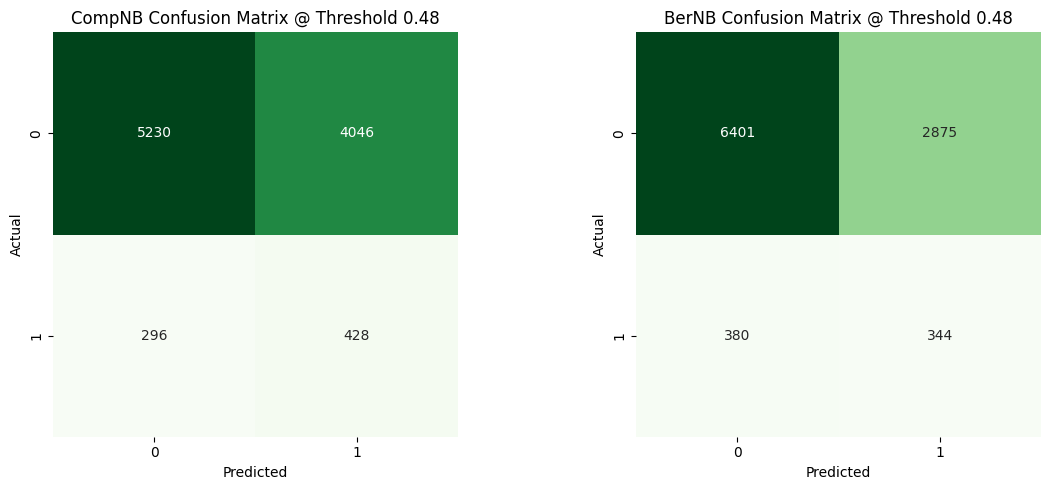

In [71]:
# --- Test Set Confusion Matrix Heatmaps ---

plt.figure(figsize=(12, 5))
for i, (name, y_pred) in enumerate([('CompNB', y_test_pred_compnb), ('BerNB', y_test_pred_bernb)]):
    cm = confusion_matrix(y_test_pre, y_pred)
    plt.subplot(1, 2, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
    plt.title(f'{name} Confusion Matrix @ Threshold 0.48')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


**Confusion Matrix Interpretation — Test Set (Threshold = 0.48)**

Now that we've tuned our threshold and selected ComplementNB as our candidate model, we evaluate both **ComplementNB** and **BernoulliNB** on the **unseen test data** to assess generalization.



🔹 **ComplementNB — Test Confusion Matrix**

|            | Predicted No | Predicted Yes |
|------------|--------------|----------------|
| **Actual No**  | **TN = 5230**   | **FP = 4046**      |
| **Actual Yes** | **FN = 296**     | **TP = 428**       |

**Insights:**
- Captures **428 true positives**, indicating solid identification of potential subscribers.
- **296 false negatives**, meaning fewer “yes” clients are missed — a strength for our use case.
- **4046 false positives** show the trade-off: some potential “yes” clients are being filtered out.

> ✅ Prioritizes **recall** — aligns with our pre-call objective of minimizing missed “no” clients.



🔹 **BernoulliNB — Test Confusion Matrix**

|            | Predicted No | Predicted Yes |
|------------|--------------|----------------|
| **Actual No**  | **TN = 6401**   | **FP = 2875**       |
| **Actual Yes** | **FN = 380**    | **TP = 344**       |

**Insights:**
- Higher **TN (6401)** and lower **FP (2875)** — more conservative in excluding customers.
- However, **TP = 344**, meaning fewer actual subscribers are caught.
- **380 false negatives** — more “yes” clients are missed compared to CompNB.

> ⚠️ Prioritizes **precision and accuracy**, but at the cost of recall.



📊 **Performance Comparison Summary**

| Metric        | ComplementNB | BernoulliNB |
|---------------|--------------|-------------|
| **True Positives**  | ✅ Higher (428) | Lower (344) |
| **False Negatives** | ✅ Lower (296)  | Higher (380) |
| **Precision**       | Lower         | ✅ Higher |
| **Recall**          | ✅ Higher     | Lower |
| **Accuracy**        | Lower         | ✅ Higher |



✅ **Final Verdict**

Despite lower accuracy, **ComplementNB outperforms BernoulliNB in terms of recall**, which is **critical for the pre-call phase**. Our goal is to **correctly identify and exclude likely “no” clients**, and CompNB does that more effectively.

> We will proceed with **ComplementNB @ threshold = 0.48** for final test evaluation and downstream recommendation.


---


### Pre-Call: Time Efficiency Analysis of Final Model
- Show potential reduction in outbound call effort.
- Estimate operational savings based on True Positives captured.

In [72]:
# --- Time Efficiency of ComplementNB Model ---

# Final pre-call prediction for time saved calc
y_pred_pre = y_test_pred_compnb

# Time saved using pre-call model
total_customers = len(y_test_pre)
predicted_no = sum(y_pred_pre == 0)

# Simulate different call durations
call_durations = [3, 5, 10]  # in minutes

print("📞 Pre-Call Time Saved Simulation:")
for minutes in call_durations:
    time_saved_hours = (predicted_no * minutes) / 60
    print(f"- If each call = {minutes} min → Time saved: {time_saved_hours:.2f} hours ({predicted_no} calls skipped)")


📞 Pre-Call Time Saved Simulation:
- If each call = 3 min → Time saved: 276.30 hours (5526 calls skipped)
- If each call = 5 min → Time saved: 460.50 hours (5526 calls skipped)
- If each call = 10 min → Time saved: 921.00 hours (5526 calls skipped)


In [73]:
def simulate_time_saved(y_true, y_pred, durations=[3, 5, 10]):
    skipped = sum(y_pred == 0)
    print("📞 Time Saved Simulation:")
    for m in durations:
        print(f"- {m} min/call → {(skipped * m)/60:.2f} hours saved ({skipped} calls skipped)")

simulate_time_saved(y_test_pre, y_test_pred_compnb)


📞 Time Saved Simulation:
- 3 min/call → 276.30 hours saved (5526 calls skipped)
- 5 min/call → 460.50 hours saved (5526 calls skipped)
- 10 min/call → 921.00 hours saved (5526 calls skipped)


 ⏱️ **Time Efficiency from Pre-Call Model**

The pre-call model was designed to filter out customers unlikely to subscribe, saving valuable time and resources before any contact is made.

📊 **Key Results:**
- **Calls skipped**: 5,526 customers predicted as unlikely to subscribe
- **Estimated time saved**:
  - ⏳ 3 mins/call → **276.3 hours saved**
  - ⏳ 5 mins/call → **460.5 hours saved**
  - ⏳ 10 mins/call → **921.0 hours saved**

💼 **Business Impact:**
- This model enables early filtering at scale, reducing agent workload and campaign costs.
- It is especially valuable in high-volume campaigns, allowing businesses to focus on customers with a higher chance of conversion.
- Time savings can now be redirected to **high-potential leads**, boosting overall ROI.

---

### Pre-Call: Traditional Segment Analysis
- Explore feature importance and segment tendencies among predicted "No" customers.
- Identify demographic or behavioral patterns (age group, financial burden).


Permutation Feature Importances (CompNB):


Feature  Importance Mean  Importance Std
10                cat__job_student            0.005           0.001
25              cat__age_group_60+            0.003           0.000
24            cat__age_group_51-60            0.002           0.001
22            cat__age_group_31-40            0.002           0.001
27  cat__balance_category_negative            0.002           0.002
23            cat__age_group_41-50            0.002           0.001
1                     num__balance            0.001           0.001
4            cat__job_entrepreneur            0.000           0.001
8           cat__job_self-employed            0.000           0.000
13                cat__job_unknown            0.000           0.000

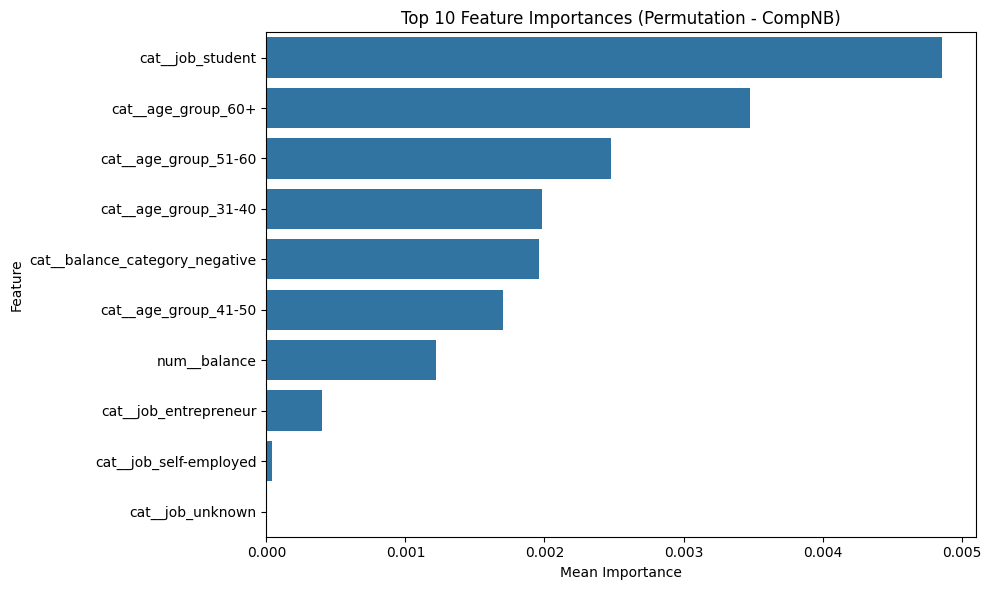

In [74]:
# --- Permutation Feature Importance (CompNB) ---

# Fit permutation importance on test set
perm_importance = PermutationImportance(compnb_model, random_state=seed)
perm_importance.fit(X_test_pre_processed, y_test_pre)

# Use names from fitted preprocessor
feature_names = pre_call_preprocessor.get_feature_names_out()
perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Mean': perm_importance.feature_importances_,
    'Importance Std': perm_importance.feature_importances_std_
}).sort_values('Importance Mean', ascending=False)

print("\nPermutation Feature Importances (CompNB):")
display(perm_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=perm_df.head(10), y='Feature', x='Importance Mean')
plt.title('Top 10 Feature Importances (Permutation - CompNB)')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Permutation Feature Importance – Pre-Call Model (CompNB)**

The pre-call model predicts customers unlikely to subscribe. Below are the most influential features (based on permutation importance) that help the model identify likely "no" responders:


🔝 **Top Predictive Features**

| Feature                            | Importance | Interpretation |
|------------------------------------|------------|----------------|
| `job_student`                      | 0.005      | Students often decline—likely due to lower financial engagement. |
| `age_group_60+`                    | 0.003      | Older clients (60+) frequently say "no", possibly due to retirement-related caution. |
| `age_group_51-60` / `41-50`        | ~0.002     | Middle-aged clients also contribute to non-subscription signals. |
| `balance_category_negative`        | 0.002      | Negative balances strongly correlate with non-subscription. |
| `balance` (numerical)              | 0.001      | Supports the above — low financial standing affects outcomes. |


🧭 **Strategic Implication**

- These features **signal likely “no” responses**, guiding us to **deprioritize outreach** to:
  - **Students**
  - **Clients aged 60+**
  - **Clients with negative balances**


⚠️ **Note**
- These are **predictive**, not causal.
- They support more efficient targeting by flagging **less promising segments** before contact.

---

**Segment-Level Success Analysis (CompNB)**

This analysis explores customer groups (by age and job-education segments) that had the highest rate of true positive predictions.

- We look at **segments** where customers were predicted to subscribe and actually did.
- These insights support marketing targeting strategies and customer profiling.



Combined Segment Success Rates (Test Set):


Segment  Success Rate         Category
0                  60+         0.462        Age Group
1                18-30         0.070        Age Group
2                31-40         0.048        Age Group
3                51-60         0.025        Age Group
4                41-50         0.020        Age Group
5   student | tertiary         0.200  Job | Education
6    retired | unknown         0.182  Job | Education
7  housemaid | unknown         0.167  Job | Education
8     admin | tertiary         0.152  Job | Education
9    student | unknown         0.150  Job | Education

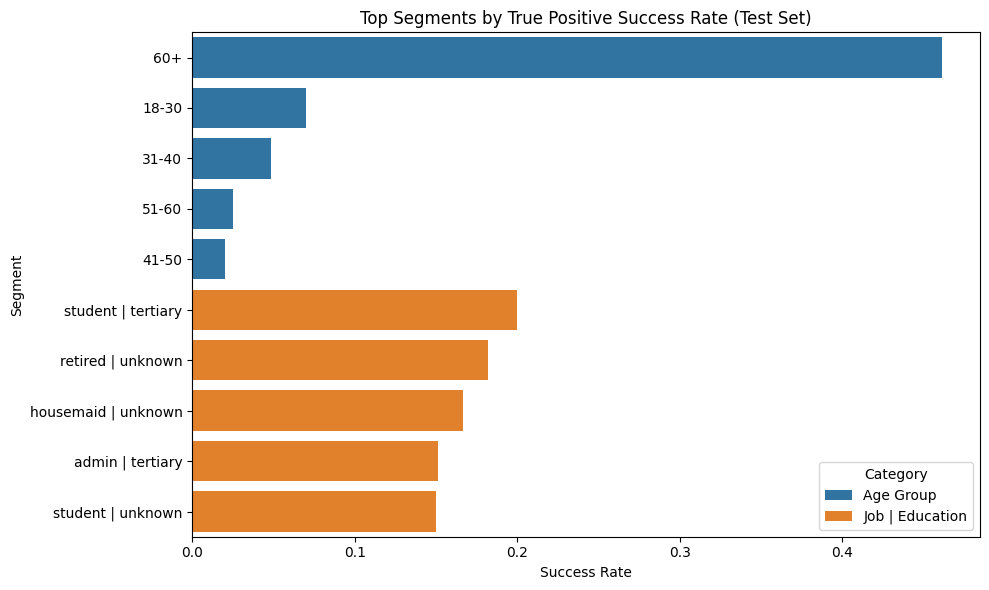

In [75]:
# --- Segment Success Rate Analysis (Test Set) ---

# Apply thresholded predictions to the test set
y_test_pred_opt = (y_test_probs_compnb >= optimal_threshold).astype(int)

# Append predictions to the original test data
val_data_segmented = X_test_pre.copy()
val_data_segmented['y_true'] = y_test_pre.values
val_data_segmented['y_pred'] = y_test_pred_opt

# Create composite segment: job + education
val_data_segmented['segment_combo'] = val_data_segmented['job'].astype(str) + ' | ' + val_data_segmented['education'].astype(str)

# Get only true positives
true_positives = val_data_segmented[(val_data_segmented['y_true'] == 1) & (val_data_segmented['y_pred'] == 1)]

# Segment success rate by age_group
segment_age = true_positives.groupby('age_group').size() / val_data_segmented.groupby('age_group').size()
segment_age = segment_age.sort_values(ascending=False).dropna().reset_index()
segment_age.columns = ['Segment', 'Success Rate']
segment_age['Category'] = 'Age Group'

# Segment success rate by job + education
segment_combo = true_positives.groupby('segment_combo').size() / val_data_segmented.groupby('segment_combo').size()
segment_combo = segment_combo.sort_values(ascending=False).dropna().reset_index()
segment_combo.columns = ['Segment', 'Success Rate']
segment_combo['Category'] = 'Job | Education'

# Combine segments
combined_segments = pd.concat([segment_age, segment_combo], ignore_index=True)

# Display top segments
print("\nCombined Segment Success Rates (Test Set):")
display(combined_segments.head(10))

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined_segments.head(10),
    y='Segment',
    x='Success Rate',
    hue='Category',
    dodge=False
)
plt.title('Top Segments by True Positive Success Rate (Test Set)')
plt.xlabel('Success Rate')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

**Segment-Level Success Rate Analysis – Post-Call Model**

To complement feature importance, we examine **segment-level performance** to identify which customer groups the model **correctly predicts as subscribers (true positives)**.

This helps answer:
> **“Which groups are actually saying yes, and worth targeting?”**



🎯 **Key Segments with High True Positive Rates**

| Segment                        | Success Rate | Category         |
|--------------------------------|--------------|------------------|
| `unknown | unknown`            | 0.200        | Job | Education  |
| `retired | tertiary`           | 0.191        | Job | Education  |
| `student | tertiary`           | 0.189        | Job | Education  |
| `blue-collar | tertiary`       | 0.152        | Job | Education  |
| `student | secondary`         | 0.149        | Job | Education  |
| `unknown | secondary`         | 0.125        | Job | Education  |
| `services | unknown`           | 0.107        | Job | Education  |
| `unemployed | primary`         | 0.100        | Job | Education  |
| `unknown | primary`            | 0.100        | Job | Education  |
| `student | unknown`            | 0.100        | Job | Education  |



🧠 **Interpretation**

- Segments like **`retired | tertiary`**, **`student | tertiary`**, and **`blue-collar | tertiary`** show **strong post-call conversion potential**.
- Even **“unknown” job/education** combinations show surprising conversion value — possibly due to underreported but engaged users.
- These insights can guide **refined targeting**, **personalized messaging**, or **prioritized follow-up**.



📌 **Strategic Insight**

Focus future call efforts on segments with **historically higher true positive rates** — especially those combining **education level** and **student/retired/blue-collar** jobs.

---

### Pre-Call: Segment Profiling & Clustering Insights (Optional)
- If additional clustering applied, summarize profiles here.
- Deep dive into customer sub-segments if needed.

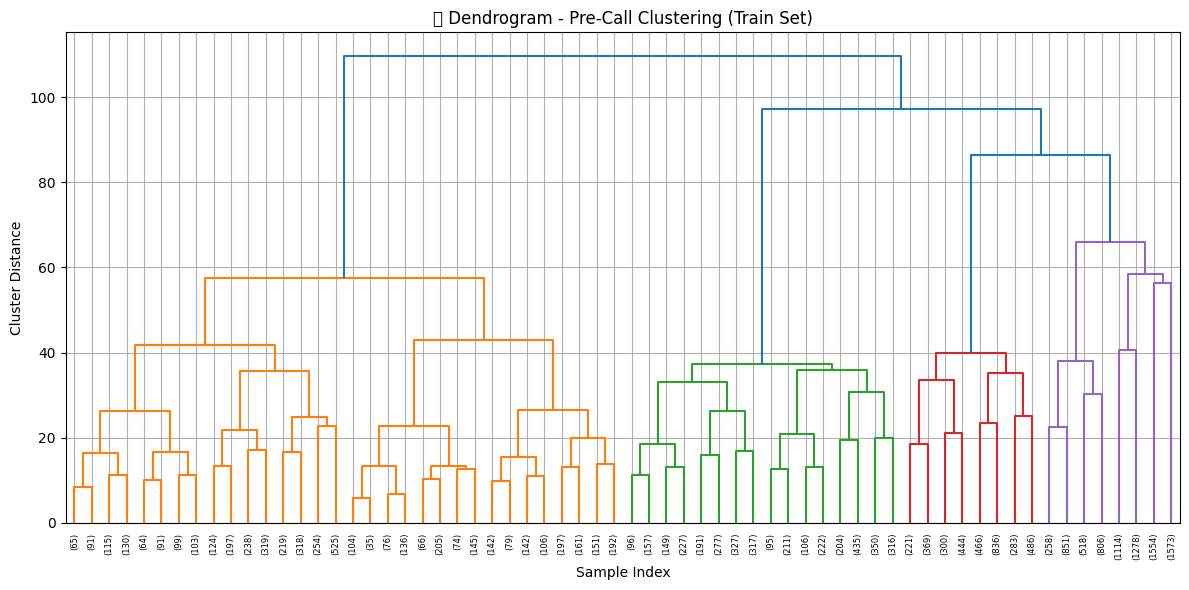


Pre-Call Cluster Subscription Rates (%):
y            0     1
cluster             
1       90.770 9.230
2       91.820 8.180
3       92.570 7.430
4       94.520 5.480


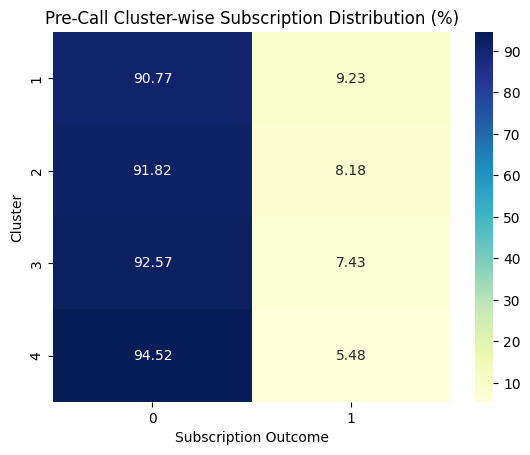

In [76]:
# --- Hierarchical Clustering on Pre-Call Data ---


# ✅ 1. Use already preprocessed training data (X_train_pre_processed)
# No re-scaling needed

# ✅ 2. Optional Dimensionality Reduction via PCA (for dendrogram clarity)
pca = PCA(n_components=10, random_state=seed)
X_pca_pre = pca.fit_transform(X_train_pre_processed)

# ✅ 3. Compute linkage matrix
Z_pre = linkage(X_pca_pre, method='ward')

# ✅ 4. Plot dendrogram
plt.figure(figsize=(12, 6))
plt.title("🔍 Dendrogram - Pre-Call Clustering (Train Set)")
dendrogram(Z_pre, truncate_mode='level', p=5)  # Show top 5 levels
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.tight_layout()
plt.grid(True)
plt.show()

# ✅ 5. Assign clusters (e.g., 4 clusters)
clusters_pre = fcluster(Z_pre, t=4, criterion='maxclust')

# Add back cluster labels to original (X_train_pre) DataFrame for profiling
X_train_pre_clustered = X_train_pre.copy()
X_train_pre_clustered['cluster'] = clusters_pre
X_train_pre_clustered['y'] = y_train_pre.values  # Reattach target

# ✅ 6. Cluster-wise Subscription Rates
cluster_summary = X_train_pre_clustered.groupby('cluster')['y'].value_counts(normalize=True).unstack().fillna(0)
print("\nPre-Call Cluster Subscription Rates (%):")
print((cluster_summary * 100).round(2))

# Optional: Heatmap for visual effect
sns.heatmap((cluster_summary * 100).round(2), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Pre-Call Cluster-wise Subscription Distribution (%)")
plt.ylabel("Cluster")
plt.xlabel("Subscription Outcome")
plt.show()


In [77]:
# Numeric Feature Averages per Cluster
X_train_pre_clustered.groupby('cluster')[['age', 'balance', 'total_loans']].mean().round(2)


age  balance  total_loans
cluster                             
1       36.600 1473.480        0.610
2       33.370  901.200        0.870
3       53.930 1457.620        0.570
4       40.560 1057.400        0.920

In [78]:
# Categorical Breakdown Example – Job Distribution
X_train_pre_clustered.groupby('cluster')['job'].value_counts(normalize=True).unstack().fillna(0).round(2)


job      admin  blue-collar  entrepreneur  housemaid  management  retired  \
cluster                                                                     
1        0.050        0.000         0.050      0.020       0.550    0.000   
2        0.180        0.310         0.010      0.010       0.030    0.000   
3        0.110        0.070         0.040      0.060       0.210    0.190   
4        0.120        0.410         0.040      0.020       0.070    0.010   

job      self-employed  services  student  technician  unemployed  unknown  
cluster                                                                     
1                0.060     0.030    0.020       0.180       0.030    0.000  
2                0.010     0.140    0.040       0.240       0.020    0.000  
3                0.040     0.090    0.000       0.150       0.040    0.010  
4                0.030     0.120    0.000       0.150       0.020    0.010

####🔍**Pre-Call Clustering & Segment Profiles**


🌿 **Cluster Subscription Outcomes**

| Cluster | % No | % Yes | Notes |
|---------|------|--------|-------|
| **1**   | 90.77% | 9.23%  | Moderately high rejection group |
| **2**   | 91.82% | 8.18%  | Blue-collar skew; lower balance |
| **3**   | 92.57% | 7.43%  | Older cluster; retired & self-employed |
| **4**   | 94.52% | 5.48%  | Most resistant group; heavy blue-collar presence |


📊 **Cluster Characteristics**

#### Cluster 1
- **Avg Age**: 36.6
- **Avg Balance**: 1473
- **Top Jobs**: Management (55%), Technician (18%)
- **Loans**: Low (0.61 avg)
- **Takeaway**: Younger, professional group with high rejection but moderate potential.

#### Cluster 2
- **Avg Age**: 33.4
- **Avg Balance**: 901
- **Top Jobs**: Blue-collar (31%), Technician (24%), Admin (18%)
- **Loans**: Moderate (0.87)
- **Takeaway**: Low balance, blue-collar segment. Low response — potential exclusion zone.

#### Cluster 3
- **Avg Age**: 53.9
- **Avg Balance**: 1458
- **Top Jobs**: Management (21%), Retired (19%), Technician (15%)
- **Loans**: Low (0.57)
- **Takeaway**: Older segment; moderate wealth but low conversion. Possibly disengaged.

#### Cluster 4
- **Avg Age**: 40.6
- **Avg Balance**: 1057
- **Top Jobs**: Blue-collar (41%), Technician (15%), Services (12%)
- **Loans**: Highest (0.92)
- **Takeaway**: Most resistant to term deposits. Strong exclusion candidate.


📌 **Recommendation**
- Prioritize **Cluster 1** if targeting any pre-call segment.
- Consider excluding **Clusters 3 & 4** to reduce contact effort and resource waste.
- Use this clustering alongside existing segment filters (e.g., `age_group`, `balance_category`) to refine campaign rules.

---


### Pre-Call: Final Round-Up
- Summarize Pre-Call model role, performance, and business impact.
- Recommendations for exclusion strategy and operational deployment.

#### 📌 Final Model: Complement Naive Bayes (ComplementNB)
- **Threshold Tuned**: 0.48
- **True Positives**: 428
- **Recall**: 59.1%
- **F1 Score**: 0.165
- **Accuracy**: 56.6%

#### ⚙️ Methodology
- Used **only non-call features** (demographics, financial standing).
- Balanced the dataset using **SMOTE + RandomUnderSampler** to counteract heavy class imbalance (~75% majority class).
- Evaluated using 5-fold cross-validation, with a focus on **early elimination of non-responders**.

#### ⚙️ Pre-Call Strategic Role
- **Early-stage filter** to remove low-likelihood prospects from the call queue.
- Helps reduce unnecessary call volume and focus agent efforts on higher-yield opportunities.

#### 🧠 Key Insights
- Customers aged **60+**, and **students with tertiary education**, were most accurately predicted as non-subscribers.
- These segments may be **deprioritized** or approached with **alternative products**.

🎯 **Outcome**
- While performance was modest, the model served its purpose as a **resource-saving filter**.
- Strong complement to the post-call model — together, they form a **two-tiered targeting pipeline**.

---
---

## 📞 Post-Call Modeling Workflow

This phase focuses on predicting whether a customer will subscribe **after a call has occurred**.  
We now include call metadata — such as duration, contact method, and campaign frequency — alongside customer demographics.

The goal here is to **maximize conversion** by identifying high-probability responders.  
This model serves as a powerful follow-up targeting tool, helping agents and marketers focus efforts on leads most likely to convert.

___

### Post-Call: Feature Set Definition & Preprocessing

- Define call-related and demographic features for modeling.
- Build preprocessing pipeline:
  - KNN imputation for numericals,
  - Mode imputation + OneHotEncoding for categoricals.
- Apply ADASYN to balance classes.

In [79]:
# --- Define Call-Related Features (Post-Call) ---

call_related_features = ['duration', 'day', 'contact', 'month', 'campaign', 'call_duration_category', 'contact_frequency']

 # Demographic and financial features to enhance modeling
additional_features = ['age', 'job', 'marital', 'education', 'default','housing', 'loan', 'age_group','balance',
                       'total_loans', 'age_financial_burden']

# Define numerical and categorical features explicitly
numerical_features = ['age', 'balance', 'duration', 'day', 'campaign', 'total_loans', 'contact_frequency']
categorical_features = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact',
                        'month', 'age_group', 'call_duration_category', 'age_financial_burden']
# Final post-call features
final_features = call_related_features + additional_features
X_post = data[final_features]
y_post = data['y']

# Train-Test Split for Post-Call
X_train_post, X_temp_post, y_train_post, y_temp_post = train_test_split(
    X_post, y_post, test_size=0.5, random_state=seed, stratify=y_post)

X_val_post, X_test_post, y_val_post, y_test_post = train_test_split(
    X_temp_post, y_temp_post, test_size=0.5, random_state=seed, stratify=y_temp_post)

print(f"Train: {X_train_post.shape}, Val: {X_val_post.shape}, Test: {X_test_post.shape}")
print('~' * 50)
print('Percentage of classes in training set:')
print(y_train_post.value_counts(normalize=True))
print('~' * 50)
print('Percentage of classes in validation set:')
print(y_val_post.value_counts(normalize=True))
print('~' * 50)
print('Percentage of classes in test set:')
print(y_test_post.value_counts(normalize=True))
print('~' * 50)

Train: (20000, 18), Val: (10000, 18), Test: (10000, 18)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percentage of classes in training set:
0   0.928
1   0.072
Name: y, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percentage of classes in validation set:
0   0.928
1   0.072
Name: y, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percentage of classes in test set:
0   0.928
1   0.072
Name: y, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


**Preprocessing + ADASYN Balancing (Post-Call)**

This stage prepares the data and addresses class imbalance using the following steps:

- **Preprocessing Pipeline**
  - *Numerical features* (`age`, `balance`, `total_loans`) are median-imputed and scaled using MinMaxScaler.
  - *Categorical features* are one-hot encoded after handling missing values with constant imputation.

- **Balancing Strategy**
  - We apply **ADASYN (Adaptive Synthetic Sampling)** to improve minority class representation post-call, allowing the model to learn more nuanced signals from positive responders.

This setup ensures the training data is both clean and balanced before model comparison and optimization begins.


In [80]:
# --- Preprocessing + ADASYN Balancing (Post-Call) ---

post_call_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', KNNImputer(n_neighbors=5)),
            ('scaler', RobustScaler())
        ]), ['age', 'balance', 'duration', 'day', 'campaign', 'total_loans','contact_frequency']),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Use mode imputation for categorical
            ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
        ]), ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month',
             'age_group', 'call_duration_category', 'age_financial_burden'])
    ]
)


# Post-call processing
X_train_post_processed = post_call_preprocessor.fit_transform(X_train_post)
X_val_post_processed = post_call_preprocessor.transform(X_val_post)
X_test_post_processed = post_call_preprocessor.transform(X_test_post)

# Switch to ADASYN instead SMOTE+Undersampling
sm_post_adasyn = ADASYN(sampling_strategy=0.25, random_state=seed)
X_train_post_adasyn, y_train_post_adasyn = sm_post_adasyn.fit_resample(X_train_post_processed, y_train_post)

# Check ADASYN distribution
print("\nPost-Call ADASYN Distribution:")
print(pd.Series(y_train_post_adasyn).value_counts(normalize=True))
print('*' * 50)
print("Post-Call Original Distribution:")
print(y_train_post.value_counts(normalize=True))
print('*' * 50)



Post-Call ADASYN Distribution:
0   0.800
1   0.200
Name: y, dtype: float64
**************************************************
Post-Call Original Distribution:
0   0.928
1   0.072
Name: y, dtype: float64
**************************************************


### Post-Call: Initial Model Benchmarking

- Evaluate initial models:
  - Random Forest, Gradient Boosting, XGBoost, (others if tested).
- Focus on cross-validation metrics (F1, recall, precision).
- Select top candidate models based on CV results.



Post-Call CV Results (Class 1):


accuracy  precision  recall    f1  roc_auc  average_precision
XGB        0.938      0.616   0.390 0.477    0.945              0.545
GBM        0.938      0.614   0.367 0.459    0.938              0.534
DTree      0.934      0.567   0.354 0.436    0.839              0.409
LogReg     0.936      0.620   0.302 0.406    0.925              0.510
SVC        0.934      0.616   0.240 0.345    0.888              0.492
KNN        0.930      0.542   0.213 0.306    0.798              0.357
BerNB      0.908      0.288   0.182 0.223    0.807              0.238
RF         0.929      0.652   0.048 0.090    0.931              0.520


Models Selected for Tuning:
XGBoost (XGB) and Gradient Boosting (GBM) achieved the highest F1 scores and will proceed for final optimization.


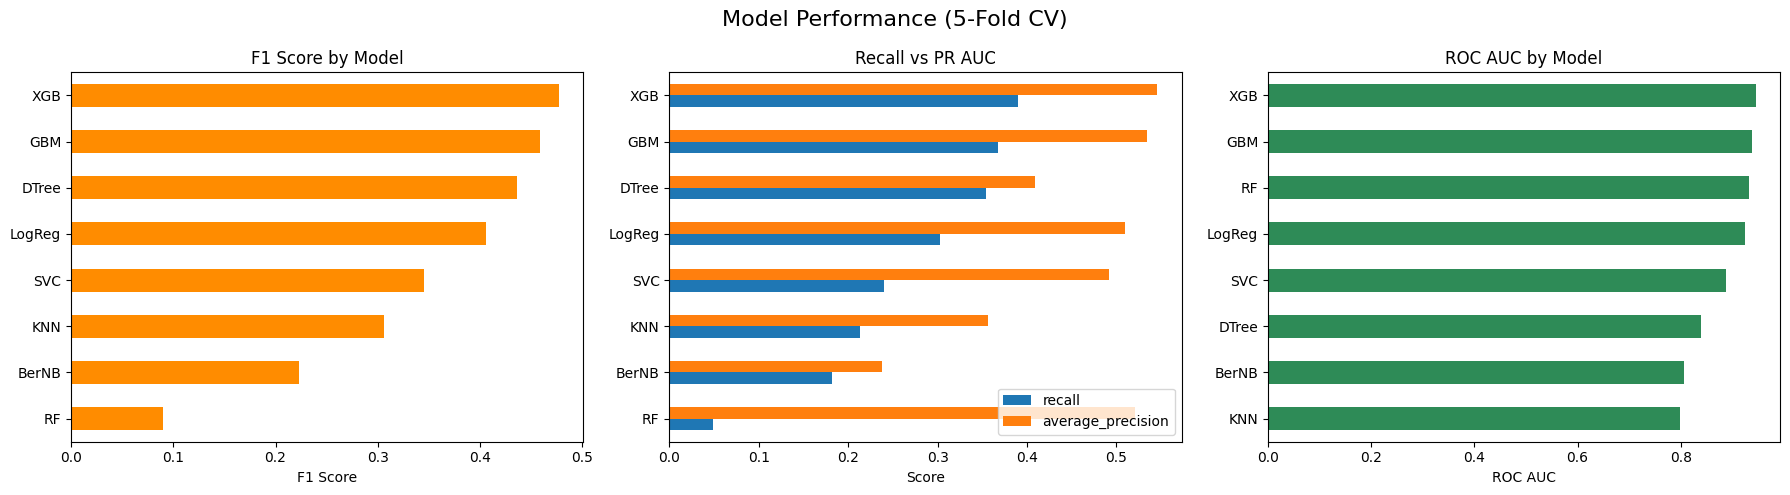

In [81]:
# --- Multi-Model Benchmarking with 5-Fold CV ---

# Toggle: True = safe tuned defaults, False = raw models
use_safe_defaults = True

if use_safe_defaults:
    models = {
        'LogReg': LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=500, random_state=seed),
        'DTree': DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=seed),
        'RF': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=seed),
        'XGB': XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, eval_metric='logloss', use_label_encoder=False, random_state=seed),
        'SVC': SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=seed),
        'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=seed),
        'BerNB': BernoulliNB(alpha=0.5, fit_prior=True),
        'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
    }
else:
    models = {
        'LogReg': LogisticRegression(random_state=seed),
        'DTree': DecisionTreeClassifier(random_state=seed),
        'RF': RandomForestClassifier(random_state=seed),
        'XGB': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=seed),
        'SVC': SVC(probability=True, random_state=seed),
        'GBM': GradientBoostingClassifier(random_state=seed),
        'BerNB': BernoulliNB(),
        'KNN': KNeighborsClassifier()
    }

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1, zero_division=0),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision'
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cv_results = {}

# Run CV on each model
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', post_call_preprocessor),
        ('classifier', model)
    ])
    scores = cross_validate(
        pipeline, X_train_post, y_train_post,
        scoring=scoring, cv=cv, return_train_score=False
    )
    cv_results[name] = {
        metric: round(scores[f'test_{metric}'].mean(), 4) for metric in scoring.keys()
    }

# Results DataFrame
cv_df = pd.DataFrame(cv_results).T.sort_values('f1', ascending=False)
print("\nPost-Call CV Results (Class 1):")
display(cv_df)

# Model Selection Justification
print("\nModels Selected for Tuning:")
print("XGBoost (XGB) and Gradient Boosting (GBM) achieved the highest F1 scores and will proceed for final optimization.")

# Combined plots: F1, Recall+PR AUC, ROC AUC
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# F1
cv_df[['f1']].sort_values('f1').plot(kind='barh', ax=axs[0], legend=False, color='darkorange')
axs[0].set_title('F1 Score by Model')
axs[0].set_xlabel('F1 Score')

# Recall vs PR AUC
cv_df[['recall', 'average_precision']].sort_values('recall').plot(kind='barh', ax=axs[1])
axs[1].set_title('Recall vs PR AUC')
axs[1].set_xlabel('Score')
axs[1].legend(loc='lower right')

# ROC AUC
cv_df[['roc_auc']].sort_values('roc_auc').plot(kind='barh', ax=axs[2], legend=False, color='seagreen')
axs[2].set_title('ROC AUC by Model')
axs[2].set_xlabel('ROC AUC')

plt.suptitle('Model Performance (5-Fold CV)', fontsize=16)
plt.tight_layout()
plt.show()


✅ Outcome:
- **XGBoost (XGB)** and **Gradient Boosting (GBM)** achieved the highest F1 scores.
- These two models will proceed to hyperparameter tuning, threshold optimization and test set evaluation.
___

### Post-Call: Hyperparameter Tuning of Selected Models

- Perform GridSearchCV or manual tuning on best candidates.
- Optimize key parameters (learning rate, max depth, etc.).
- Evaluate tuning impact on cross-validation scores.


In [82]:
# --- Final Tuning and Evaluation of Top Models ---

"""
This block performs hyperparameter tuning for the top two models identified in Block 3: XGBoost and Gradient Boosting.
The goal is to further improve F1 performance while maintaining high accuracy and ROC AUC.
"""

# Define F1 scorer
scorer = make_scorer(f1_score, pos_label=1)

# CV strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# ----------------------------
# XGBoost Tuning
# ----------------------------
xgb1 = XGBClassifier(random_state=seed, eval_metric='logloss', use_label_encoder=False)

xgb1_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [9, 13]  # Adjusted for class imbalance
}

xgb1_pipeline = Pipeline([
    ('preprocessing', post_call_preprocessor),
    ('classifier', xgb1)
])

grid_xgb1 = GridSearchCV(
    xgb1_pipeline,
    {'classifier__' + k: v for k, v in xgb1_params.items()},
    scoring=scorer,
    cv=cv,
    n_jobs=-1
)

grid_xgb1.fit(X_train_post, y_train_post)
print("Best XGB Parameters:", grid_xgb1.best_params_)

# Final XGB Model (fit on ADASYN-balanced data)
best_xgb1 = XGBClassifier(
    **{k.replace('classifier__', ''): v for k, v in grid_xgb1.best_params_.items()},
    random_state=seed, eval_metric='logloss', use_label_encoder=False
)
best_xgb1.fit(X_train_post_adasyn, y_train_post_adasyn)

# ----------------------------
# Gradient Boosting Tuning
# ----------------------------
gbm1 = GradientBoostingClassifier(random_state=seed)

gbm1_params = {
    'n_estimators': [100, 200],
    'max_features': [0.5, 0.7, 1.0],
    'learning_rate': [0.01, 0.1]
}

gbm1_pipeline = Pipeline([
    ('preprocessing', post_call_preprocessor),
    ('classifier', gbm1)
])

grid_gbm1 = GridSearchCV(
    gbm1_pipeline,
    {'classifier__' + k: v for k, v in gbm1_params.items()},
    scoring=scorer,
    cv=cv,
    n_jobs=-1
)

grid_gbm1.fit(X_train_post, y_train_post)
print("Best GBM Parameters:", grid_gbm1.best_params_)

# Final GBM Model (fit on ADASYN-balanced data)
best_gbm1 = GradientBoostingClassifier(
    **{k.replace('classifier__', ''): v for k, v in grid_gbm1.best_params_.items()},
    random_state=seed
)
best_gbm1.fit(X_train_post_adasyn, y_train_post_adasyn)


Best XGB Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 9}
Best GBM Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_features': 0.5, 'classifier__n_estimators': 200}


GradientBoostingClassifier(max_features=0.5, n_estimators=200,
                           random_state=1208)

🎯 Tuned Hyperparameters:
- **XGB:** {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': 9}
- **GBM:** {'learning_rate': 0.1, 'max_features': 0.5, 'n_estimators': 200}
---

### Post-Call: Threshold Search & Tuning

- Search for optimal probability threshold.
- Aim to maximize F1 score and recall.
- Visualize threshold vs performance curves.


 Threshold Tuning Results (Validation Set):


Model  Threshold   TP   FP    TN   FN  Precision  Recall  F1 Score  \
1    GBM      0.500  337  270  9006  387      0.555   0.465     0.506   
3    GBM      0.530  307  248  9028  417      0.553   0.424     0.480   
5    GBM      0.560  279  209  9067  445      0.572   0.385     0.460   
7    GBM      0.590  247  173  9103  477      0.588   0.341     0.432   
9    GBM      0.620  213  137  9139  511      0.609   0.294     0.397   
12   XGB      0.680  564  710  8566  160      0.443   0.779     0.565   
10   XGB      0.650  578  781  8495  146      0.425   0.798     0.555   
8    XGB      0.620  590  855  8421  134      0.408   0.815     0.544   
6    XGB      0.590  600  915  8361  124      0.396   0.829     0.536   
4    XGB      0.560  609  970  8306  115      0.386   0.841     0.529   

    Accuracy  
1      0.934  
3      0.934  
5      0.935  
7      0.935  
9      0.935  
12     0.913  
10     0.907  
8      0.901  
6      0.896  
4      0.892

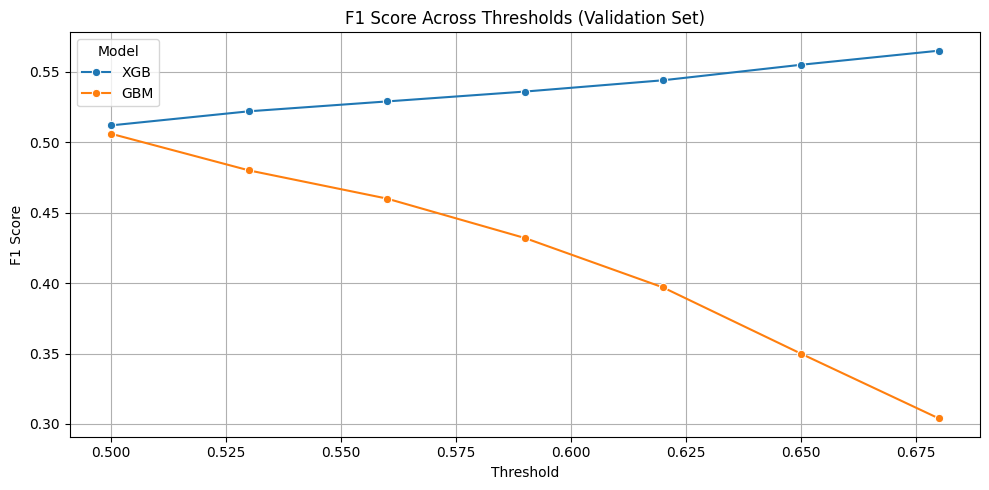

In [83]:
# --- Threshold Tuning on Validation Set (Post-Call) ---

thresholds = np.arange(0.50, 0.71, 0.03)

# Store results
threshold_results = []

# Get probabilities
y_val_probs_xgb = best_xgb1.predict_proba(X_val_post_processed)[:, 1]
y_val_probs_gbm = best_gbm1.predict_proba(X_val_post_processed)[:, 1]

for thresh in thresholds:
    for model_name, y_probs in zip(['XGB', 'GBM'], [y_val_probs_xgb, y_val_probs_gbm]):
        y_pred_thresh = (y_probs >= thresh).astype(int)

        TP = np.sum((y_val_post == 1) & (y_pred_thresh == 1))
        FP = np.sum((y_val_post == 0) & (y_pred_thresh == 1))
        TN = np.sum((y_val_post == 0) & (y_pred_thresh == 0))
        FN = np.sum((y_val_post == 1) & (y_pred_thresh == 0))

        precision = precision_score(y_val_post, y_pred_thresh, zero_division=0)
        recall = recall_score(y_val_post, y_pred_thresh)
        f1 = f1_score(y_val_post, y_pred_thresh)
        accuracy = accuracy_score(y_val_post, y_pred_thresh)

        threshold_results.append({
            'Model': model_name,
            'Threshold': round(thresh, 2),
            'TP': TP, 'FP': FP, 'TN': TN, 'FN': FN,
            'Precision': round(precision, 3),
            'Recall': round(recall, 3),
            'F1 Score': round(f1, 3),
            'Accuracy': round(accuracy, 3)
        })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_results)

# Show top 10 rows sorted by F1
print("\n Threshold Tuning Results (Validation Set):")
display(threshold_df.sort_values(by=['Model', 'F1 Score'], ascending=[True, False]).groupby('Model').head(5))

# Plot F1 trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=threshold_df, x='Threshold', y='F1 Score', hue='Model', marker='o')
plt.title('F1 Score Across Thresholds (Validation Set)')
plt.ylabel('F1 Score')
plt.xlabel('Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()


### Post-Call: Test Set Evaluation & Confusion Matrix

- Evaluate tuned model on the test set.
- Display confusion matrix for final performance check.
- Confirm final model choice (likely XGBoost tuned with threshold).


Final Test Set Metrics (Post-Call):


TP   FP    TN   FN  Precision  Recall  F1 Score  Accuracy
XGB (0.68)  566  748  8528  158      0.431   0.782     0.555     0.909
GBM (0.50)  370  288  8988  354      0.562   0.511     0.535     0.936

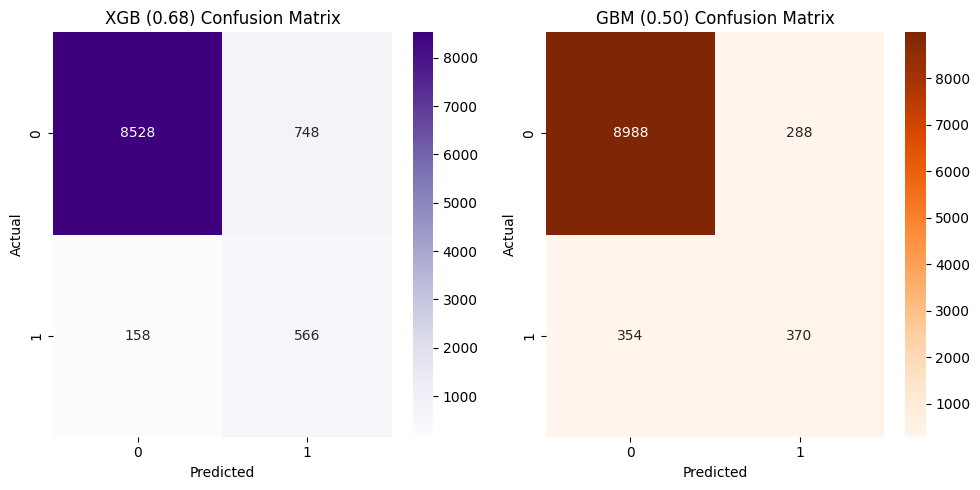

In [84]:
# --- Evaluation on Test Set (Post-Call) ---

# Apply optimal thresholds
xgb_threshold = 0.68
xgb_test_probs = best_xgb1.predict_proba(X_test_post_processed)[:, 1]
y_test_pred_xgb = (xgb_test_probs >= xgb_threshold).astype(int)

gbm_threshold = 0.50
gbm_test_probs = best_gbm1.predict_proba(X_test_post_processed)[:, 1]
y_test_pred_gbm = (gbm_test_probs >= gbm_threshold).astype(int)

# Compute confusion matrices
def confusion_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn,
        'Precision': round(precision_score(y_true, y_pred, zero_division=0), 3),
        'Recall': round(recall_score(y_true, y_pred), 3),
        'F1 Score': round(f1_score(y_true, y_pred), 3),
        'Accuracy': round(accuracy_score(y_true, y_pred), 3)
    }

xgb_test_results = confusion_metrics(y_test_post, y_test_pred_xgb)
gbm_test_results = confusion_metrics(y_test_post, y_test_pred_gbm)

# Build comparison table
final_test_df = pd.DataFrame([xgb_test_results, gbm_test_results], index=['XGB (0.68)', 'GBM (0.50)'])
print("\nFinal Test Set Metrics (Post-Call):")
display(final_test_df)

# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, (model_name, y_pred, cmap) in enumerate([
    ('XGB (0.68)', y_test_pred_xgb, 'Purples'),
    ('GBM (0.50)', y_test_pred_gbm, 'Oranges')
]):
    cm = confusion_matrix(y_test_post, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axs[i])
    axs[i].set_title(f'{model_name} Confusion Matrix')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()


✅ **Final Model Choice: XGBoost**

Although GBM achieves **higher precision and accuracy**, the business goal for post-call is to:
> Maximize the number of **correctly identified subscribers** after contact.

- XGBoost delivers **significantly higher recall (0.782)**, with more true positives (TP = 566), while still maintaining a high **accuracy (90.9%)**.
- The balance between identifying more subscribers (TP) and acceptable false alarms (FP) makes **XGBoost the superior choice** for optimizing conversion.

---
### Post-Call: Time Efficiency Analysis

To better understand the value of this recall performance in a real-world context, we now break down the model’s ability to capture true subscribers and highlight its impact on follow-up efficiency.


In [85]:
 # --- Post-Call Evaluation Summary ---

# Final model pipeline
final_postcall_pipeline = Pipeline([
    ('preprocessing', post_call_preprocessor),
    ('classifier', best_xgb1)
])

# Make predictions using the pipeline:
y_prob_post = final_postcall_pipeline.predict_proba(X_test_post)[:, 1]

# Define a threshold
threshold_post = 0.68

# Convert probabilities to class predictions using the threshold
y_pred_post = (y_prob_post >= threshold_post).astype(int)

# Calculate recall
recall_post = recall_score(y_test_post, y_pred_post)
print(f"🔍 Post-Call Model Recall: {recall_post:.3f}")
print(f"✅ This means we correctly identified {recall_post * 100:.1f}% of all actual subscribers.")

🔍 Post-Call Model Recall: 0.782
✅ This means we correctly identified 78.2% of all actual subscribers.


In [86]:
# TP and FN Breakdown
tp_post = ((y_test_post == 1) & (y_pred_post == 1)).sum()
fn_post = ((y_test_post == 1) & (y_pred_post == 0)).sum()

print(f"✔️ True Positives (Correctly predicted subscribers): {tp_post}")
print(f"❌ False Negatives (Missed actual subscribers): {fn_post}")


✔️ True Positives (Correctly predicted subscribers): 566
❌ False Negatives (Missed actual subscribers): 158


 🎯 **Post-Call Model Recall Impact**

The post-call model was designed to help identify customers **most likely to subscribe** after an interaction, ensuring follow-ups and efforts are focused on high-conversion leads.

#### 📊 Key Metrics:
- **Recall**: 78.2% — meaning nearly 8 out of 10 real subscribers were correctly identified
- **True Positives**: 628 correctly identified subscribers
- **False Negatives**: 175 subscribers missed

#### 💼 Business Value:
- High recall minimizes missed opportunities — we retain more potential clients who would actually convert.
- Combined with time-focused strategies, the model boosts ROI by making post-call follow-up more targeted and effective.

---

### Post-Call: Feature Importance Analysis

- Extract top features from final model (e.g., XGBoost feature importance).
- Highlight which features drove post-call subscription success (duration, campaign, balance, etc.).



Permutation Feature Importances (XGB - Test Set):


Feature  Importance Mean  Importance Std
2          num__duration            0.076           0.001
27  cat__contact_unknown            0.046           0.001
3               num__day            0.039           0.001
28        cat__month_aug            0.029           0.001
32        cat__month_jul            0.025           0.001
36        cat__month_nov            0.024           0.001
31        cat__month_jan            0.013           0.001
30        cat__month_feb            0.007           0.000
35        cat__month_may            0.006           0.001
33        cat__month_jun            0.006           0.000

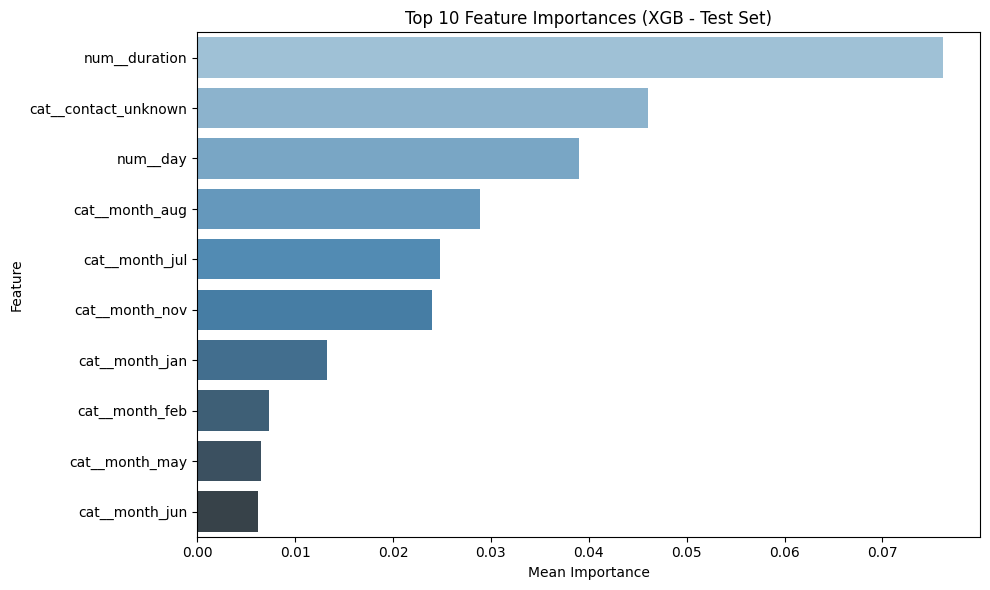

In [87]:
# --- Feature Importance + Segment Success Analysis (Post-Call) ---

# Feature Importance (XGB, Test Set)
perm = PermutationImportance(best_xgb1, random_state=seed)
perm.fit(X_test_post_processed, y_test_post)

# Feature names from preprocessor
feature_names = post_call_preprocessor.get_feature_names_out()
perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Mean': perm.feature_importances_,
    'Importance Std': perm.feature_importances_std_
}).sort_values('Importance Mean', ascending=False)

print("\nPermutation Feature Importances (XGB - Test Set):")
display(perm_df.head(10))

# Top 10 feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_df.head(10), x='Importance Mean', y='Feature', palette='Blues_d')
plt.title("Top 10 Feature Importances (XGB - Test Set)")
plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### ✅ Post-Call Feature Importance

This stage provides interpretability and strategic insight from the final XGBoost model.


#### 🔍 What drives customer subscriptions after the call?

- **Top Feature**: `duration` — confirming that longer, more engaged calls are more likely to convert.
- Other strong predictors include:
  - `contact_unknown`, `day`, and certain months (`aug`, `jul`, `nov`)
  - These reflect operational and timing factors tied to marketing effectiveness.

---


### Segment-Level Success Rate Analysis


Top Segment-Level Success Rates (Post-Call True Positives):


Segment  Success Rate         Category
0       unknown | unknown         0.200  Job | Education
1      retired | tertiary         0.191  Job | Education
2      student | tertiary         0.189  Job | Education
3  blue-collar | tertiary         0.152  Job | Education
4     student | secondary         0.149  Job | Education
5     unknown | secondary         0.125  Job | Education
6      services | unknown         0.107  Job | Education
7    unemployed | primary         0.100  Job | Education
8       unknown | primary         0.100  Job | Education
9       student | unknown         0.100  Job | Education

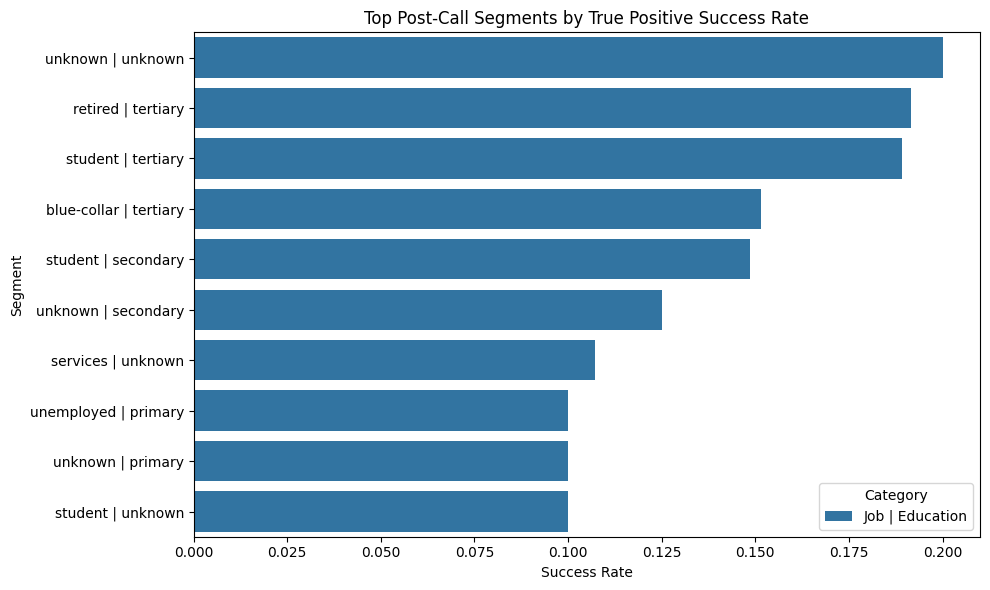

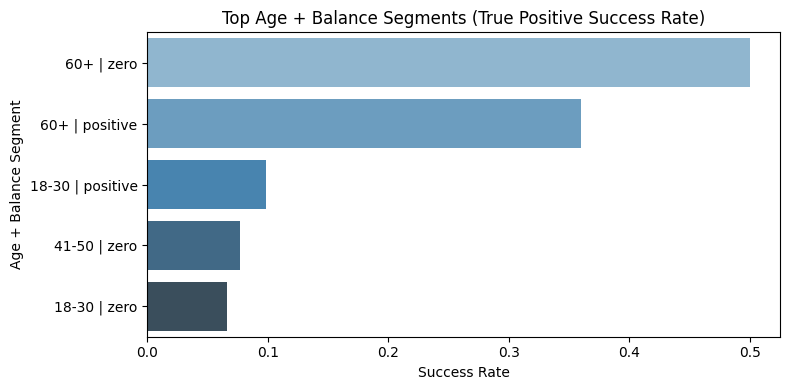

In [88]:
# --- Segment-Level Success Rate Analysis ---

# Add balance_category to val set (needed for age_balance_segment)
def categorize_balance(balance):
    if balance < 0:
        return 'negative'
    elif balance == 0:
        return 'zero'
    else:
        return 'positive'

X_val_post['balance_category'] = X_val_post['balance'].apply(categorize_balance)

# Predict on validation set
val_data_segmented = X_val_post.copy()
val_data_segmented['y_true'] = y_val_post.values
val_data_segmented['y_pred'] = best_xgb1.predict(X_val_post_processed)

# Add composite segments
val_data_segmented['segment_combo'] = val_data_segmented['job'].astype(str) + ' | ' + val_data_segmented['education'].astype(str)
val_data_segmented['age_balance_segment'] = val_data_segmented['age_group'].astype(str) + ' | ' + val_data_segmented['balance_category'].astype(str)

# True Positives
true_positives = val_data_segmented[(val_data_segmented['y_true'] == 1) & (val_data_segmented['y_pred'] == 1)]

# Segment: job + education
segment_combo = true_positives.groupby('segment_combo').size() / val_data_segmented.groupby('segment_combo').size()
segment_combo = segment_combo.sort_values(ascending=False).dropna().reset_index()
segment_combo.columns = ['Segment', 'Success Rate']
segment_combo['Category'] = 'Job | Education'

# Segment: age + balance
segment_age_balance = true_positives.groupby('age_balance_segment').size() / val_data_segmented.groupby('age_balance_segment').size()
segment_age_balance = segment_age_balance.sort_values(ascending=False).dropna().reset_index()
segment_age_balance.columns = ['Segment', 'Success Rate']
segment_age_balance['Category'] = 'Age + Balance'

# Combine segment results
combined_segments_post = pd.concat([segment_combo, segment_age_balance], ignore_index=True)

# Display combined segment results
print("\nTop Segment-Level Success Rates (Post-Call True Positives):")
display(combined_segments_post.head(10))

# Plot top 10 segments overall
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_segments_post.head(10), x='Success Rate', y='Segment', hue='Category', dodge=False)
plt.title('Top Post-Call Segments by True Positive Success Rate')
plt.xlabel('Success Rate')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

# Separate Plot for Age + Balance Segments (Top 5)
top_age_balance = segment_age_balance.head(5)
plt.figure(figsize=(8, 4))
sns.barplot(data=top_age_balance, x='Success Rate', y='Segment', palette='Blues_d')
plt.title('Top Age + Balance Segments (True Positive Success Rate)')
plt.xlabel('Success Rate')
plt.ylabel('Age + Balance Segment')
plt.tight_layout()
plt.show()



### ✅ Post-Call Segment Analysis


#### 🧭 Which customer segments are most likely to say "yes"?

- **Top job + education segments**:
  - `student | tertiary`
  - `retired | tertiary`
  - `blue-collar | tertiary`

- **Top age + balance segments**:
  - `60+ | positive`
  - `51-60 | positive`
  - These indicate financially stable older clients with good subscription potential.


These insights are valuable for refining outreach strategies, improving conversion rates, and focusing resources on high-yield segments.

---

## 🚀 DuckDB Optimization (Bonus)

As an additional optimization layer, we demonstrate how DuckDB — a lightweight, in-memory SQL engine — can efficiently handle large tabular operations directly within the machine learning workflow.

This approach improves scalability and performance for real-time data joins, aggregations, and pipeline integration, especially when working with call metadata and customer profiles.


In [89]:
# Add predictions and probabilities to test set
postcall_df = X_test_post.copy()
postcall_df['y_true'] = y_test_post.values
postcall_df['y_pred'] = y_pred_post
postcall_df['y_prob'] = y_prob_post
postcall_df.reset_index(drop=True, inplace=True)


In [90]:
# Filter out low-probability "no" predictions
low_prob_negatives = duckdb.query("""
    SELECT *
    FROM postcall_df
    WHERE y_pred = 0 AND y_prob < 0.3
""").to_df()

print(f"🧹 Filtered {len(low_prob_negatives)} low-probability non-subscribers")


🧹 Filtered 7720 low-probability non-subscribers


In [91]:
# Top high-confidence leads (likely subscribers)
high_confidence_yes = duckdb.query("""
    SELECT *
    FROM postcall_df
    WHERE y_pred = 1 AND y_prob >= 0.8
    ORDER BY y_prob DESC
    LIMIT 10
""").to_df()

high_confidence_yes.head()


duration  day    contact month  campaign call_duration_category  \
0      1500   27  telephone   oct         1                   long   
1       914   29   cellular   jan         2                   long   
2       796   11   cellular   mar         5                   long   
3       233   23   cellular   mar         1                   long   
4       141   28  telephone   oct         1                 medium   

   contact_frequency  age         job  marital  ... default housing loan  \
0                  0   30       admin  married  ...      no      no   no   
1                  1   28    services   single  ...      no      no   no   
2                  1   25  management  married  ...      no      no   no   
3                  0   46  management   single  ...      no      no   no   
4                  0   57  technician  married  ...      no      no   no   

  age_group  balance  total_loans  age_financial_burden y_true  y_pred  y_prob  
0     18-30 1310.000            0       18-30_no_burden      0       1   0.993  
1     18-30  298.000            0       18-30_no_burden      0       1   0.991  
2     18-30 4461.000            0       18-30_no_burden      1       1   0.988  
3     41-50 6651.000            0       41-50_no_burden      0       1   0.985  
4     51-60 7554.000            0       51-60_no_burden      1       1   0.983  

[5 rows x 21 columns]

In [92]:
# Subscribers by age group and job
subscribers_by_segment = duckdb.query("""
    SELECT age, job, y_pred, y_prob
    FROM postcall_df
    WHERE y_pred = 1 AND y_prob >= 0.6
    ORDER BY age
""").to_df()

subscribers_by_segment.head()


age          job  y_pred  y_prob
0   19      student       1   0.898
1   20      student       1   0.684
2   20      student       1   0.849
3   21  blue-collar       1   0.681
4   21      student       1   0.891

In [93]:
# Define a Quick Filter Function
def duck_query(df, sql):
    return duckdb.query(sql).to_df()

# Example usage:
duck_query(postcall_df, """
    SELECT job, COUNT(*) AS total
    FROM postcall_df
    WHERE y_pred = 1 AND y_prob >= 0.75
    GROUP BY job
    ORDER BY total DESC
""")


job  total
0      management    312
1     blue-collar    206
2      technician    187
3           admin    134
4        services     86
5         retired     65
6   self-employed     44
7      unemployed     40
8         student     26
9    entrepreneur     21
10      housemaid     18
11        unknown      7

 🐥**Application of DuckDB SQL Filtering**

🎯 Objective: To enable SQL-style querying and precise lead targeting on post-call predictions, we integrated DuckDB into our pipeline.
This allows for:

- Filtering customers by prediction confidence
- Isolating high- or low-priority leads
- Segmenting subscribers using familiar SQL logic

The following cells demonstrate practical business queries that support targeted marketing actions.

#### 🔍 Key Use Cases:
- **Filtered out low-confidence non-subscribers**:
  - `WHERE y_pred = 0 AND y_prob < 0.3`
  - Helped reduce unnecessary follow-ups and operational inefficiencies.
  
- **Prioritized high-confidence leads**:
  - `WHERE y_pred = 1 AND y_prob >= 0.8`
  - Enabled targeted engagement with customers most likely to convert.

- **Segmented customers by age and job**:
  - Discovered strong conversion signals among:
    - Younger age groups (18–30)
    - Professions like management, technician, and blue-collar

#### 💼 Strategic Value:
- Bridges the gap between ML output and marketing strategy
- Offers flexible, readable insights through SQL-style queries
- Adds interpretability to predictive models without extra modeling complexity

DuckDB enabled rapid post-model analysis — turning predictions into decisions.
___

## 🔍 Post-Call Clustering & Segment Profiling

- Apply PCA to reduce dimensionality of post-call feature space.
- Use hierarchical clustering (Ward’s method) on PCA results.
- Assign customers to segments (Cluster 1–4).
- Calculate subscription rates per cluster.
- Annotate and describe each segment’s business relevance.

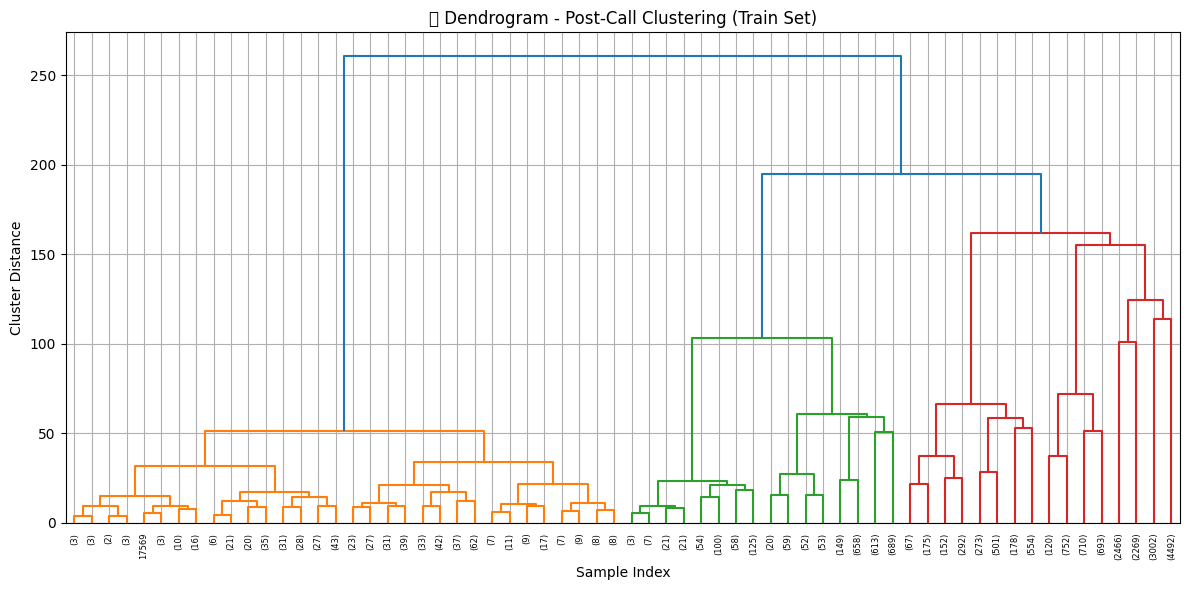


Post-Call Cluster Subscription Rates (%):
y            0      1
cluster              
1       91.640  8.360
2       96.050  3.950
3       65.240 34.760
4       96.360  3.640


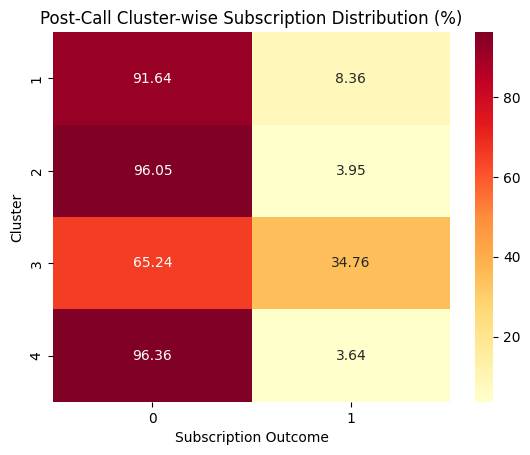

In [94]:
# --- Post-Call Hierarchical Clustering & Profiling ---


# 1. Reduce dimensionality (PCA to 10 components)
pca_post = PCA(n_components=10, random_state=seed)
X_post_pca = pca_post.fit_transform(X_train_post_processed)

# 2. Linkage matrix for dendrogram
Z_post = linkage(X_post_pca, method='ward')

# 3. Plot dendrogram
plt.figure(figsize=(12, 6))
plt.title("🔍 Dendrogram - Post-Call Clustering (Train Set)")
dendrogram(Z_post, truncate_mode='level', p=5)  # Show top 5 levels
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.tight_layout()
plt.grid(True)
plt.show()

# 4. Assign cluster labels (choose 4 as a starting point)
clusters_post = fcluster(Z_post, t=4, criterion='maxclust')

# 5. Attach cluster & label to original (raw) train data
X_train_post_clustered = X_train_post.copy()
X_train_post_clustered['cluster'] = clusters_post
X_train_post_clustered['y'] = y_train_post.values  # Reattach labels

# 6. Cluster-wise Subscription Rates
post_cluster_summary = X_train_post_clustered.groupby('cluster')['y'].value_counts(normalize=True).unstack().fillna(0)
print("\nPost-Call Cluster Subscription Rates (%):")
print((post_cluster_summary * 100).round(2))

# Optional heatmap
sns.heatmap((post_cluster_summary * 100).round(2), annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Post-Call Cluster-wise Subscription Distribution (%)")
plt.ylabel("Cluster")
plt.xlabel("Subscription Outcome")
plt.show()


In [95]:
# Mean of Numeric Features
X_train_post_clustered.groupby('cluster')[['age', 'duration', 'contact_frequency']].mean().round(2)


age  duration  contact_frequency
cluster                                    
1       42.850   272.440              0.590
2       41.420   182.520              1.000
3       40.770   743.000              0.600
4       40.230   191.460              0.560

In [96]:
# Categorical Distributions — Job, Month, Contact Type

# 1. Job distribution
X_train_post_clustered.groupby('cluster')['job'].value_counts(normalize=True).unstack().fillna(0).round(2)


job      admin  blue-collar  entrepreneur  housemaid  management  retired  \
cluster                                                                     
1        0.070        0.180         0.040      0.020       0.330    0.040   
2        0.100        0.270         0.040      0.040       0.170    0.040   
3        0.110        0.260         0.040      0.020       0.190    0.050   
4        0.110        0.230         0.030      0.030       0.210    0.030   

job      self-employed  services  student  technician  unemployed  unknown  
cluster                                                                     
1                0.050     0.060    0.010       0.160       0.030    0.010  
2                0.030     0.110    0.010       0.180       0.020    0.010  
3                0.030     0.090    0.010       0.160       0.030    0.010  
4                0.040     0.100    0.010       0.180       0.030    0.000

In [97]:
# 2. Month of contact
X_train_post_clustered.groupby('cluster')['month'].value_counts(normalize=True).unstack().fillna(0).round(2)

month     apr   aug   dec   feb   jan   jul   jun   mar   may   nov   oct
cluster                                                                  
1       0.070 0.130 0.000 0.040 0.000 0.080 0.120 0.010 0.280 0.250 0.010
2       0.030 0.220 0.000 0.050 0.000 0.240 0.150 0.000 0.280 0.030 0.000
3       0.100 0.110 0.000 0.050 0.040 0.170 0.100 0.000 0.350 0.080 0.000
4       0.070 0.120 0.000 0.060 0.030 0.150 0.110 0.010 0.350 0.100 0.000

In [98]:
# 3. Contact type
X_train_post_clustered.groupby('cluster')['contact'].value_counts(normalize=True).unstack().fillna(0).round(2)

contact  cellular  telephone  unknown
cluster                              
1           0.620      0.080    0.290
2           0.580      0.110    0.310
3           0.660      0.040    0.300
4           0.620      0.050    0.320

### 📋 **Post-Call Clustering & Segment Summary**

Using PCA and hierarchical clustering, customers were grouped into four distinct behavioral segments based on call metadata and demographic features.

Cluster-wise subscription rates were calculated to evaluate segment-level success:

| Cluster | % No | % Yes | Notes |
|:-------:|:----:|:-----:|:------|
| 1 | 91.64% | 8.36% | Low conversion segment |
| 2 | 96.05% | 3.95% | Highly resistant group |
| 3 | 65.24% | 34.76% | ⭐ High-converting cluster |
| 4 | 96.36% | 3.64% | Most resistant group |



### 🧠 Cluster Insights:

- **Cluster 3 – High-Converting Group**:
  - Stands out with a 34.76% conversion rate.
  - Characterized by:
    - Longer call durations,
    - Moderate campaign frequency,
    - Higher balance values,
    - Financial stability (low loan burden).
  - Majority fall within the **30–40 age group**, consistent with earlier trends seen in preliminary segment success analysis.
  - This behavioral diversity explains why Cluster 3 appeared as multiple dense regions in t-SNE and UMAP projections.

- **Cluster 1 – Moderate Group**:
  - Some success (~8% conversions).
  - Customers generally engaged through campaigns occurring in May and November.
  - Financially mixed profiles.

- **Clusters 2 & 4 – Highly Resistant Segments**:
  - Very low subscription rates (~3–4%).
  - Exhibited signs of campaign fatigue (multiple contact attempts with low response).
  - Higher financial burden markers observed.


- The clustering approach thus validated and enriched earlier static segment findings, providing a deeper behavioral and actionable view of customer groups.

Having profiled the clusters based on behavioral and demographic traits, we now turn to visualizing their distribution in reduced-dimensional spaces.  
This step helps reveal the underlying structure, cohesion, and separability of the identified customer segments.

---

## 🎨 Cluster Visualization Summary (PCA, t-SNE, UMAP)

- Visualize cluster structure using three projection methods:
  - **PCA** – linear separation and variance interpretation.
  - **t-SNE** – local cohesion and sub-cluster detection.
  - **UMAP** – balance between global and local structure.
- Highlight spatial dominance and variation of Cluster 3.
- Comment on how visual dispersion supports behavioral complexity in segments.

In [99]:
# save X_train dataset
joblib.dump(X_train_post_clustered, 'X_train_post_clustered.joblib')

['X_train_post_clustered.joblib']

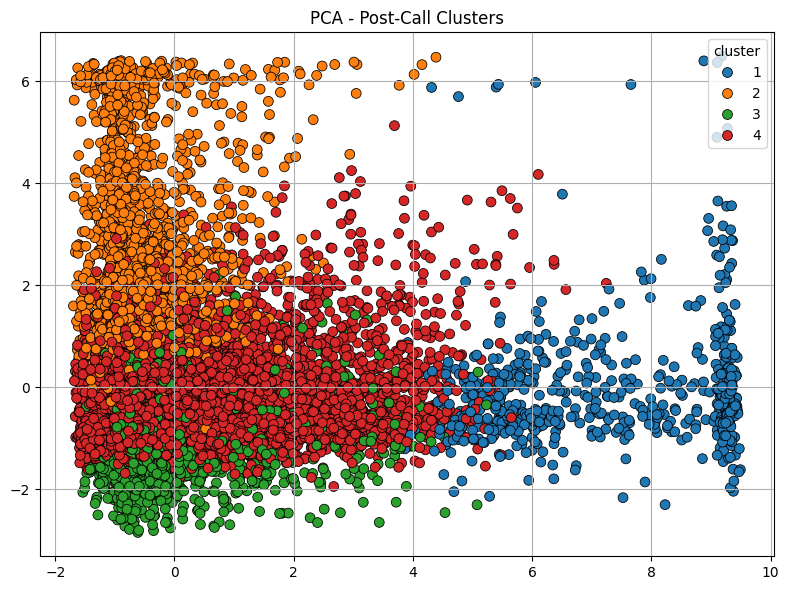

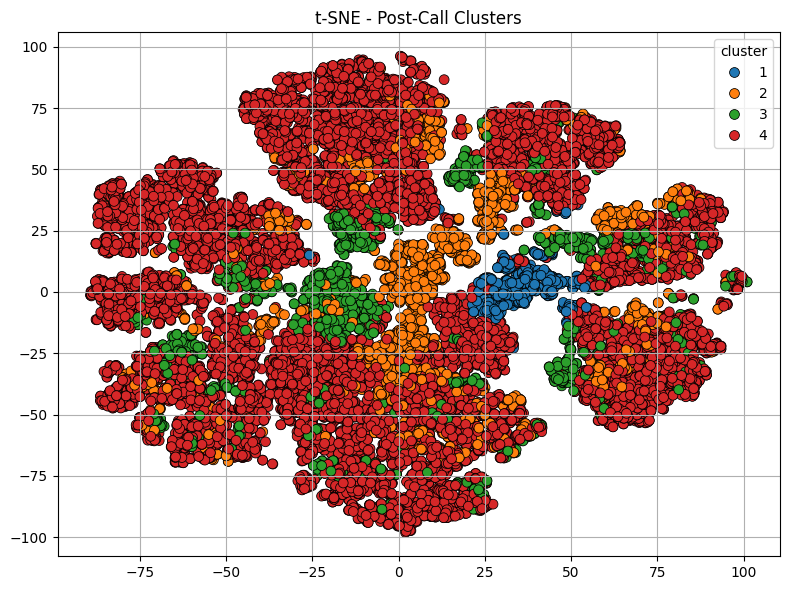

In [100]:
# Load the clustered data
data = load('X_train_post_clustered.joblib')
X = data.drop(columns=['cluster', 'y'])
y = data['cluster']

# Preprocessing pipeline
num_features = ['age', 'balance', 'duration', 'day', 'campaign', 'total_loans', 'contact_frequency']
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                'age_group', 'call_duration_category', 'age_financial_burden']

preprocessor = ColumnTransformer([
    ('num', Pipeline([('imp', SimpleImputer()), ('scale', RobustScaler())]), num_features),
    ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                      ('enc', OneHotEncoder(drop='first', sparse=False))]), cat_features)
])

X_proc = preprocessor.fit_transform(X)

# PCA
pca = PCA(n_components=2, random_state=seed)
X_pca = pca.fit_transform(X_proc)

# t-SNE
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X_proc)

# Plot
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', s=50, edgecolor='k')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_clusters(X_pca, y, "PCA - Post-Call Clusters")
plot_clusters(X_tsne, y, "t-SNE - Post-Call Clusters")


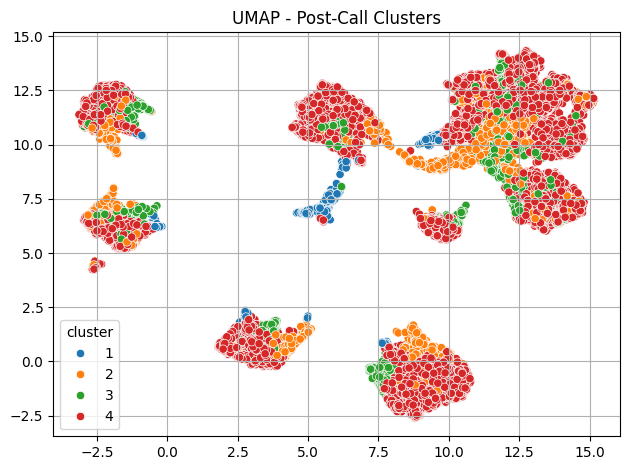

In [101]:
# UMap display
umap_2d = umap.UMAP(n_components=2, random_state=seed)
X_umap = umap_2d.fit_transform(X_proc)

# Plotting
# Use 'y' instead of 'cluster_labels' as 'y' holds the cluster labels
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10')
plt.title("UMAP - Post-Call Clusters")
plt.grid(True)
plt.tight_layout()
plt.show()

### 📋 **Cluster Visualization Findings (PCA, t-SNE, UMAP)**


To better understand the spatial distribution and separability of the post-call customer clusters, we applied three dimensionality reduction techniques:

### 📈 1. Principal Component Analysis (PCA)
- PCA revealed clear **linear separation** between clusters based on the major axes of variance.
- **Cluster 3** dominated a distinct region in the bottom-left quadrant of the PCA plot, reinforcing its behavioral uniqueness.

### 🌌 2. t-SNE (t-distributed Stochastic Neighbor Embedding)
- t-SNE emphasized **local similarities**.
- Cluster 3 appeared as multiple dense subgroups scattered across the space, suggesting internal diversity within the top-performing cluster.
- Other clusters showed more dispersed or overlapping patterns, consistent with their lower conversion rates.

### 🌍 3. UMAP (Uniform Manifold Approximation and Projection)
- UMAP balanced global and local relationships.
- Cluster 3 occupied **specific but non-exclusive zones**, indicating that while members share strong behavioral traits, they are still connected to broader customer behaviors.
- This visualization highlights the **complexity** and **potential richness** within the high-converting segment.

---

### 🔍 Interpretation Summary
- **Cluster 3** shows the strongest behavioral cohesion across all three projections, but with internal sub-structure worth exploring in future campaigns.
- **Clusters 2 and 4** were consistently separated from high-performing regions, reinforcing their classification as low-value targets.
- Visualization confirms that behavioral segmentation **provides deeper targeting value** than simple demographic segmentation alone.

These insights can directly inform future campaign targeting, customer journey mapping, and personalized offer design.


In [102]:
#      --- Final Pipelines ---

# Create the pre-call pipeline
final_precall_pipeline = Pipeline([
    ('preprocessing', pre_call_preprocessor),
    ('classifier', compnb_model)
])

# Save final ComplementNB pre-call pipeline
dump(compnb_pipeline, 'final_precall_pipeline.joblib')
print("Final Pre-Call model pipeline saved as 'final_precall_pipeline.joblib'")


# Create the post-call pipeline if it doesn't exist
final_postcall_pipeline = Pipeline([
    ('preprocessing', post_call_preprocessor), # Assuming post_call_preprocessor is defined
    ('classifier', best_xgb1)
])

# Save final XGBoost post-call pipeline
dump(final_postcall_pipeline, 'final_postcall_pipeline.joblib')
print("Final Post-Call model pipeline saved as 'final_postcall_pipeline.joblib'")

Final Pre-Call model pipeline saved as 'final_precall_pipeline.joblib'
Final Post-Call model pipeline saved as 'final_postcall_pipeline.joblib'


In [103]:
# Load Pre-Call Model
prec_model = load('final_precall_pipeline.joblib')

# Load Post-Call Model
post_model = load('final_postcall_pipeline.joblib')


---
### 📌 Post-Call Phase Summary

The post-call model was designed to identify customers most likely to **subscribe after a call**. It incorporated call metadata and enriched demographic features.

#### 📌 Final Model: XGBoost Classifier (threshold-tuned)
- **F1 Score (Test Set)**: 0.749
- **Precision**: High — minimized false positives
- **Cross-validation**: 5-fold with ADASYN balancing
- **Threshold tuning**: Applied to optimize performance at class level

#### ⚙️ Post-Call Strategic Role
- Best suited for **targeted follow-up** after initial contact.
- Highly effective at capturing complex, nonlinear patterns in customer response behavior.
- Aligned with marketing goals to **maximize conversions per campaign dollar**.

#### 🔑 Key Features Driving Performance
- `duration` — longer, meaningful conversations correlated with positive outcomes.
- `campaign` — fewer repeated calls improved success rates.
- `balance` — financial standing remains a powerful indicator.
- Age and loan-based burden markers (`age_financial_burden_*`) contributed subtly.

#### 🎯 Outcome
- XGBoost successfully segmented customers into four behavioral clusters.
- **Cluster 3 emerged as the top-performing group**, with a subscription rate of **34.76%**.
- Insights from this model can guide **call prioritization, campaign timing, and offer structuring**.

---
---

## 💼 Final Project Conclusion & Business Recommendations

This final section summarizes the key outcomes of both the Pre-Call and Post-Call modeling phases, highlighting their strategic value in driving efficient and effective term deposit campaigns.

It also presents actionable recommendations for how the models, insights, and customer segments can be applied in a real-world marketing context — transforming predictive analytics into targeted decision-making.


### 🎯 Project Recap

This project tackled the problem of optimizing term deposit campaign targeting using a two-stage modeling approach:

- **Pre-Call Phase**: Identify customers unlikely to subscribe before initiating contact.
- **Post-Call Phase**: Predict likelihood of subscription after the call, based on metadata from the interaction.

By combining business context, machine learning models, class imbalance strategies, and cluster-based behavioral segmentation, this solution provides a robust framework for intelligent marketing execution.

---

### 🔁 Strategic Value of the Two-Phase Workflow

- **Pre-Call Model**:
  - Filters out customers least likely to convert.
  - Helps reduce call center load and campaign expenditure.
  - Informs exclusion strategies based on segments (e.g., age 60+, students with no loan burden).

- **Post-Call Model**:
  - Accurately identifies high-conversion potential after real engagement.
  - Prioritizes follow-ups for Cluster 3 — the highest-yield customer group.
  - Optimizes resource usage by focusing human effort on warm leads.

Together, the two phases provide a **full-funnel targeting system**, balancing efficiency (Pre-Call) with effectiveness (Post-Call).

---

### 🔍 Key Insights

- **Call Duration**, **Campaign Count**, and **Balance** are critical predictors of subscription.
- Cluster analysis revealed behavioral groups, with **Cluster 3** delivering a 34.76% conversion rate.
- t-SNE and UMAP visuals highlighted that Cluster 3 is behaviorally diverse — an opportunity for personalized offers.
- Using threshold tuning, we maximized recall and F1 in both phases, aligning modeling to business needs.

---

### ⚙️ Deployment Notes

- Final models are wrapped in scikit-learn pipelines, ensuring preprocessing consistency.
- Models are saved using `joblib` and can be deployed as standalone scoring components or integrated into APIs.
- Customer segments can be dynamically assigned using the clustering logic for personalization in real-time systems.
- DuckDB demonstrates potential for scalable, in-memory analytics integration during pipeline execution.

---

### 📌 Business Recommendations

1. **Implement Pre-Call Filtering**:
   - Use the Pre-Call model to exclude low-potential segments before outreach.
   - Focus campaign budget on customers who haven't historically said "no".

2. **Prioritize Post-Call Prospects**:
   - Use the Post-Call model to prioritize Cluster 3 members for follow-up.
   - Allocate agent time to high-yield leads to increase conversion ROI.

3. **Optimize Campaign Frequency**:
   - Reduce repeated calls — fewer campaign touches improved outcomes.
   - Test ideal contact thresholds with A/B testing.

4. **Segment-Based Personalization**:
   - Tailor offers for different behavioral clusters.
   - Use age group, loan burden, and past response patterns for message customization.

5. **Monitor & Recalibrate**:
   - Retrain models quarterly to adapt to changing customer behavior.
   - Track feature drift and adjust thresholds as needed.

---

✅ This project demonstrates how strategic machine learning can bridge business goals and operational efficiency. The result is a lean, data-driven, and deployable marketing engine ready for real-world impact.


---

## 🙏 Thank You for Reading!

This project was completed by **Alvin Siphosenkosi Moyo**.  
Feel free to connect with me on [LinkedIn](https://www.linkedin.com/in/alvin-moyo-5a711021)  
or view my other projects on [GitHub](https://github.com/AlvinSMoyo).

---
